<a href="https://colab.research.google.com/github/Pratyushk2003/Hospital_front-end/blob/main/Copy_of_Copy_of_Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset to a Pandas DataFrame
df = pd.read_excel('/content/Copy_epileptic_seizures_Responses_New.xlsx')
df.head(5)

CaseNo  PatientAge  Gender            EventDuration  \
0  569502_C        18.0  Female  d. More than 10 minutes   
1  569498_C        26.0    Male           b. 1-5 minutes   
2  546077_C        17.0    Male          c. 5-10 minutes   
3  498260_C        40.0    Male           b. 1-5 minutes   
4  408708_C        17.0  Female           b. 1-5 minutes   

            Stereotypic                     events_occur_time  \
0  a. Yes, all are same            b. Only during wakefulness   
1  a. Yes, all are same            b. Only during wakefulness   
2  a. Yes, all are same  c. Both during wakefulness and sleep   
3  a. Yes, all are same  c. Both during wakefulness and sleep   
4  a. Yes, all are same  c. Both during wakefulness and sleep   

  wandering_headbanging_observation eyes_closed_during_event  \
0                             b. No                   a. Yes   
1                             b. No                   a. Yes   
2                               NaN                    b. No   
3                               NaN                    b. No   
4                               NaN                   a. Yes   

  weeping_before_during_after_episode  \
0                              a. Yes   
1                               b. No   
2                               b. No   
3                               b. No   
4                               b. No   

  patient_fall_suddenly_without_limb_movements  ... fixed_Aura_Premonition  \
0                                        b. No  ...                 a. Yes   
1                                        b. No  ...                  b. No   
2                                        b. No  ...                  b. No   
3                                        b. No  ...                 a. Yes   
4                                        b. No  ...                 a. Yes   

  staring_blankly_chewing_smacking_lips posturing_limbeyehead_deviation  \
0                                 b. No                          a. Yes   
1                                 b. No                           b. No   
2                                 b. No                          a. Yes   
3                                a. Yes                          a. Yes   
4                                a. Yes                           b. No   

  violent_thrashing_movements                               recovery  \
0                       b. No                      a. Gradual/Slowly   
1                       b. No                      a. Gradual/Slowly   
2                       b. No                      a. Gradual/Slowly   
3                       b. No  b. Abrupt/Sudden (less than a minute)   
4                       b. No                      a. Gradual/Slowly   

  bittentongue urine_without_knowledge dislocated_shoulder other_injuries  \
0        a. No                   b. No               b. No          b. No   
1        a. No                   b. No               b. No          b. No   
2        a. No                   b. No               b. No         a. Yes   
3        a. No                   b. No               b. No         a. Yes   
4        a. No                   b. No               b. No          b. No   

          Final_Diagnosis  
0  b. Non epileptic spell  
1    a. Epileptic Seizure  
2    a. Epileptic Seizure  
3    a. Epileptic Seizure  
4    a. Epileptic Seizure  

[5 rows x 27 columns]

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(['wandering_headbanging_observation'], axis=1, inplace=True)


In [6]:
# Remove column

df.drop(['wandering_headbanging_observation','If seizure','If Non epileptic spell'], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

#print df
df

KeyError: ignored

In [7]:
df

PatientAge  Gender            EventDuration  \
0          18.0  Female  d. More than 10 minutes   
1          26.0    Male           b. 1-5 minutes   
2          17.0    Male          c. 5-10 minutes   
3          40.0    Male           b. 1-5 minutes   
4          17.0  Female           b. 1-5 minutes   
..          ...     ...                      ...   
497        44.0    Male           b. 1-5 minutes   
498        20.0    Male           b. 1-5 minutes   
499        12.0  Female           b. 1-5 minutes   
500        12.0  Female           b. 1-5 minutes   
501        12.0  Female           b. 1-5 minutes   

                                          Stereotypic  \
0                                a. Yes, all are same   
1                                a. Yes, all are same   
2                                a. Yes, all are same   
3                                a. Yes, all are same   
4                                a. Yes, all are same   
..                                                ...   
497  b. Two different types (small ones and big ones)   
498                              a. Yes, all are same   
499                             d. It’s a first event   
500                             d. It’s a first event   
501                             d. It’s a first event   

                        events_occur_time eyes_closed_during_event  \
0              b. Only during wakefulness                   a. Yes   
1              b. Only during wakefulness                   a. Yes   
2    c. Both during wakefulness and sleep                    b. No   
3    c. Both during wakefulness and sleep                    b. No   
4    c. Both during wakefulness and sleep                   a. Yes   
..                                    ...                      ...   
497  c. Both during wakefulness and sleep                    b. No   
498            b. Only during wakefulness                    b. No   
499  c. Both during wakefulness and sleep                   a. Yes   
500  c. Both during wakefulness and sleep                   a. Yes   
501  c. Both during wakefulness and sleep                   a. Yes   

    weeping_before_during_after_episode  \
0                                a. Yes   
1                                 b. No   
2                                 b. No   
3                                 b. No   
4                                 b. No   
..                                  ...   
497                               b. No   
498                               b. No   
499                               b. No   
500                               b. No   
501                               b. No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                          b. No                       a. Yes   
1                                          b. No                        b. No   
2                                          b. No                        b. No   
3                                          b. No                        b. No   
4                                          b. No                        b. No   
..                                           ...                          ...   
497                                        b. No                        b. No   
498                                        b. No                        b. No   
499                                        b. No                        b. No   
500                                        b. No                        b. No   
501                                        b. No                        b. No   

    loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                           b. No  ...                 a. Yes   
1                                           b. No  ...                  b. No   
2                                           b. No  ...                  b. No   
3                                       

In [8]:
import string

def cleanString():
  alphabet = list(string.ascii_lowercase)
  columns = list(df)
  for col in columns:
    for i, j in enumerate(df[col]):
      if type(j)==type('aaaa'):
        if len(j)<3:
          continue
        if j[0] in alphabet and j[1:3]==". ":
          df[col][i]=j[3:]

cleanString()
df.head()

PatientAge  Gender         EventDuration        Stereotypic  \
0        18.0  Female  More than 10 minutes  Yes, all are same   
1        26.0    Male           1-5 minutes  Yes, all are same   
2        17.0    Male          5-10 minutes  Yes, all are same   
3        40.0    Male           1-5 minutes  Yes, all are same   
4        17.0  Female           1-5 minutes  Yes, all are same   

                   events_occur_time eyes_closed_during_event  \
0            Only during wakefulness                      Yes   
1            Only during wakefulness                      Yes   
2  Both during wakefulness and sleep                       No   
3  Both during wakefulness and sleep                       No   
4  Both during wakefulness and sleep                      Yes   

  weeping_before_during_after_episode  \
0                                 Yes   
1                                  No   
2                                  No   
3                                  No   
4                                  No   

  patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                           No                          Yes   
1                                           No                           No   
2                                           No                           No   
3                                           No                           No   
4                                           No                           No   

  loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                            No  ...                    Yes   
1                                            No  ...                     No   
2                                            No  ...                     No   
3                                            No  ...                    Yes   
4                                            No  ...                    Yes   

  staring_blankly_chewing_smacking_lips posturing_limbeyehead_deviation  \
0                                    No                             Yes   
1                                    No                              No   
2                                    No                             Yes   
3                                   Yes                             Yes   
4                                   Yes                              No   

  violent_thrashing_movements                            recovery  \
0                          No                      Gradual/Slowly   
1                          No                      Gradual/Slowly   
2                          No                      Gradual/Slowly   
3                          No  Abrupt/Sudden (less than a minute)   
4                          No                      Gradual/Slowly   

  bittentongue urine_without_knowledge dislocated_shoulder other_injuries  \
0           No                      No                  No             No   
1           No                      No                  No             No   
2           No                      No                  No            Yes   
3           No                      No                  No            Yes   
4           No                      No                  No             No   

       Final_Diagnosis  
0  Non epileptic spell  
1    Epileptic Seizure  
2    Epileptic Seizure  
3    Epileptic Seizure  
4    Epileptic Seizure  

[5 rows x 25 columns]

In [9]:
for i,age in enumerate(df['PatientAge']):


    if type(age)==type('aa'):
        s=""
        s1=""
        #print(age)
        for alpha in age:
          if alpha >='0' and alpha<='9':
            s+=alpha
          elif alpha >='a' and alpha<='z':
            s1+=alpha

        s1=s1.lower()

        if s1=='month' or s1=='months':
          df['PatientAge'][i]=float(s)/12
        else:
           df['PatientAge'][i]=float(s)

In [10]:
df.shape
df.info()
df.describe(include='all')
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   PatientAge                                                         502 non-null    float64
 1   Gender                                                             502 non-null    object 
 2   EventDuration                                                      502 non-null    object 
 3   Stereotypic                                                        502 non-null    object 
 4   events_occur_time                                                  502 non-null    object 
 5   eyes_closed_during_event                                           502 non-null    object 
 6   weeping_before_during_after_episode                                502 non-null    object 
 7   patient_fall_suddenly_with

PatientAge
PatientAge         1.0

In [11]:
df['PatientAge'] = df['PatientAge'].astype(float)

In [12]:
df.isna().sum() #checking for more  missing null values

PatientAge                                                           0
Gender                                                               0
EventDuration                                                        0
Stereotypic                                                          0
events_occur_time                                                    0
eyes_closed_during_event                                             0
weeping_before_during_after_episode                                  0
patient_fall_suddenly_without_limb_movements                         0
Was_patient_hyperventilating                                         0
loss_consciousness_after_urination_defecation                        0
side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing    0
observation_limbjerking                                              0
observe_postevent_stridulous_laboured_breathing                      0
upper_limb_jerks_observation                                         0
briefl

In [13]:
!pip install dython

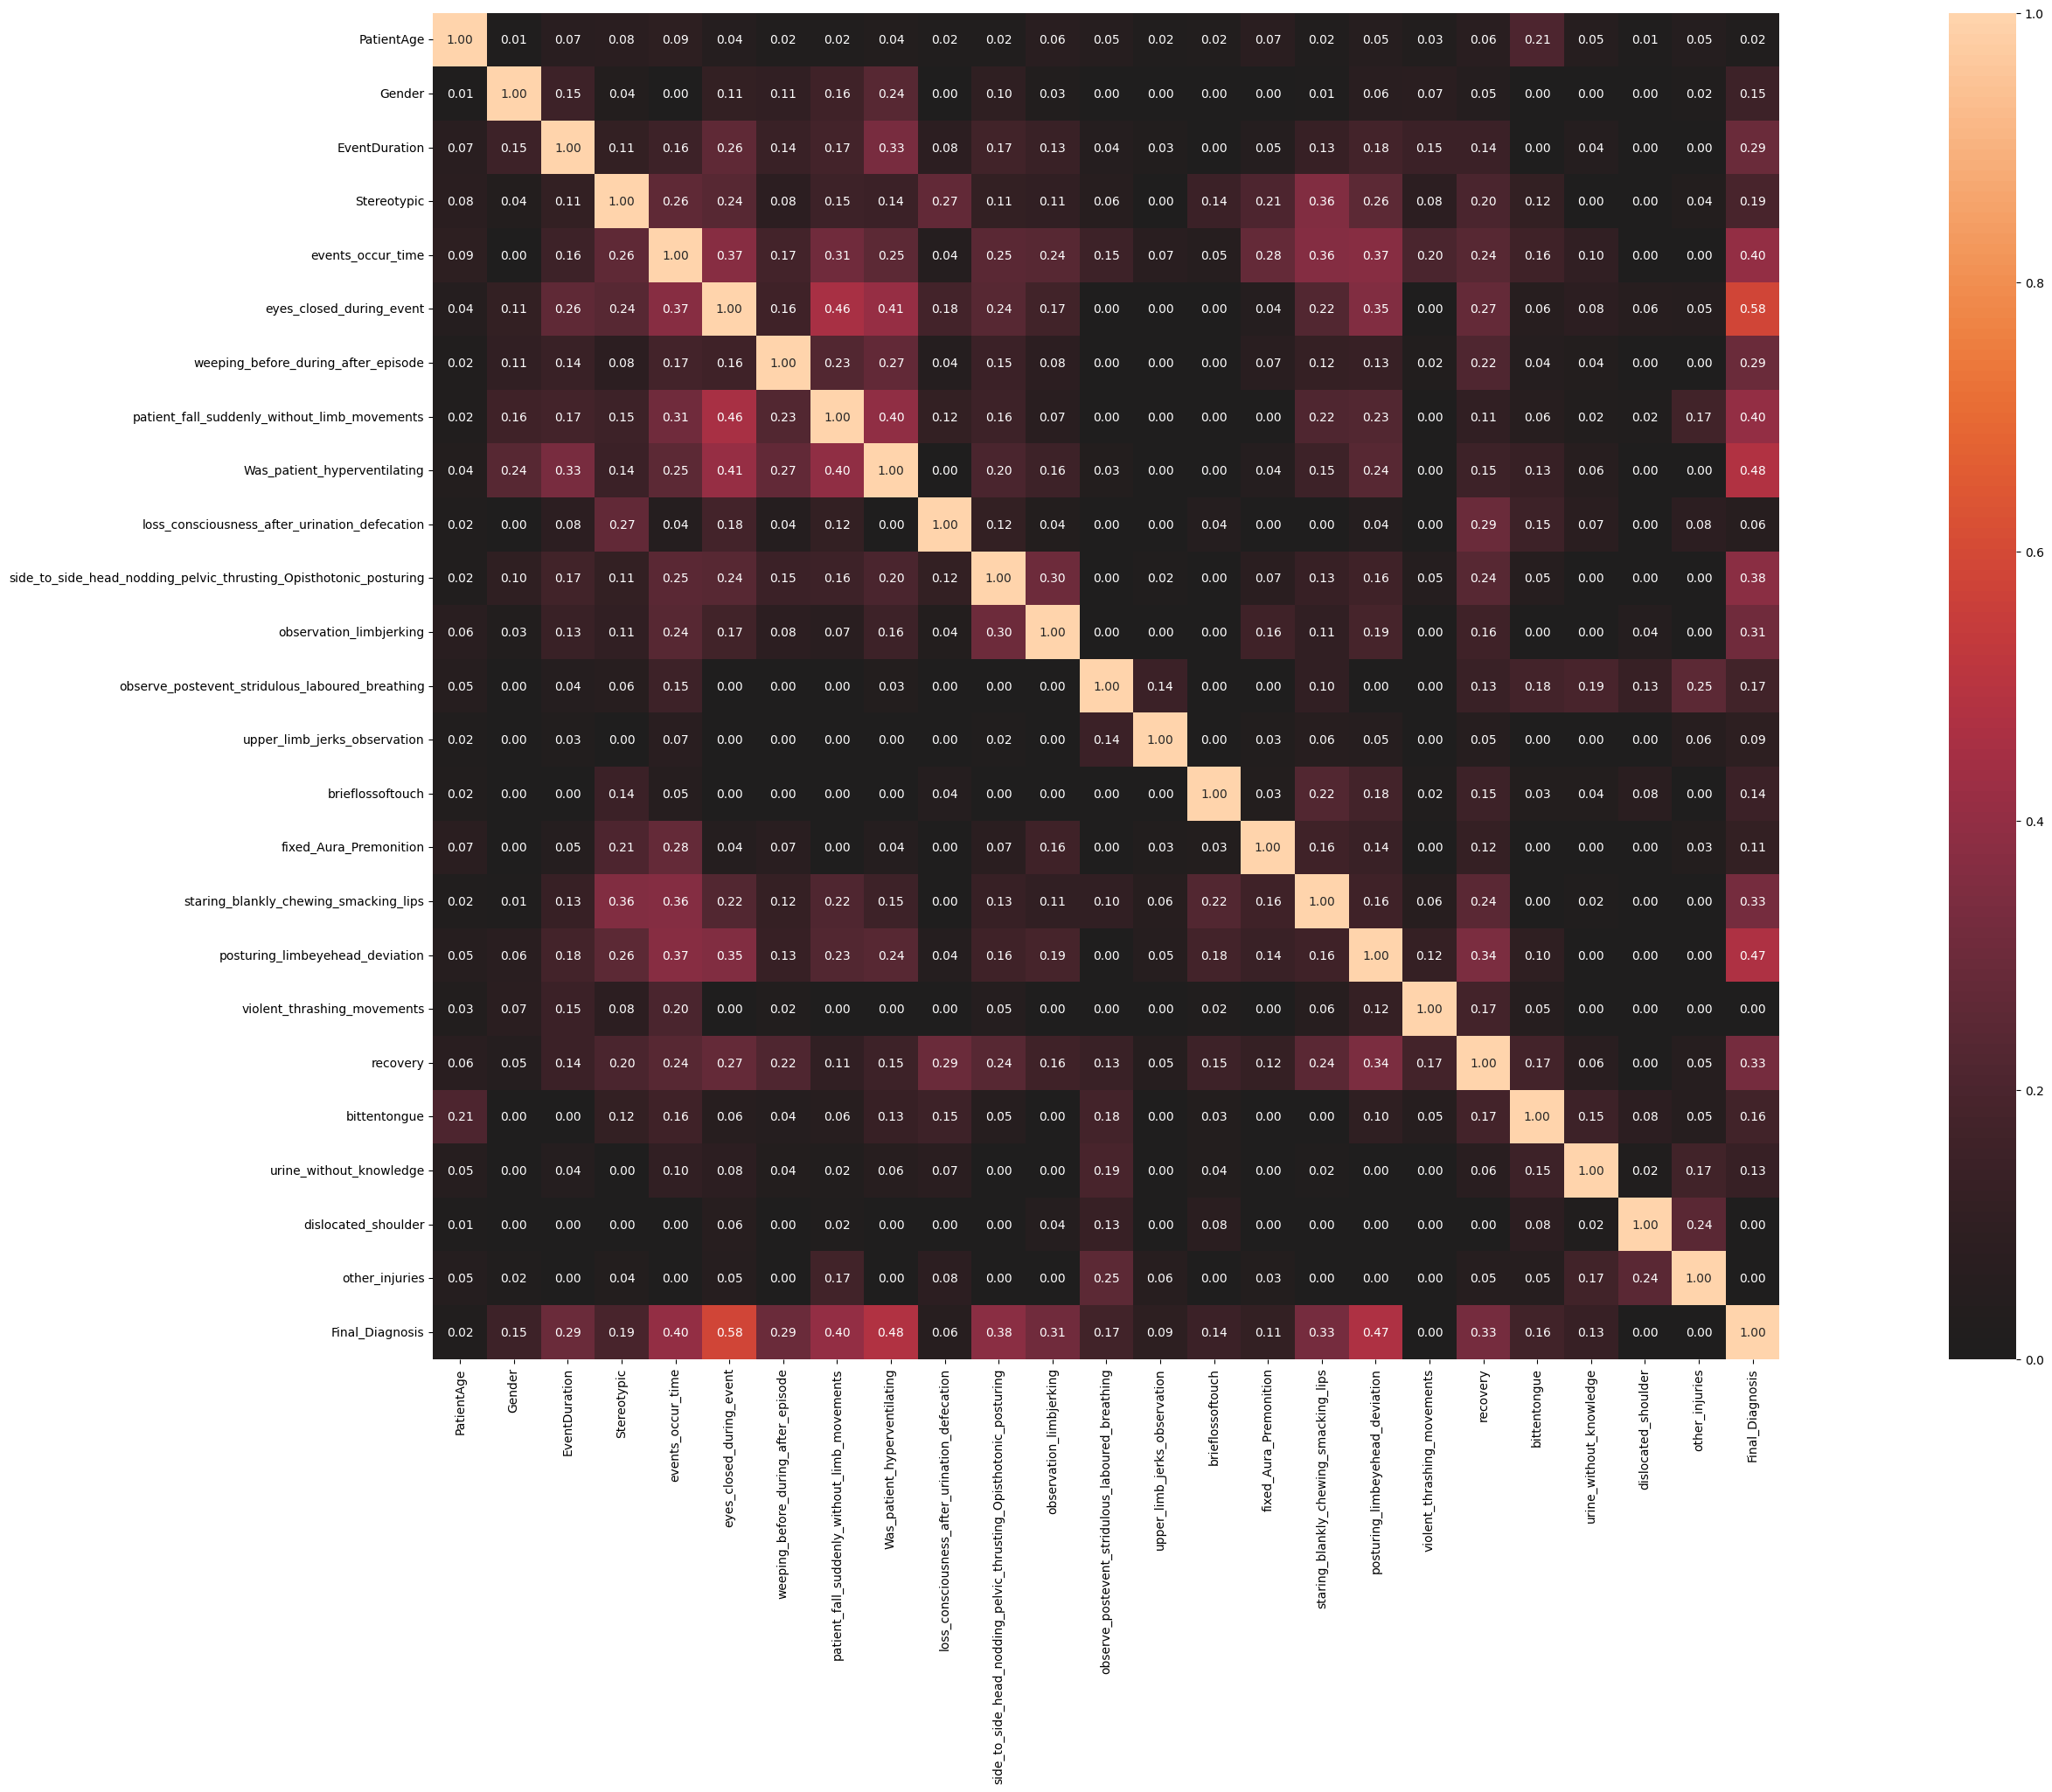

Final_Diagnosis                                                      1.000000
eyes_closed_during_event                                             0.582762
Was_patient_hyperventilating                                         0.483255
posturing_limbeyehead_deviation                                      0.469244
patient_fall_suddenly_without_limb_movements                         0.404903
events_occur_time                                                    0.403122
side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing    0.379443
recovery                                                             0.326325
staring_blankly_chewing_smacking_lips                                0.325994
observation_limbjerking                                              0.311504
EventDuration                                                        0.291232
weeping_before_during_after_episode                                  0.290035
Stereotypic                                                     

In [14]:
from dython.nominal import associations

complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(50,20))
complete_correlation['corr']['Final_Diagnosis'].abs().sort_values(ascending=False)

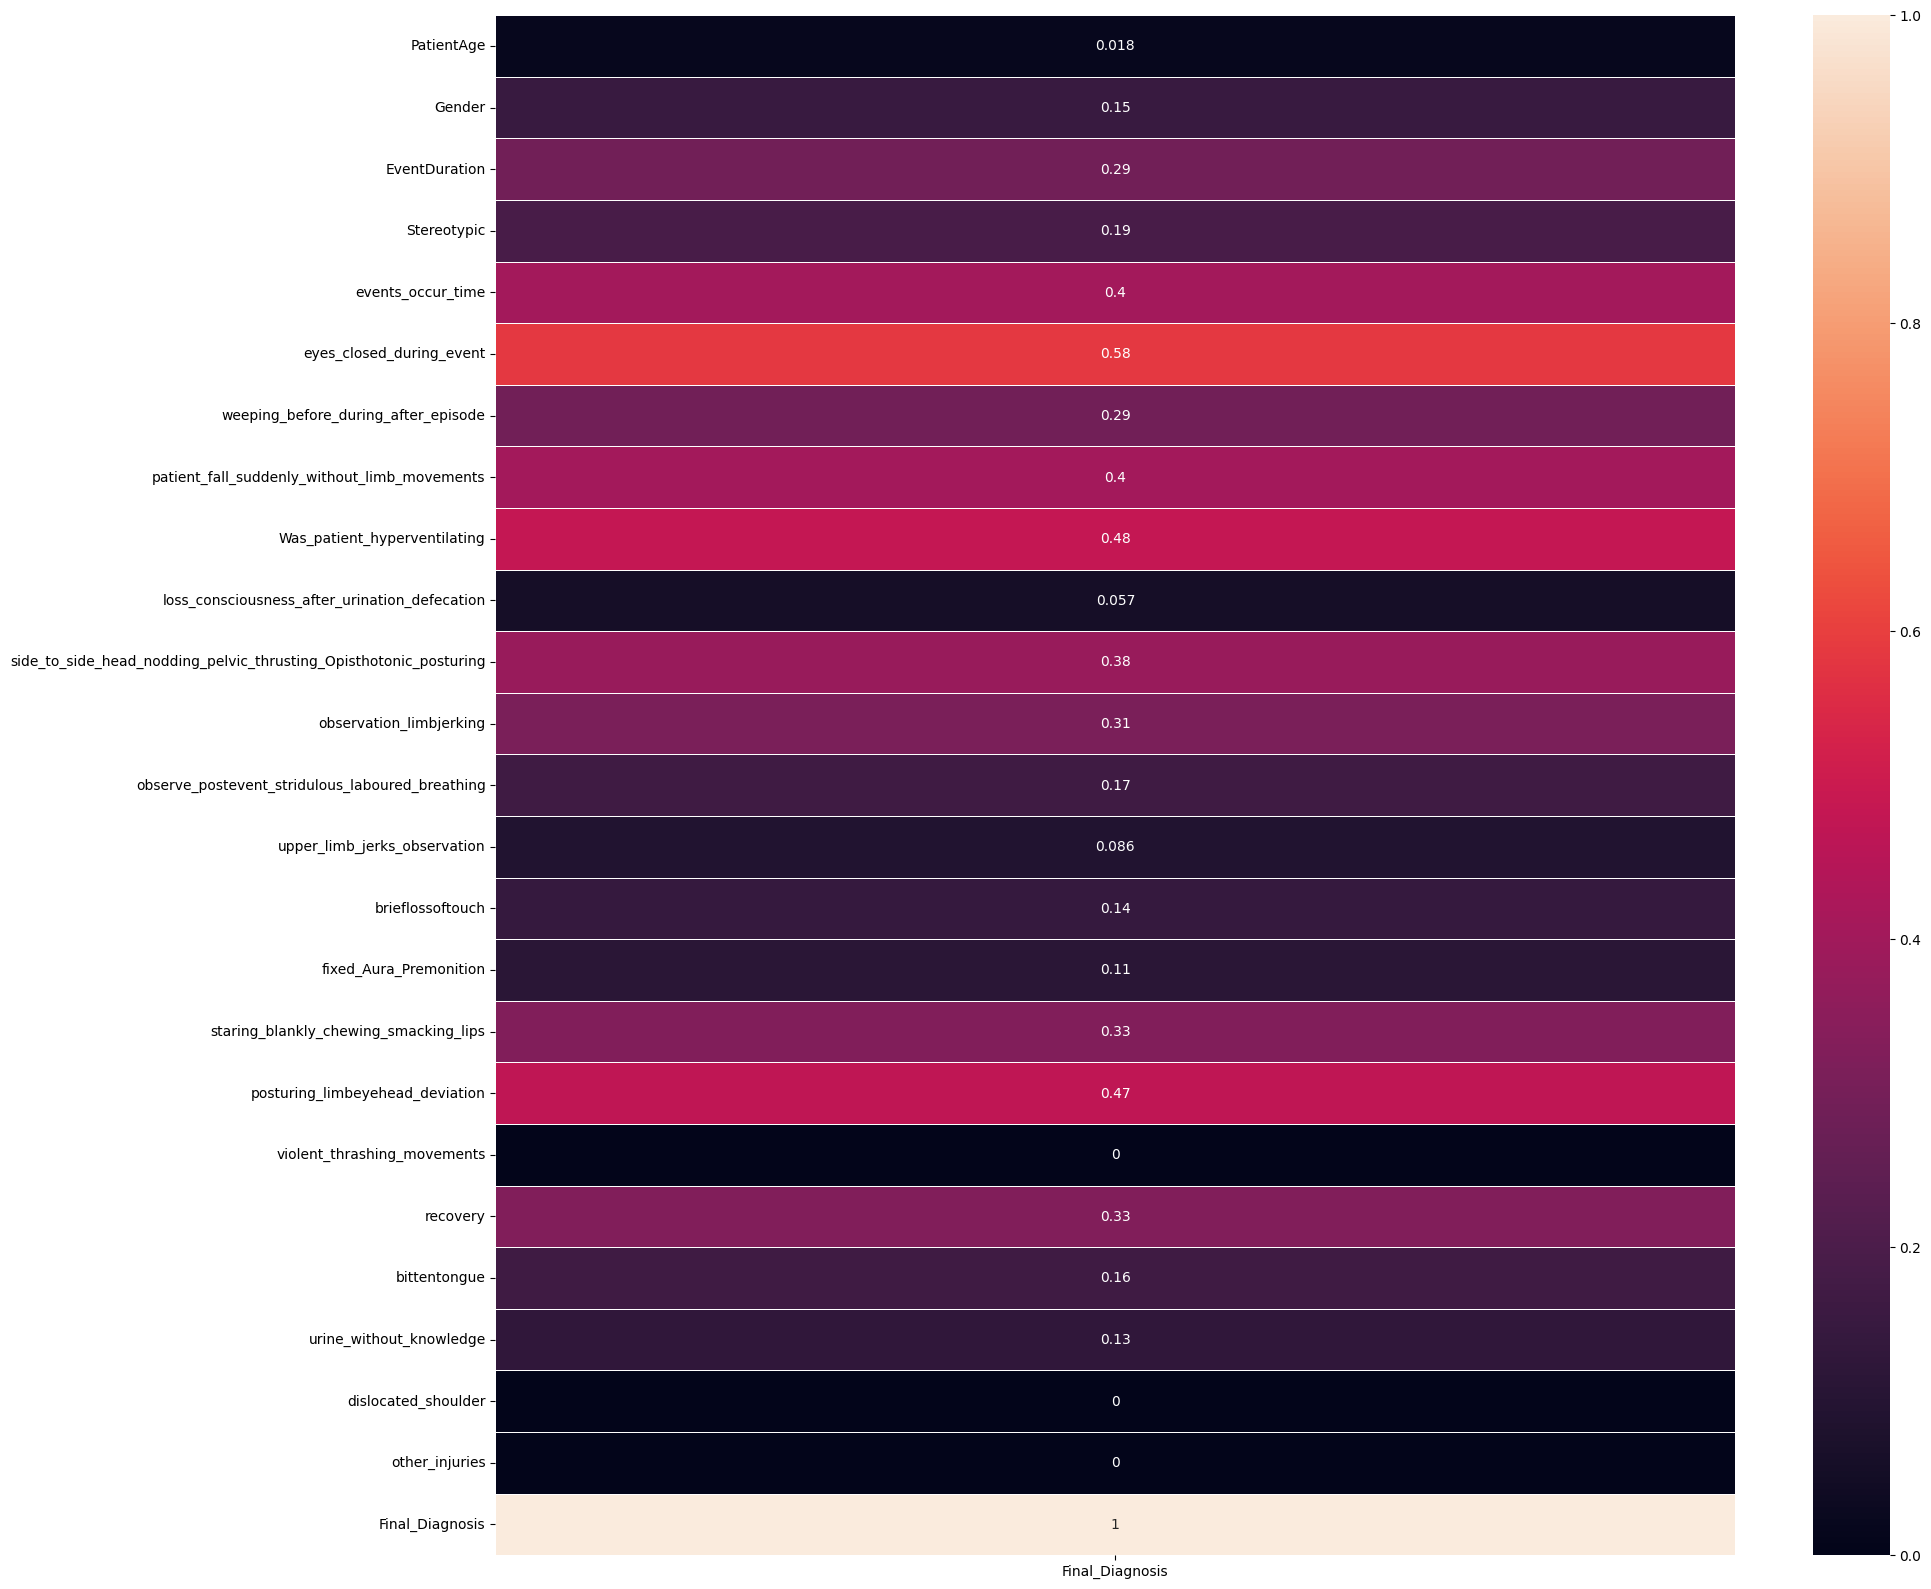

In [15]:
from pprint import pprint
# pprint(c_mat)
# c_mat['corr']

fig, ax = plt.subplots(figsize = (20,20))

columns = list(df)
result_cols = ['Final_Diagnosis']

for col in result_cols:
  columns.remove(col)

sns.heatmap(complete_correlation['corr'][result_cols], annot = True, linewidths = .5, ax = ax)
plt.show()

<Axes: title={'center': 'Final diagnosis'}>

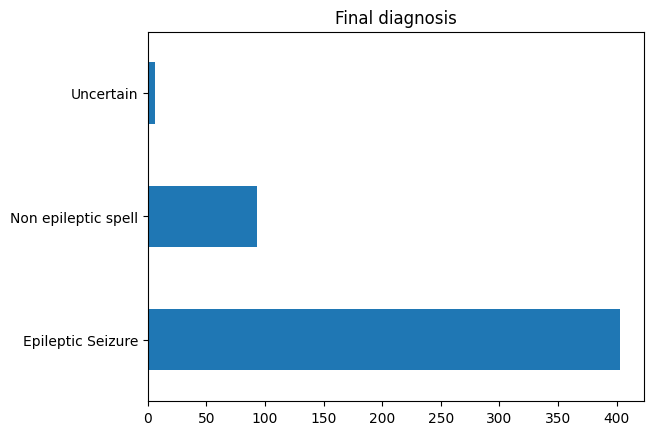

In [16]:
#checking for how many patients were epileptic/ uncertain/not epileptic
df['Final_Diagnosis'].value_counts().plot(kind='barh',title="Final diagnosis")

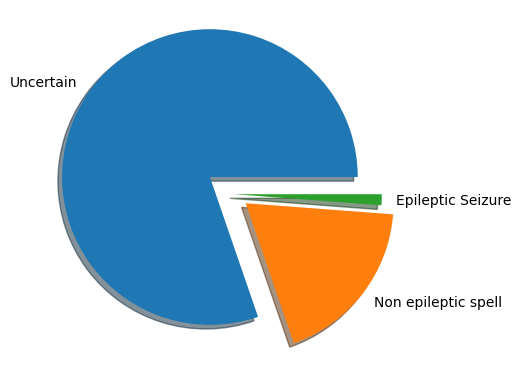

In [17]:
ss = df['Final_Diagnosis'].value_counts()
mylabels = ["Uncertain", "Non epileptic spell","Epileptic Seizure"]
myexplode = [0.2, 0.1, 0]
plt.pie(ss, labels = mylabels, explode = myexplode, shadow = True)

plt.show()

In [18]:
# observation list for the patients having answer yes or No
cols =list(df)

In [ ]:
# results = (df
#     .melt(value_vars=cols)
#     .groupby(['variable', 'value'])
#     .agg({'value': 'count'})
#     .unstack()
#     .reset_index()
#     .droplevel(level=0, axis=1)
#     .assign(total = lambda x: x.sum(axis=1))
# )
# results

<Axes: title={'center': 'Recovery of the patients'}>

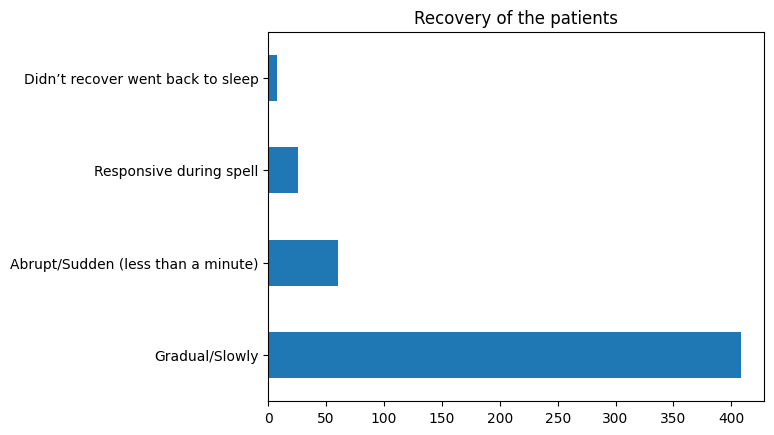

In [19]:
df['recovery'].value_counts().plot(kind='barh',title="Recovery of the patients")

<Axes: title={'center': 'bitter tongue status of the patients'}>

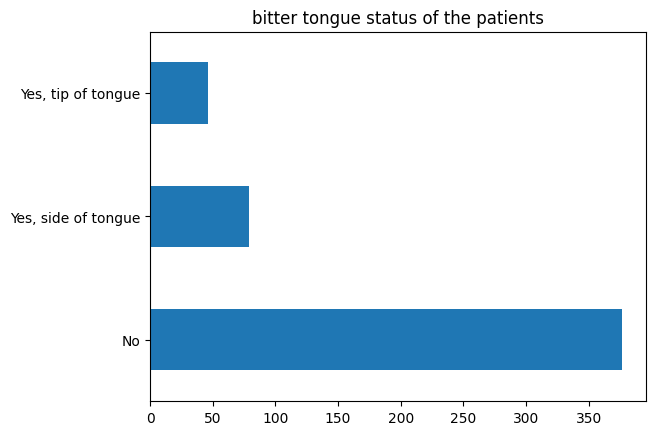

In [20]:
df['bittentongue'].value_counts().plot(kind='barh',title="bitter tongue status of the patients")

<Axes: title={'center': 'eyes closed during occurance of event'}>

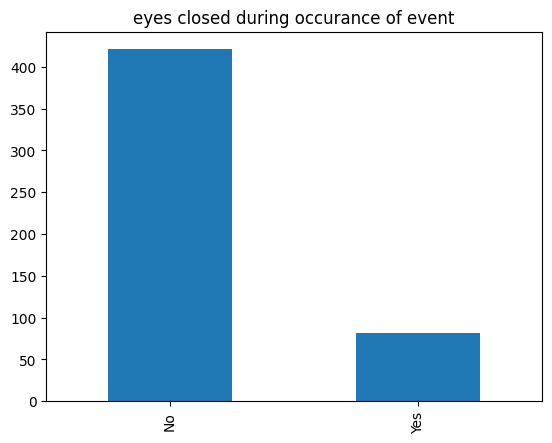

In [21]:
df['eyes_closed_during_event'].value_counts().plot(kind='bar',title="eyes closed during occurance of event")

In [ ]:
#checking for some observation of value yes/no
#df['wandering_headbanging_observation'].value_counts().plot(kind='bar',title="wandering movements or headbanging observation",color = "#4CAF50")


<Axes: title={'center': 'weeping_before_during_after_episode'}>

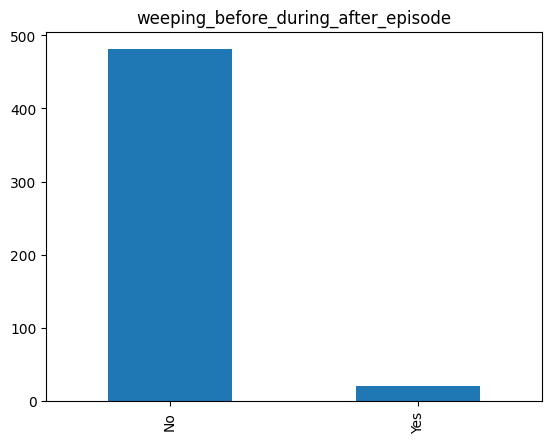

In [22]:
df['weeping_before_during_after_episode'].value_counts().plot(kind='bar',title="weeping_before_during_after_episode")

<Axes: title={'center': 'patient_fall_suddenly_without_limb_movements'}>

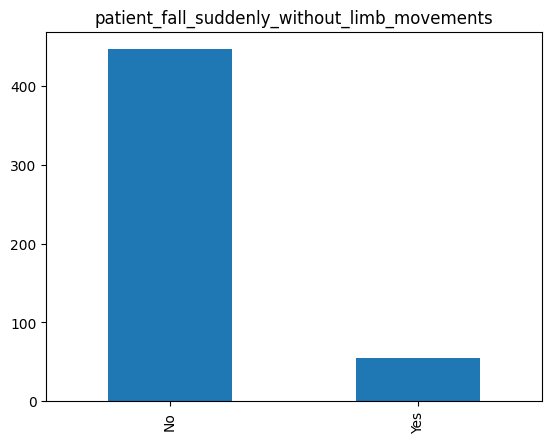

In [23]:
df['patient_fall_suddenly_without_limb_movements'].value_counts().plot(kind='bar',title="patient_fall_suddenly_without_limb_movements")

In [ ]:
# # mapping to numerical value
# numeric_mappings = {}

# import string
# columns = list(df)
# columns=columns[1:]
# def replace():

#   for col in columns:
#     rowval=set()
#     for j in df[col]:
#       rowval.add(j)

#     enumval=[i for i in range(len(rowval))]
#     df[col].replace(list(rowval),enumval,inplace =True)
#     ind = 0
#     for rowvals in rowval:
#       numeric_mappings[rowvals] = enumval[ind]
#       ind+=1

# replace()
# df.head()

df.replace(np.nan, 0)
#making a deep copy of DF
#df_copy = df.copy(deep=True)
#df_copy

PatientAge  Gender         EventDuration  \
0          18.0  Female  More than 10 minutes   
1          26.0    Male           1-5 minutes   
2          17.0    Male          5-10 minutes   
3          40.0    Male           1-5 minutes   
4          17.0  Female           1-5 minutes   
..          ...     ...                   ...   
497        44.0    Male           1-5 minutes   
498        20.0    Male           1-5 minutes   
499        12.0  Female           1-5 minutes   
500        12.0  Female           1-5 minutes   
501        12.0  Female           1-5 minutes   

                                       Stereotypic  \
0                                Yes, all are same   
1                                Yes, all are same   
2                                Yes, all are same   
3                                Yes, all are same   
4                                Yes, all are same   
..                                             ...   
497  Two different types (small ones and big ones)   
498                              Yes, all are same   
499                             It’s a first event   
500                             It’s a first event   
501                             It’s a first event   

                     events_occur_time eyes_closed_during_event  \
0              Only during wakefulness                      Yes   
1              Only during wakefulness                      Yes   
2    Both during wakefulness and sleep                       No   
3    Both during wakefulness and sleep                       No   
4    Both during wakefulness and sleep                      Yes   
..                                 ...                      ...   
497  Both during wakefulness and sleep                       No   
498            Only during wakefulness                       No   
499  Both during wakefulness and sleep                      Yes   
500  Both during wakefulness and sleep                      Yes   
501  Both during wakefulness and sleep                      Yes   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
497                                  No   
498                                  No   
499                                  No   
500                                  No   
501                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
497                                           No                           No   
498                                           No                           No   
499                                           No                           No   
500                                           No                           No   
501                                           No                           No   

    loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                              No  ...                    Yes   
1                                              No  ...                     No   
2                                              No  ...                     No   
3                                              No  ...                    Yes   
4                                              No  ...             

In [24]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Gender',
 'EventDuration',
 'Stereotypic',
 'events_occur_time',
 'eyes_closed_during_event',
 'weeping_before_during_after_episode',
 'patient_fall_suddenly_without_limb_movements',
 'Was_patient_hyperventilating',
 'loss_consciousness_after_urination_defecation',
 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
 'observation_limbjerking',
 'observe_postevent_stridulous_laboured_breathing',
 'upper_limb_jerks_observation',
 'brieflossoftouch',
 'fixed_Aura_Premonition',
 'staring_blankly_chewing_smacking_lips',
 'posturing_limbeyehead_deviation',
 'violent_thrashing_movements',
 'recovery',
 'bittentongue',
 'urine_without_knowledge',
 'dislocated_shoulder',
 'other_injuries',
 'Final_Diagnosis']

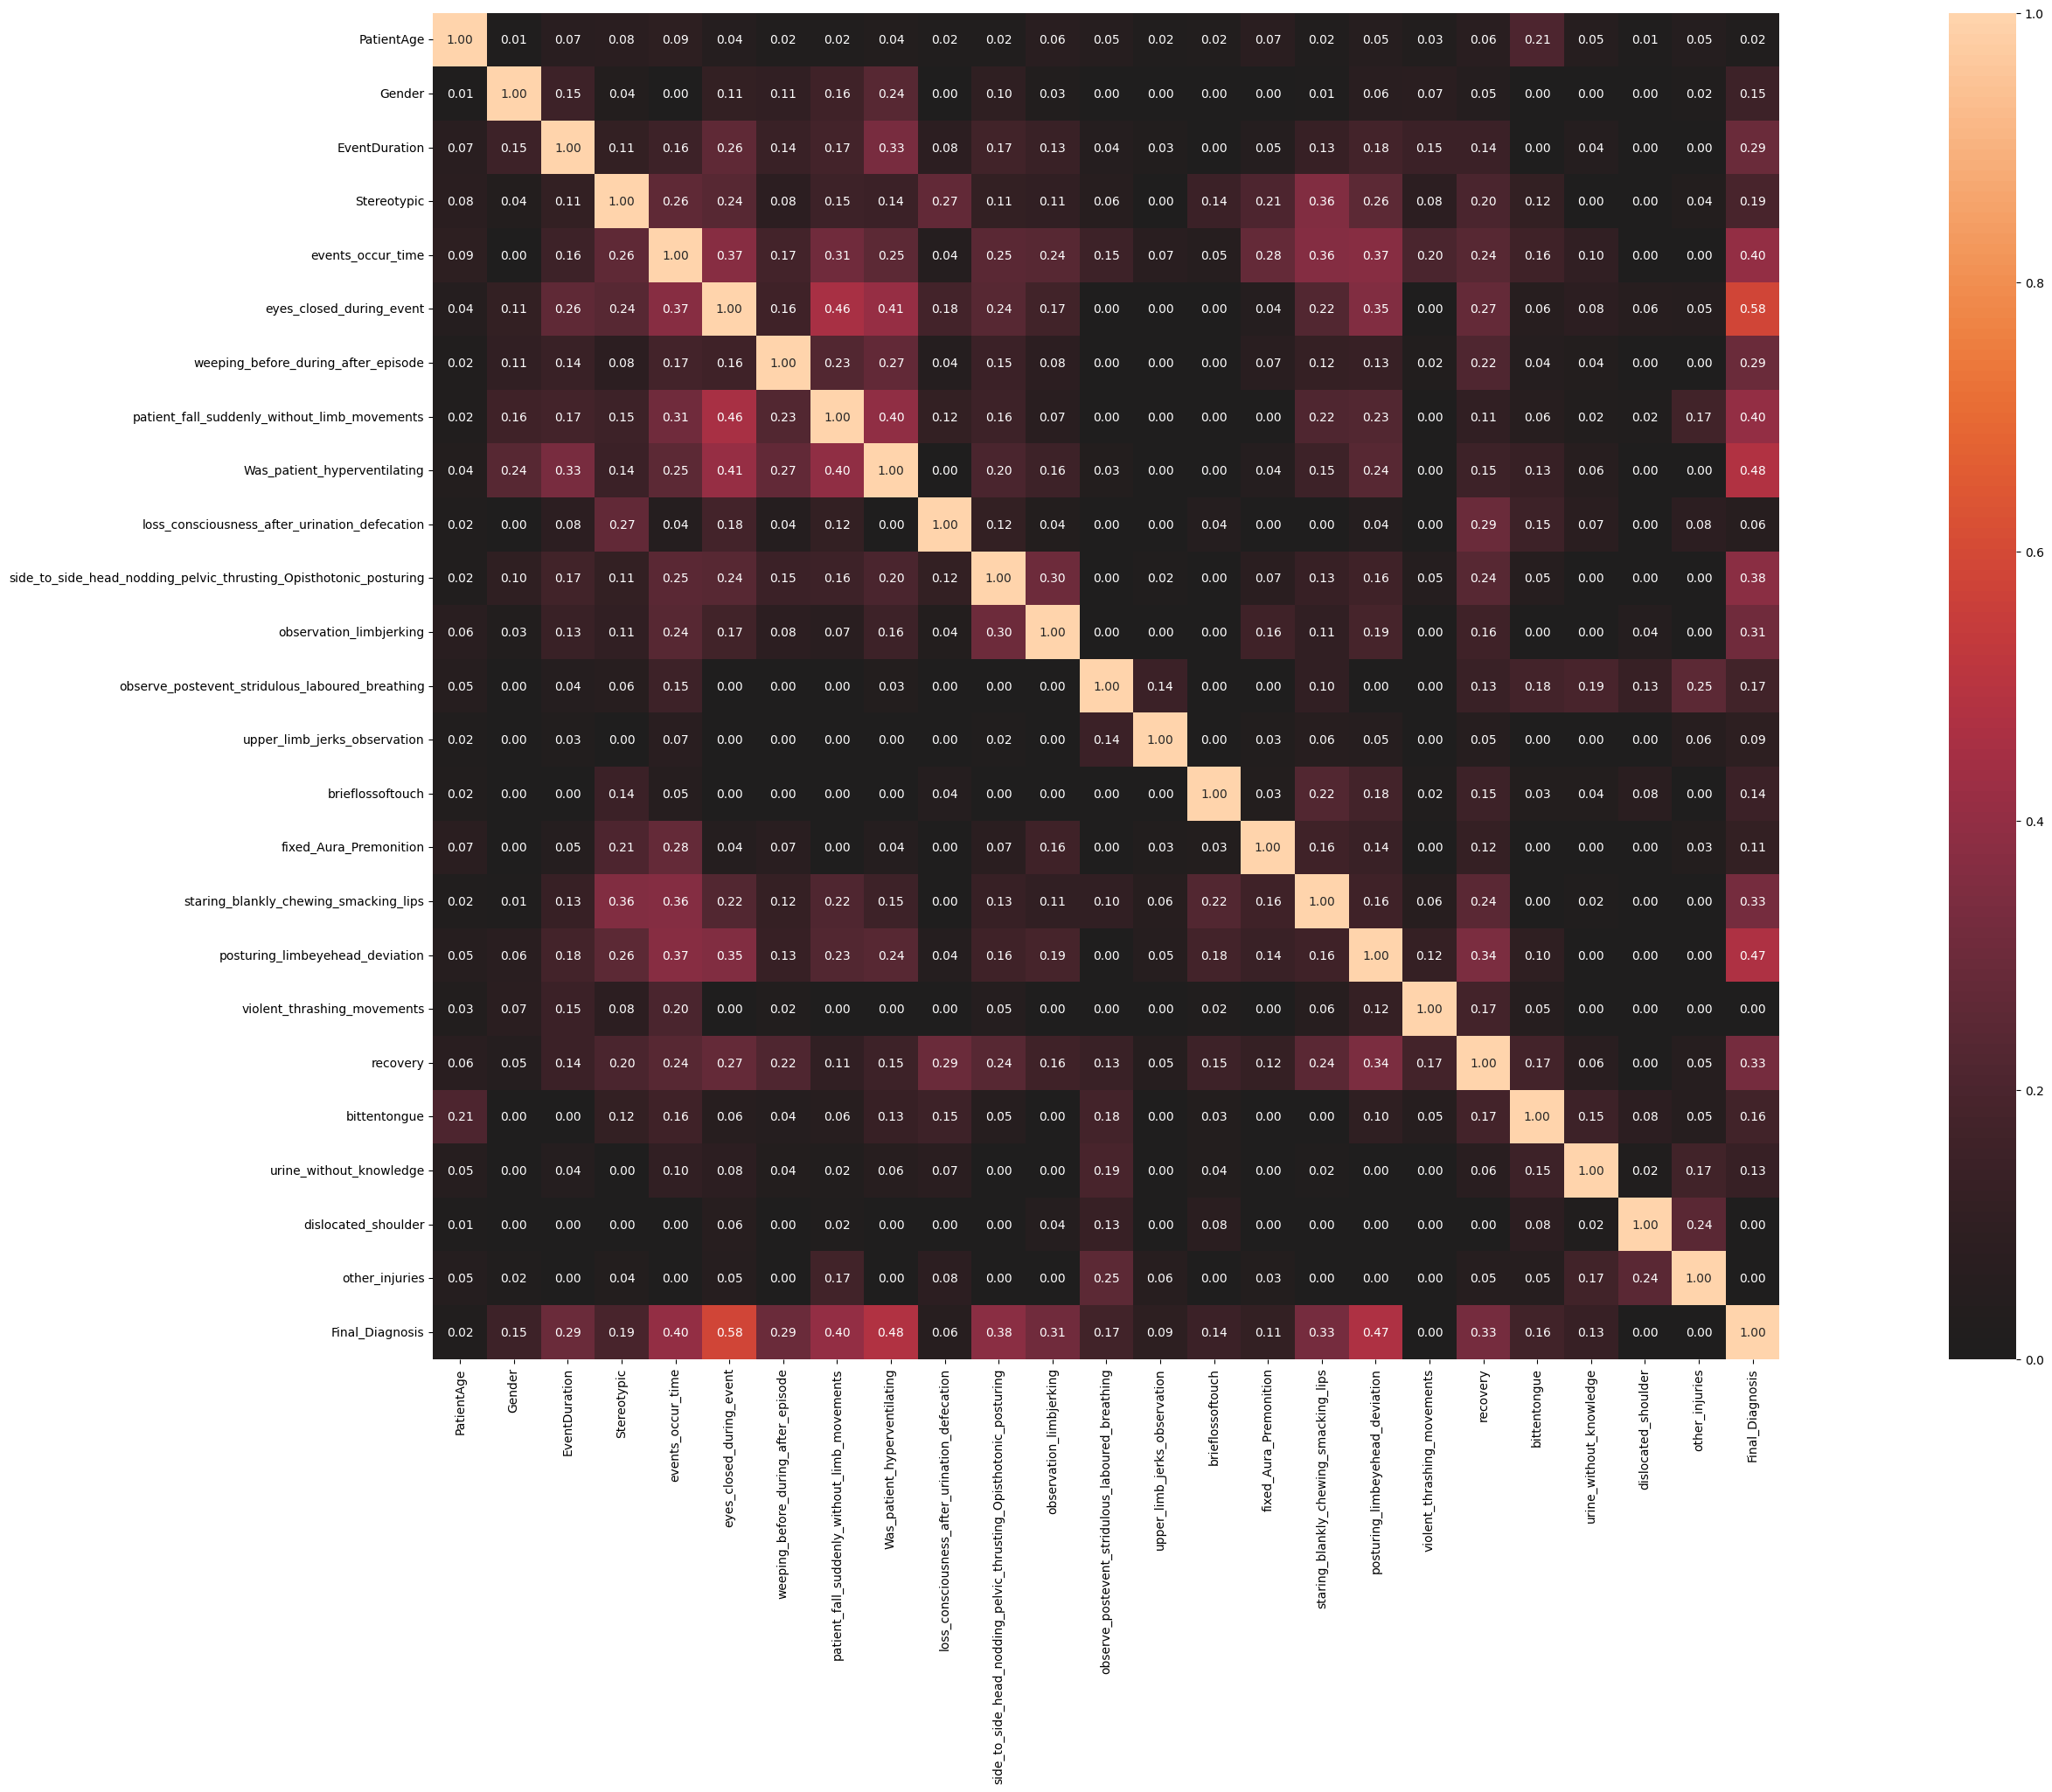

In [25]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(50,20))

In [26]:
complete_correlation['corr']['Final_Diagnosis'].abs().sort_values(ascending=False)

Final_Diagnosis                                                      1.000000
eyes_closed_during_event                                             0.582762
Was_patient_hyperventilating                                         0.483255
posturing_limbeyehead_deviation                                      0.469244
patient_fall_suddenly_without_limb_movements                         0.404903
events_occur_time                                                    0.403122
side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing    0.379443
recovery                                                             0.326325
staring_blankly_chewing_smacking_lips                                0.325994
observation_limbjerking                                              0.311504
EventDuration                                                        0.291232
weeping_before_during_after_episode                                  0.290035
Stereotypic                                                     

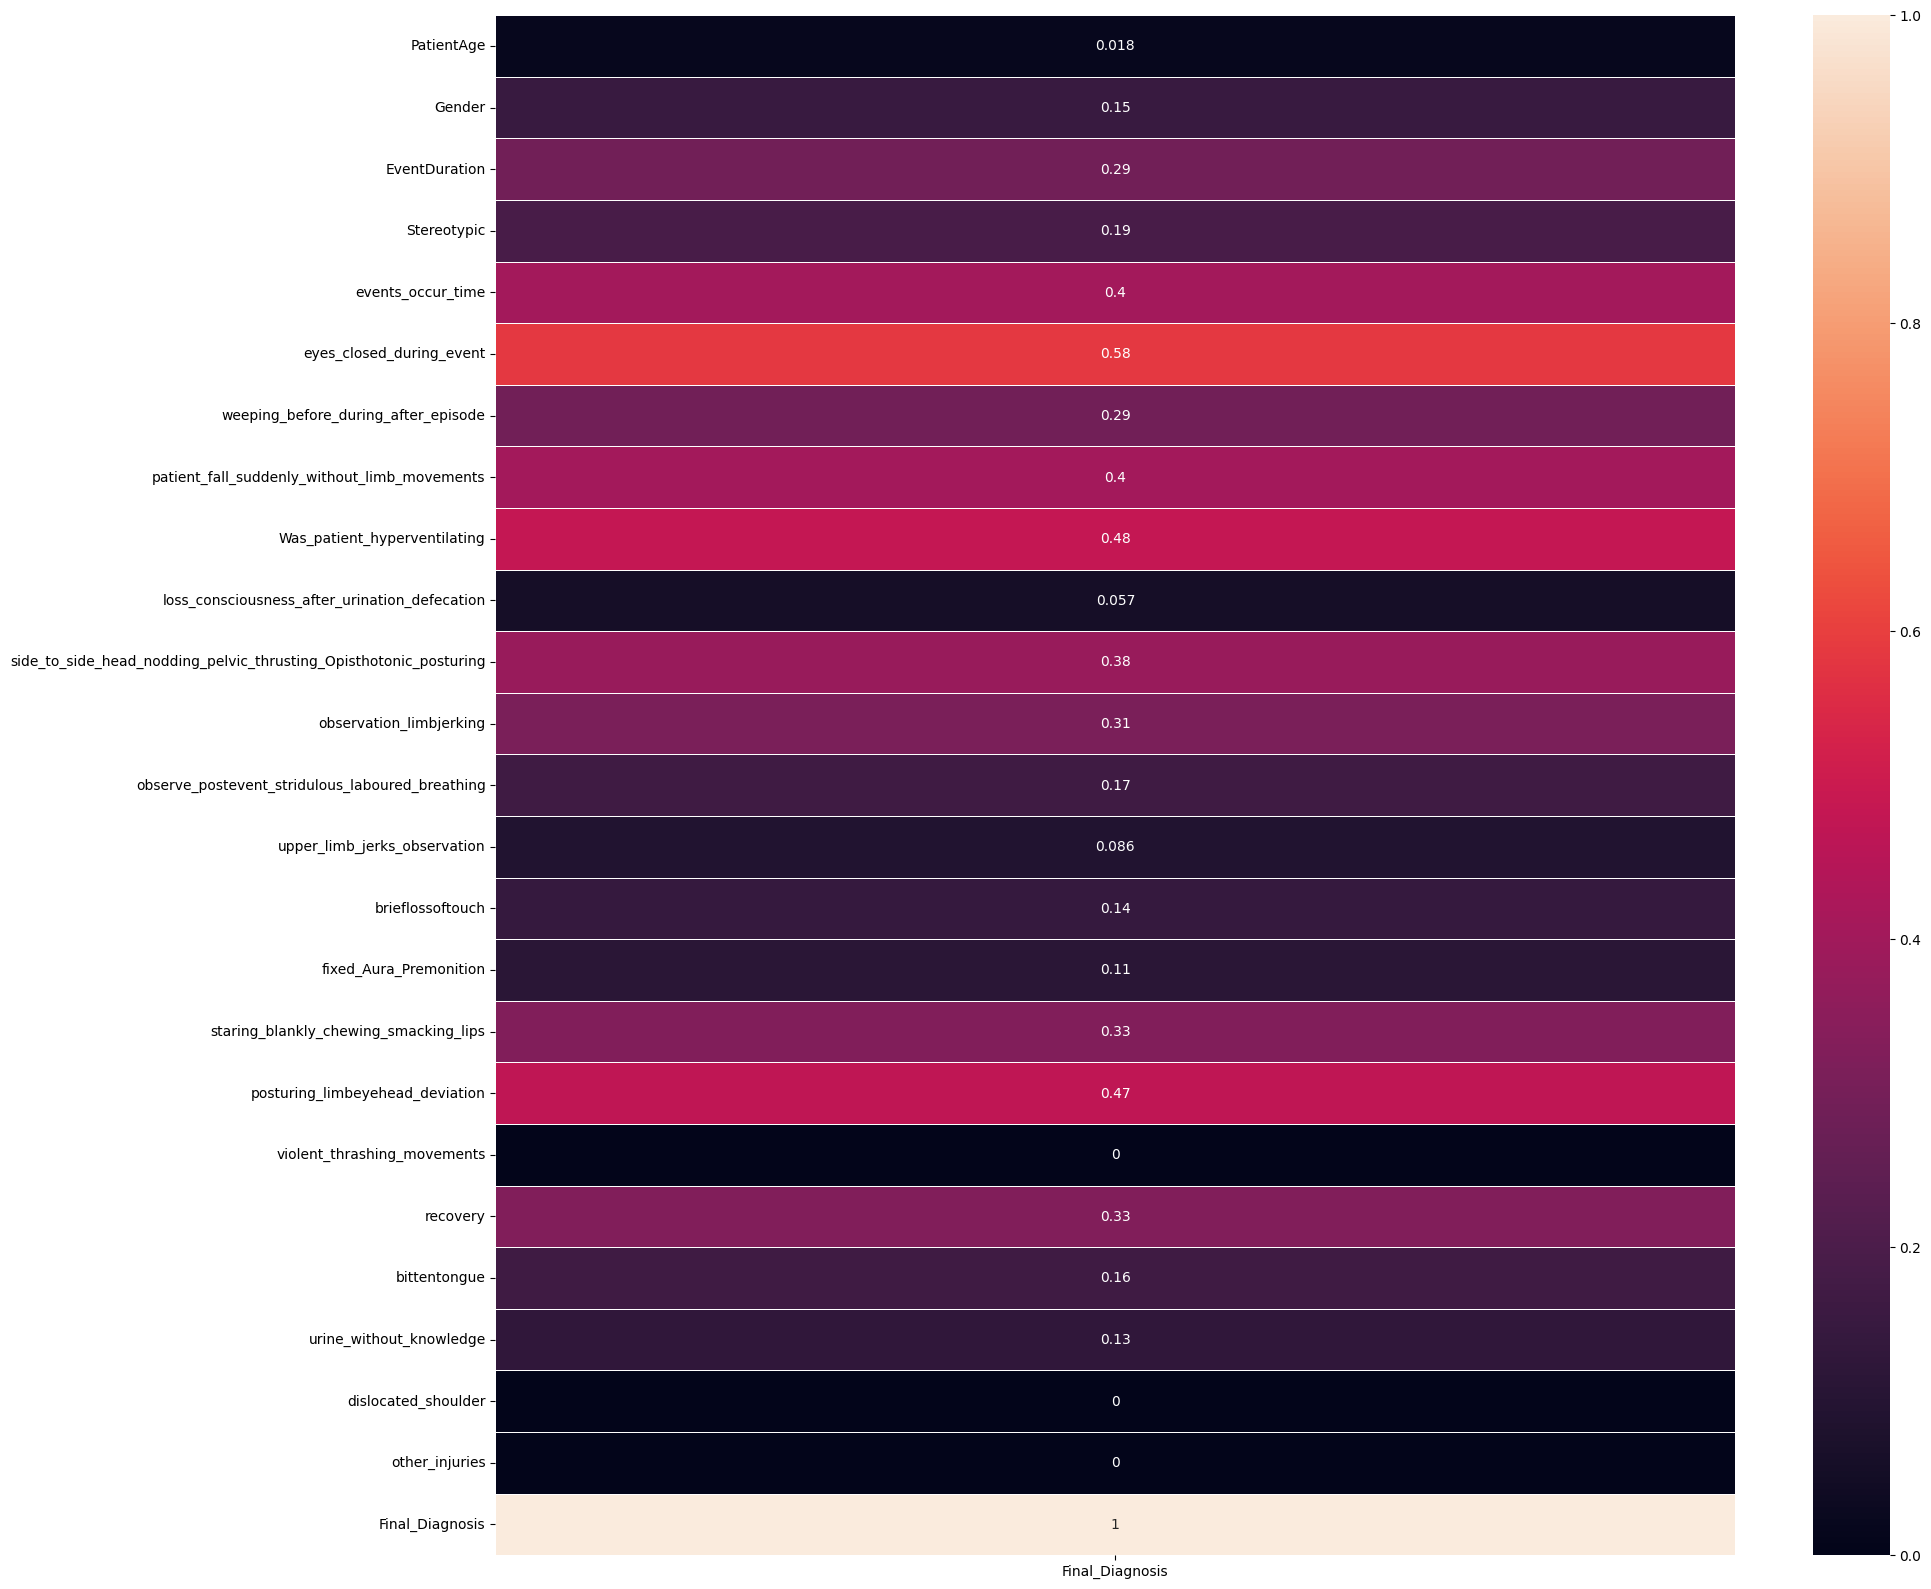

In [27]:
from pprint import pprint
# pprint(c_mat)
# c_mat['corr']

fig, ax = plt.subplots(figsize = (20,20))

columns = list(df)
result_cols = ['Final_Diagnosis']

for col in result_cols:
  columns.remove(col)

sns.heatmap(complete_correlation['corr'][result_cols], annot = True, linewidths = .5, ax = ax)
plt.show()

In [ ]:
#removing starting case col
#df_copy.drop(df_copy.columns[0], axis=1, inplace=True)
#removing last 2 col
##df_copy.drop(df_copy.columns[len(df_copy.columns)-1], axis=1, inplace=True)
#print df_copy
#df_copy

In [28]:
df['Final_Diagnosis'].value_counts()

Epileptic Seizure      403
Non epileptic spell     93
Uncertain                6
Name: Final_Diagnosis, dtype: int64

In [29]:
#index of values with 0 (uncertain value)
f = df.loc[df['Final_Diagnosis'] == 'Uncertain'].index
f

Int64Index([369, 394, 421, 445, 455, 488], dtype='int64')

In [30]:
#remove 0 values
df.drop(f, inplace = True)
df

PatientAge  Gender         EventDuration  \
0          18.0  Female  More than 10 minutes   
1          26.0    Male           1-5 minutes   
2          17.0    Male          5-10 minutes   
3          40.0    Male           1-5 minutes   
4          17.0  Female           1-5 minutes   
..          ...     ...                   ...   
497        44.0    Male           1-5 minutes   
498        20.0    Male           1-5 minutes   
499        12.0  Female           1-5 minutes   
500        12.0  Female           1-5 minutes   
501        12.0  Female           1-5 minutes   

                                       Stereotypic  \
0                                Yes, all are same   
1                                Yes, all are same   
2                                Yes, all are same   
3                                Yes, all are same   
4                                Yes, all are same   
..                                             ...   
497  Two different types (small ones and big ones)   
498                              Yes, all are same   
499                             It’s a first event   
500                             It’s a first event   
501                             It’s a first event   

                     events_occur_time eyes_closed_during_event  \
0              Only during wakefulness                      Yes   
1              Only during wakefulness                      Yes   
2    Both during wakefulness and sleep                       No   
3    Both during wakefulness and sleep                       No   
4    Both during wakefulness and sleep                      Yes   
..                                 ...                      ...   
497  Both during wakefulness and sleep                       No   
498            Only during wakefulness                       No   
499  Both during wakefulness and sleep                      Yes   
500  Both during wakefulness and sleep                      Yes   
501  Both during wakefulness and sleep                      Yes   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
497                                  No   
498                                  No   
499                                  No   
500                                  No   
501                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
497                                           No                           No   
498                                           No                           No   
499                                           No                           No   
500                                           No                           No   
501                                           No                           No   

    loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                              No  ...                    Yes   
1                                              No  ...                     No   
2                                              No  ...                     No   
3                                              No  ...                    Yes   
4                                              No  ...             

In [ ]:
#storing df_copy to xl file in csv file
# from google.colab import files
# brandname = 'df_copy'
# df_copy.to_csv(brandname + '-subdirs_from_sitemap.csv', sep='\t')
# brandname = 'df_copy'
# files.download(brandname + '-subdirs_from_sitemap.csv')

In [ ]:
#storing it in the google sheet
#Export to Google Sheets(Doing the Auth)
# !pip install --upgrade --quiet gspread
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# #from oauth2client.client import GoogleCredentials
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)

#Export to Google Sheets / Part 2 Export
#!pip uninstall gspread-dataframe
# !pip install --upgrade --quiet gspread_dataframe
#pip install gspread_dataframe
# from gspread_dataframe import get_as_dataframe, set_with_dataframe

# sh = gc.create(brandname + '-subdirs_from_sitemap')
# worksheet = gc.open(brandname + '-subdirs_from_sitemap').sheet1

# set_with_dataframe(worksheet, df_copy)
# print(
#     p9.ggplot(df, p9.aes(x='events_occur_time', y='PatientAge')) +
#     p9.geom_point(p9.aes(color='Final_Diagnosis')) +
#     p9.theme_bw())

In [31]:
# one hot encoding

new_cols = dict()
old_cols = []

for col in df:
  unique = set()
  for entry in df[col]:
    unique.add(entry)
  if len(unique) > 2 and type(list(unique)[0]) != type(1.0):
    old_cols.append(col)
    for category in unique:
      col_name = f"{col} {category}"
      new_cols[col_name] = []

      for entry in df[col]:
        if entry == category:
          new_cols[col_name].append('Yes')
        else:
          new_cols[col_name].append('No')

In [32]:
df.drop(old_cols, axis = 1,inplace=True)
for col_name in new_cols.keys():
  df[col_name] = new_cols[col_name]

In [33]:
df

PatientAge  Gender eyes_closed_during_event  \
0          18.0  Female                      Yes   
1          26.0    Male                      Yes   
2          17.0    Male                       No   
3          40.0    Male                       No   
4          17.0  Female                      Yes   
..          ...     ...                      ...   
497        44.0    Male                       No   
498        20.0    Male                       No   
499        12.0  Female                      Yes   
500        12.0  Female                      Yes   
501        12.0  Female                      Yes   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
497                                  No   
498                                  No   
499                                  No   
500                                  No   
501                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
497                                           No                           No   
498                                           No                           No   
499                                           No                           No   
500                                           No                           No   
501                                           No                           No   

    loss_consciousness_after_urination_defecation  \
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   
..                                            ...   
497                                            No   
498                                            No   
499                                           Yes   
500                                           Yes   
501                                           Yes   

    side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                                   No                  
1                                                   No                  
2                                                   No                  
3                                                   No                  
4                                                   No                  
..                                                 ...                  
497                                                 No                  
498                                                 No                  
499                                                 No                  
500                                                 No                  
501                                                 No                  

    observation_limbjerking observe_postevent_stridulous_laboured_breathing  \
0                        No                                             Yes   
1                        No                                              No   
2                        No                                             Yes   
3                        No                                 

In [34]:
df.to_excel('/content/Epilepsy after one hot encoding.xlsx')

In [35]:
from sklearn.model_selection import train_test_split

y= df.Final_Diagnosis
x=df.drop('Final_Diagnosis',axis=1)

#X_train, X_test, y_train, y_test = train_test_split(df_copy[X_cols], df_copy[Y_col],test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y

0      Non epileptic spell
1        Epileptic Seizure
2        Epileptic Seizure
3        Epileptic Seizure
4        Epileptic Seizure
              ...         
497      Epileptic Seizure
498    Non epileptic spell
499      Epileptic Seizure
500      Epileptic Seizure
501      Epileptic Seizure
Name: Final_Diagnosis, Length: 496, dtype: object

In [36]:
x_train

PatientAge  Gender eyes_closed_during_event  \
56         24.0    Male                       No   
227        21.0  Female                       No   
392        27.0  Female                       No   
329         5.0    Male                       No   
220        54.0    Male                       No   
..          ...     ...                      ...   
106         8.0    Male                       No   
270        68.0    Male                       No   
348        12.0  Female                       No   
438        20.0  Female                       No   
102        25.0  Female                       No   

    weeping_before_during_after_episode  \
56                                   No   
227                                 Yes   
392                                  No   
329                                  No   
220                                  No   
..                                  ...   
106                                  No   
270                                  No   
348                                  No   
438                                  No   
102                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
56                                            No                           No   
227                                           No                           No   
392                                           No                           No   
329                                           No                           No   
220                                           No                           No   
..                                           ...                          ...   
106                                           No                           No   
270                                           No                           No   
348                                           No                           No   
438                                           No                           No   
102                                           No                           No   

    loss_consciousness_after_urination_defecation  \
56                                             No   
227                                            No   
392                                            No   
329                                            No   
220                                            No   
..                                            ...   
106                                            No   
270                                           Yes   
348                                            No   
438                                            No   
102                                            No   

    side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
56                                                  No                  
227                                                 No                  
392                                                 No                  
329                                                 No                  
220                                                 No                  
..                                                 ...                  
106                                                 No                  
270                                                 No                  
348                                                 No                  
438                                                 No                  
102                                                 No                  

    observation_limbjerking observe_postevent_stridulous_laboured_breathing  \
56                       No                                             Yes   
227                      No                                              No   
392                      No                                              No   
329                      No                                 

In [37]:
x_test

PatientAge  Gender eyes_closed_during_event  \
462        71.0  Female                       No   
73         77.0    Male                       No   
231        17.0    Male                       No   
175        13.0  Female                       No   
237        18.0    Male                       No   
..          ...     ...                      ...   
247        26.0    Male                       No   
383         7.0    Male                       No   
19         32.0    Male                       No   
320        22.0  Female                       No   
489        32.0    Male                       No   

    weeping_before_during_after_episode  \
462                                  No   
73                                   No   
231                                  No   
175                                  No   
237                                  No   
..                                  ...   
247                                  No   
383                                  No   
19                                   No   
320                                  No   
489                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
462                                           No                           No   
73                                            No                           No   
231                                           No                           No   
175                                          Yes                           No   
237                                           No                           No   
..                                           ...                          ...   
247                                           No                           No   
383                                           No                           No   
19                                            No                           No   
320                                           No                           No   
489                                           No                           No   

    loss_consciousness_after_urination_defecation  \
462                                            No   
73                                             No   
231                                            No   
175                                            No   
237                                            No   
..                                            ...   
247                                            No   
383                                            No   
19                                             No   
320                                            No   
489                                            No   

    side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
462                                                 No                  
73                                                  No                  
231                                                 No                  
175                                                 No                  
237                                                 No                  
..                                                 ...                  
247                                                 No                  
383                                                 No                  
19                                                  No                  
320                                                 No                  
489                                                 No                  

    observation_limbjerking observe_postevent_stridulous_laboured_breathing  \
462                      No                                              No   
73                       No                                             Yes   
231                      No                                              No   
175                      No                                 

In [38]:
y_train

56       Epileptic Seizure
227      Epileptic Seizure
392      Epileptic Seizure
329      Epileptic Seizure
220      Epileptic Seizure
              ...         
106      Epileptic Seizure
270      Epileptic Seizure
348      Epileptic Seizure
438      Epileptic Seizure
102    Non epileptic spell
Name: Final_Diagnosis, Length: 396, dtype: object

In [39]:
y_test

462    Epileptic Seizure
73     Epileptic Seizure
231    Epileptic Seizure
175    Epileptic Seizure
237    Epileptic Seizure
             ...        
247    Epileptic Seizure
383    Epileptic Seizure
19     Epileptic Seizure
320    Epileptic Seizure
489    Epileptic Seizure
Name: Final_Diagnosis, Length: 100, dtype: object

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [40]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = "https://docs.google.com/spreadsheets/d/1w_Cv0-Hjal9KMStRTuLkPOc2JOfCAk-q6rKRisgArAY/edit?usp=sharing"
#df_bonus = pd.read_csv(path)
#df_bonus
df

PatientAge  Gender eyes_closed_during_event  \
0          18.0  Female                      Yes   
1          26.0    Male                      Yes   
2          17.0    Male                       No   
3          40.0    Male                       No   
4          17.0  Female                      Yes   
..          ...     ...                      ...   
497        44.0    Male                       No   
498        20.0    Male                       No   
499        12.0  Female                      Yes   
500        12.0  Female                      Yes   
501        12.0  Female                      Yes   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
497                                  No   
498                                  No   
499                                  No   
500                                  No   
501                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
497                                           No                           No   
498                                           No                           No   
499                                           No                           No   
500                                           No                           No   
501                                           No                           No   

    loss_consciousness_after_urination_defecation  \
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   
..                                            ...   
497                                            No   
498                                            No   
499                                           Yes   
500                                           Yes   
501                                           Yes   

    side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                                   No                  
1                                                   No                  
2                                                   No                  
3                                                   No                  
4                                                   No                  
..                                                 ...                  
497                                                 No                  
498                                                 No                  
499                                                 No                  
500                                                 No                  
501                                                 No                  

    observation_limbjerking observe_postevent_stridulous_laboured_breathing  \
0                        No                                             Yes   
1                        No                                              No   
2                        No                                             Yes   
3                        No                                 

In [ ]:
# #%pip install statsmodels --upgrade
# !pip show matplotlib   #enables you to check version
# !pip install matplotlib==3.5

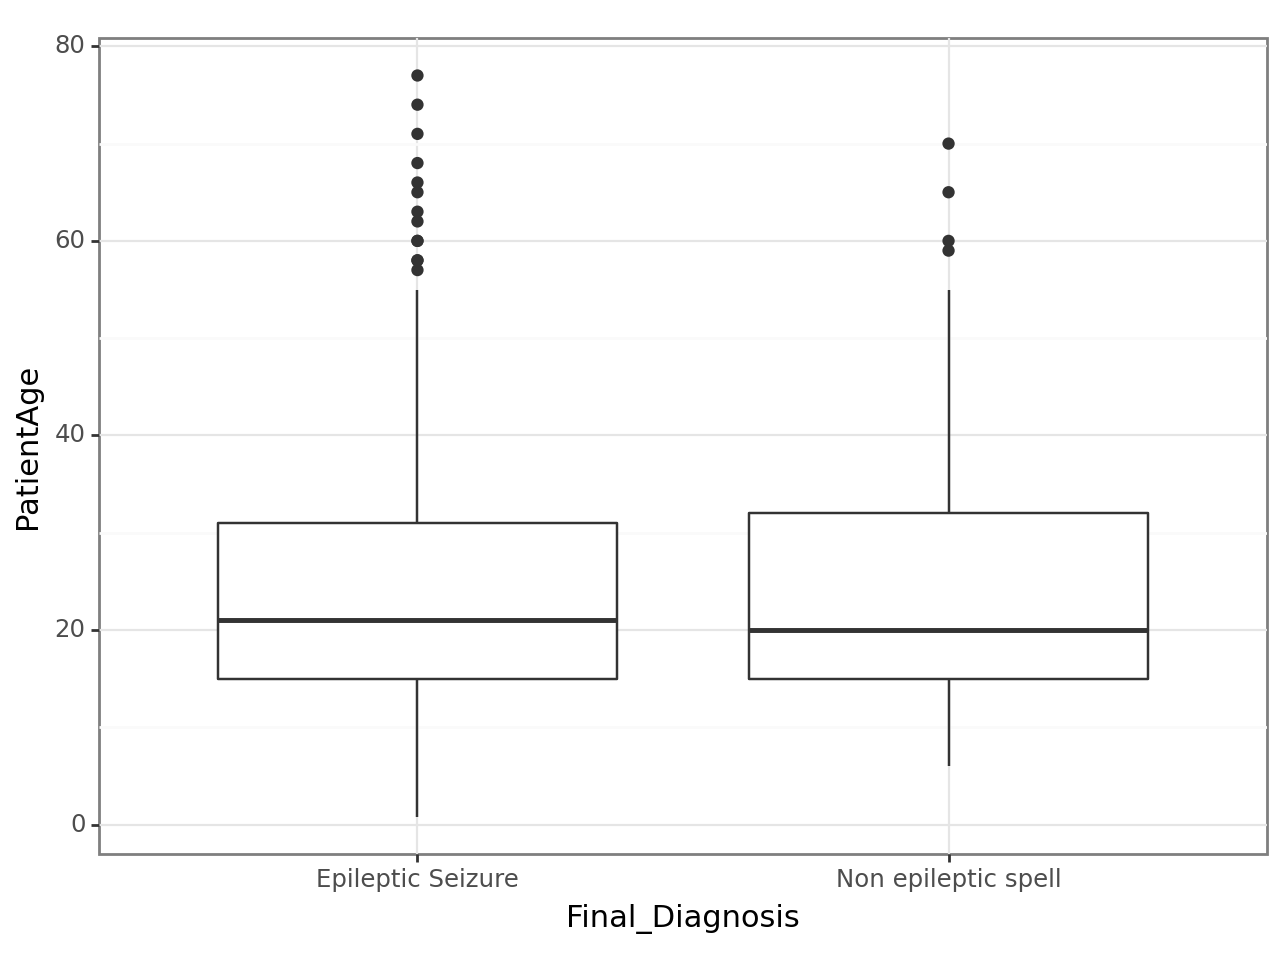

In [41]:
import plotnine as p9

print(
    p9.ggplot(df, p9.aes(x='Final_Diagnosis', y='PatientAge')) +
    p9.geom_boxplot() +
    p9.theme_bw())

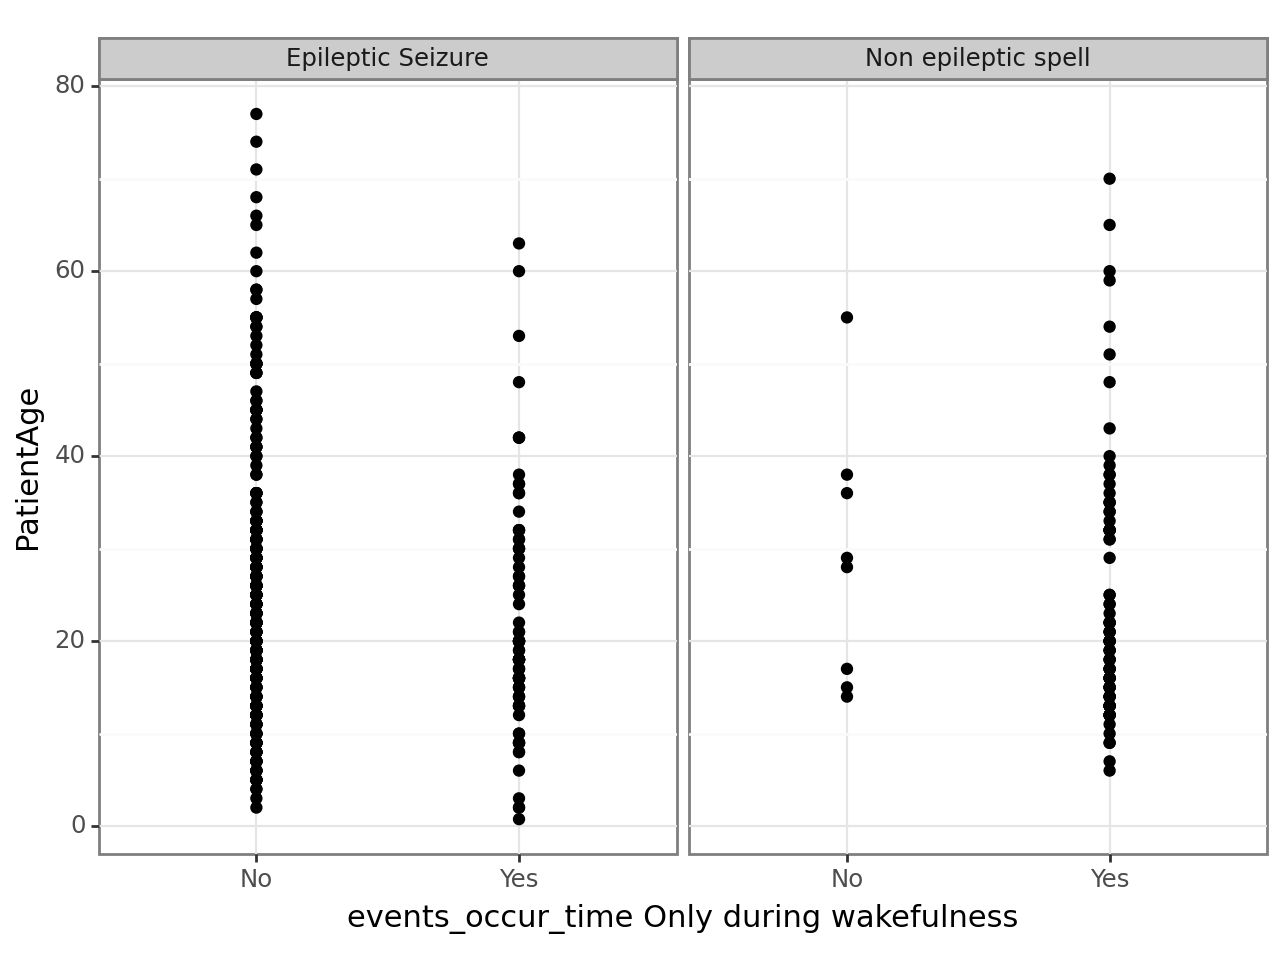

In [42]:
print(
    p9.ggplot(df, p9.aes(x='events_occur_time Only during wakefulness', y='PatientAge')) +
    p9.geom_point() +
    p9.facet_wrap('~ Final_Diagnosis') +
    p9.theme_bw())

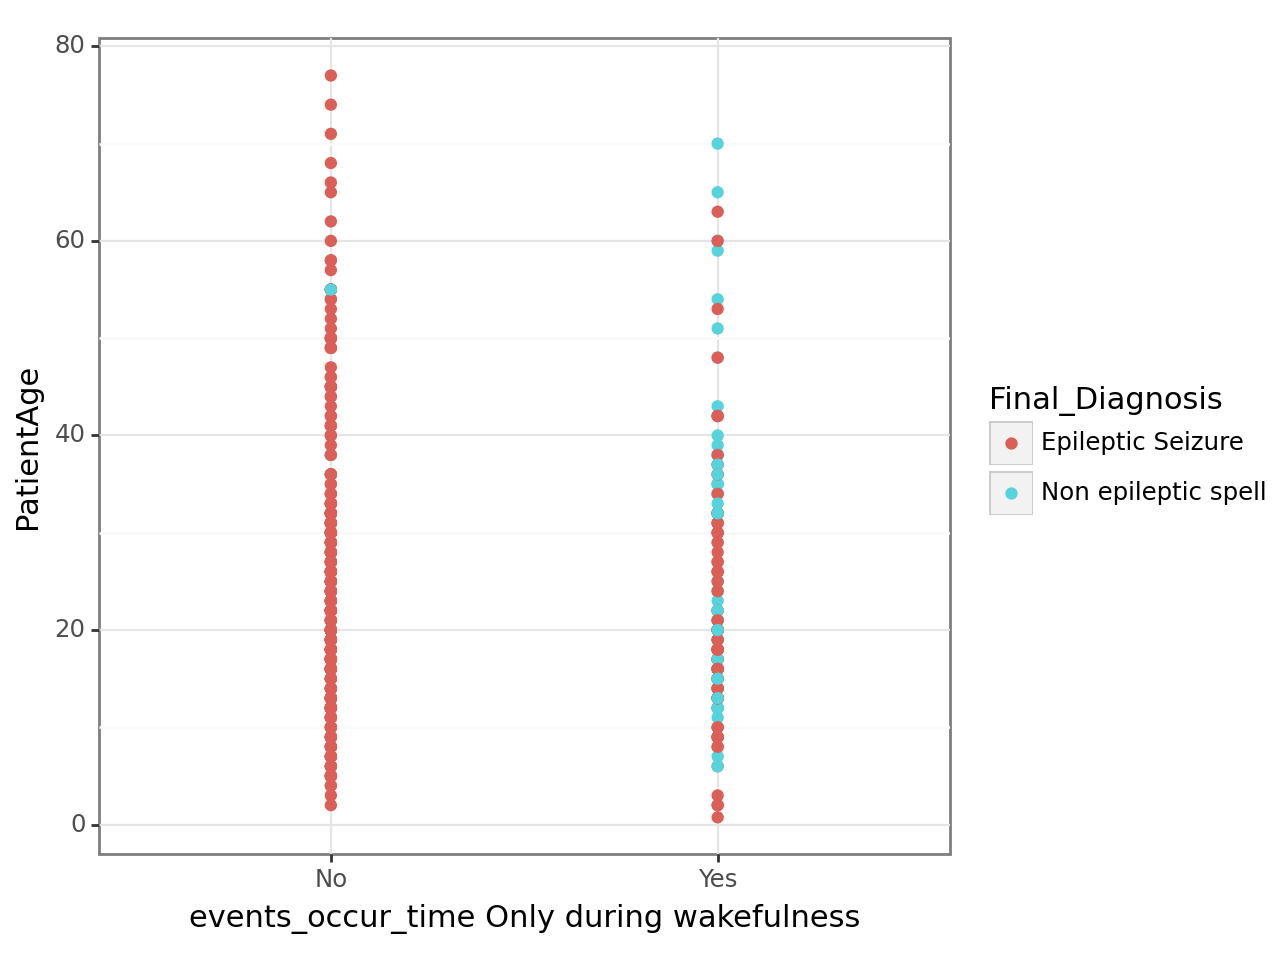

In [43]:
print(
    p9.ggplot(df, p9.aes(x='events_occur_time Only during wakefulness', y='PatientAge')) +
    p9.geom_point(p9.aes(color='Final_Diagnosis')) +
    p9.theme_bw())

In [44]:
print(x_train['PatientAge'].dtype)

cat_cols = []
for col in x_train.columns:
    if col!='PatientAge':
        cat_cols.append(True)
    else:
      cat_cols.append(False)


float64


In [45]:

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your systhem)
!pip install --upgrade --quiet imblearn
from imblearn.over_sampling import SMOTENC

sm = SMOTENC( categorical_features = cat_cols, random_state = 10)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())


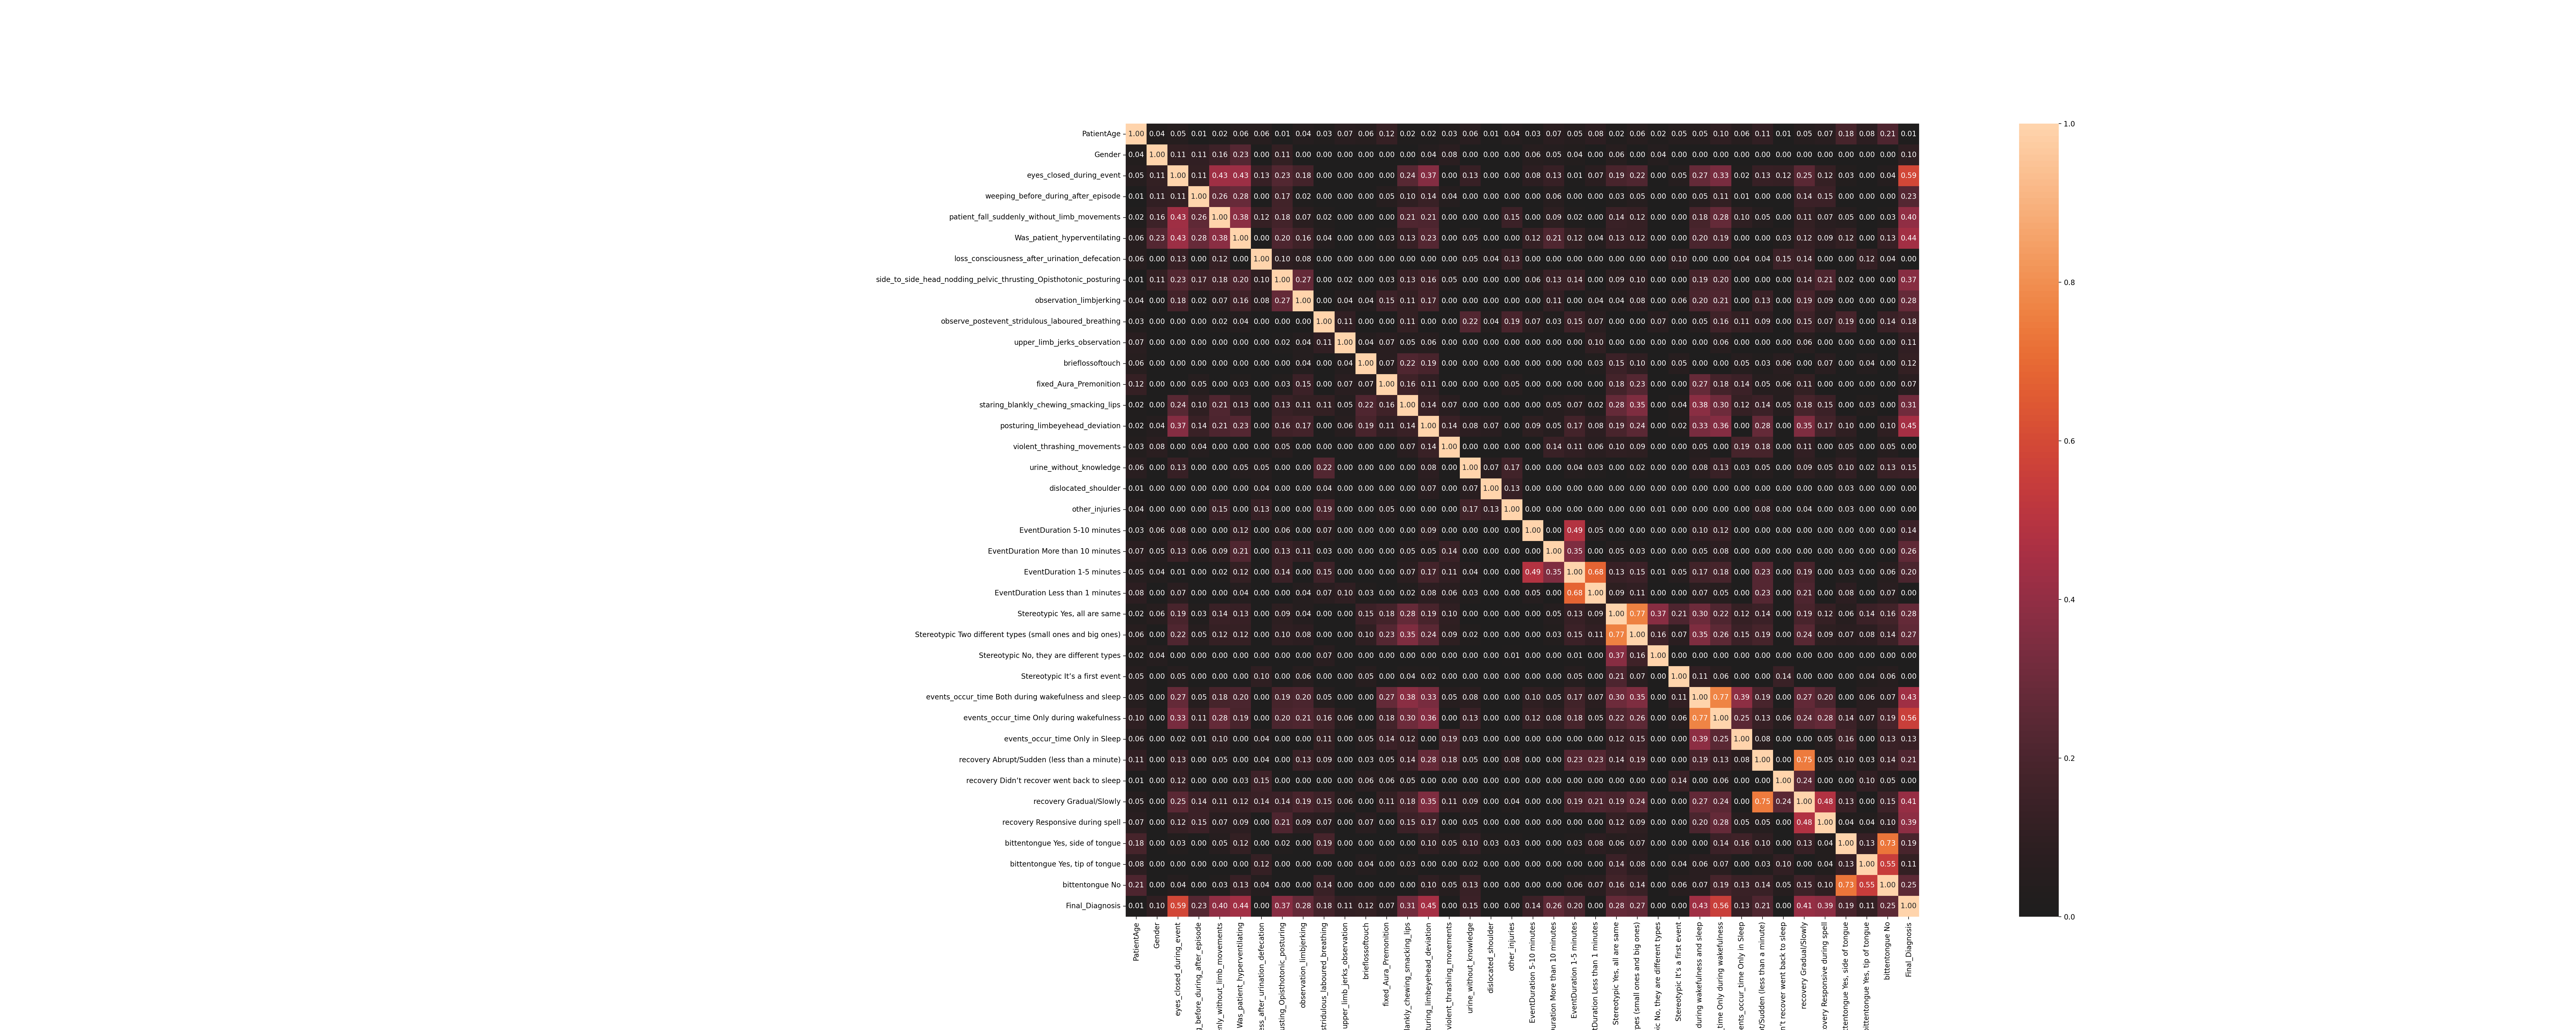

In [46]:
x_original = x_train.copy()
x_original['Final_Diagnosis'] = y_train.tolist()
correlations = {}
complete_correlation= associations(x_original, filename= 'complete_correlation.png', figsize=(50,20))

correlations['original'] = (complete_correlation['corr']["Final_Diagnosis"].abs().copy())

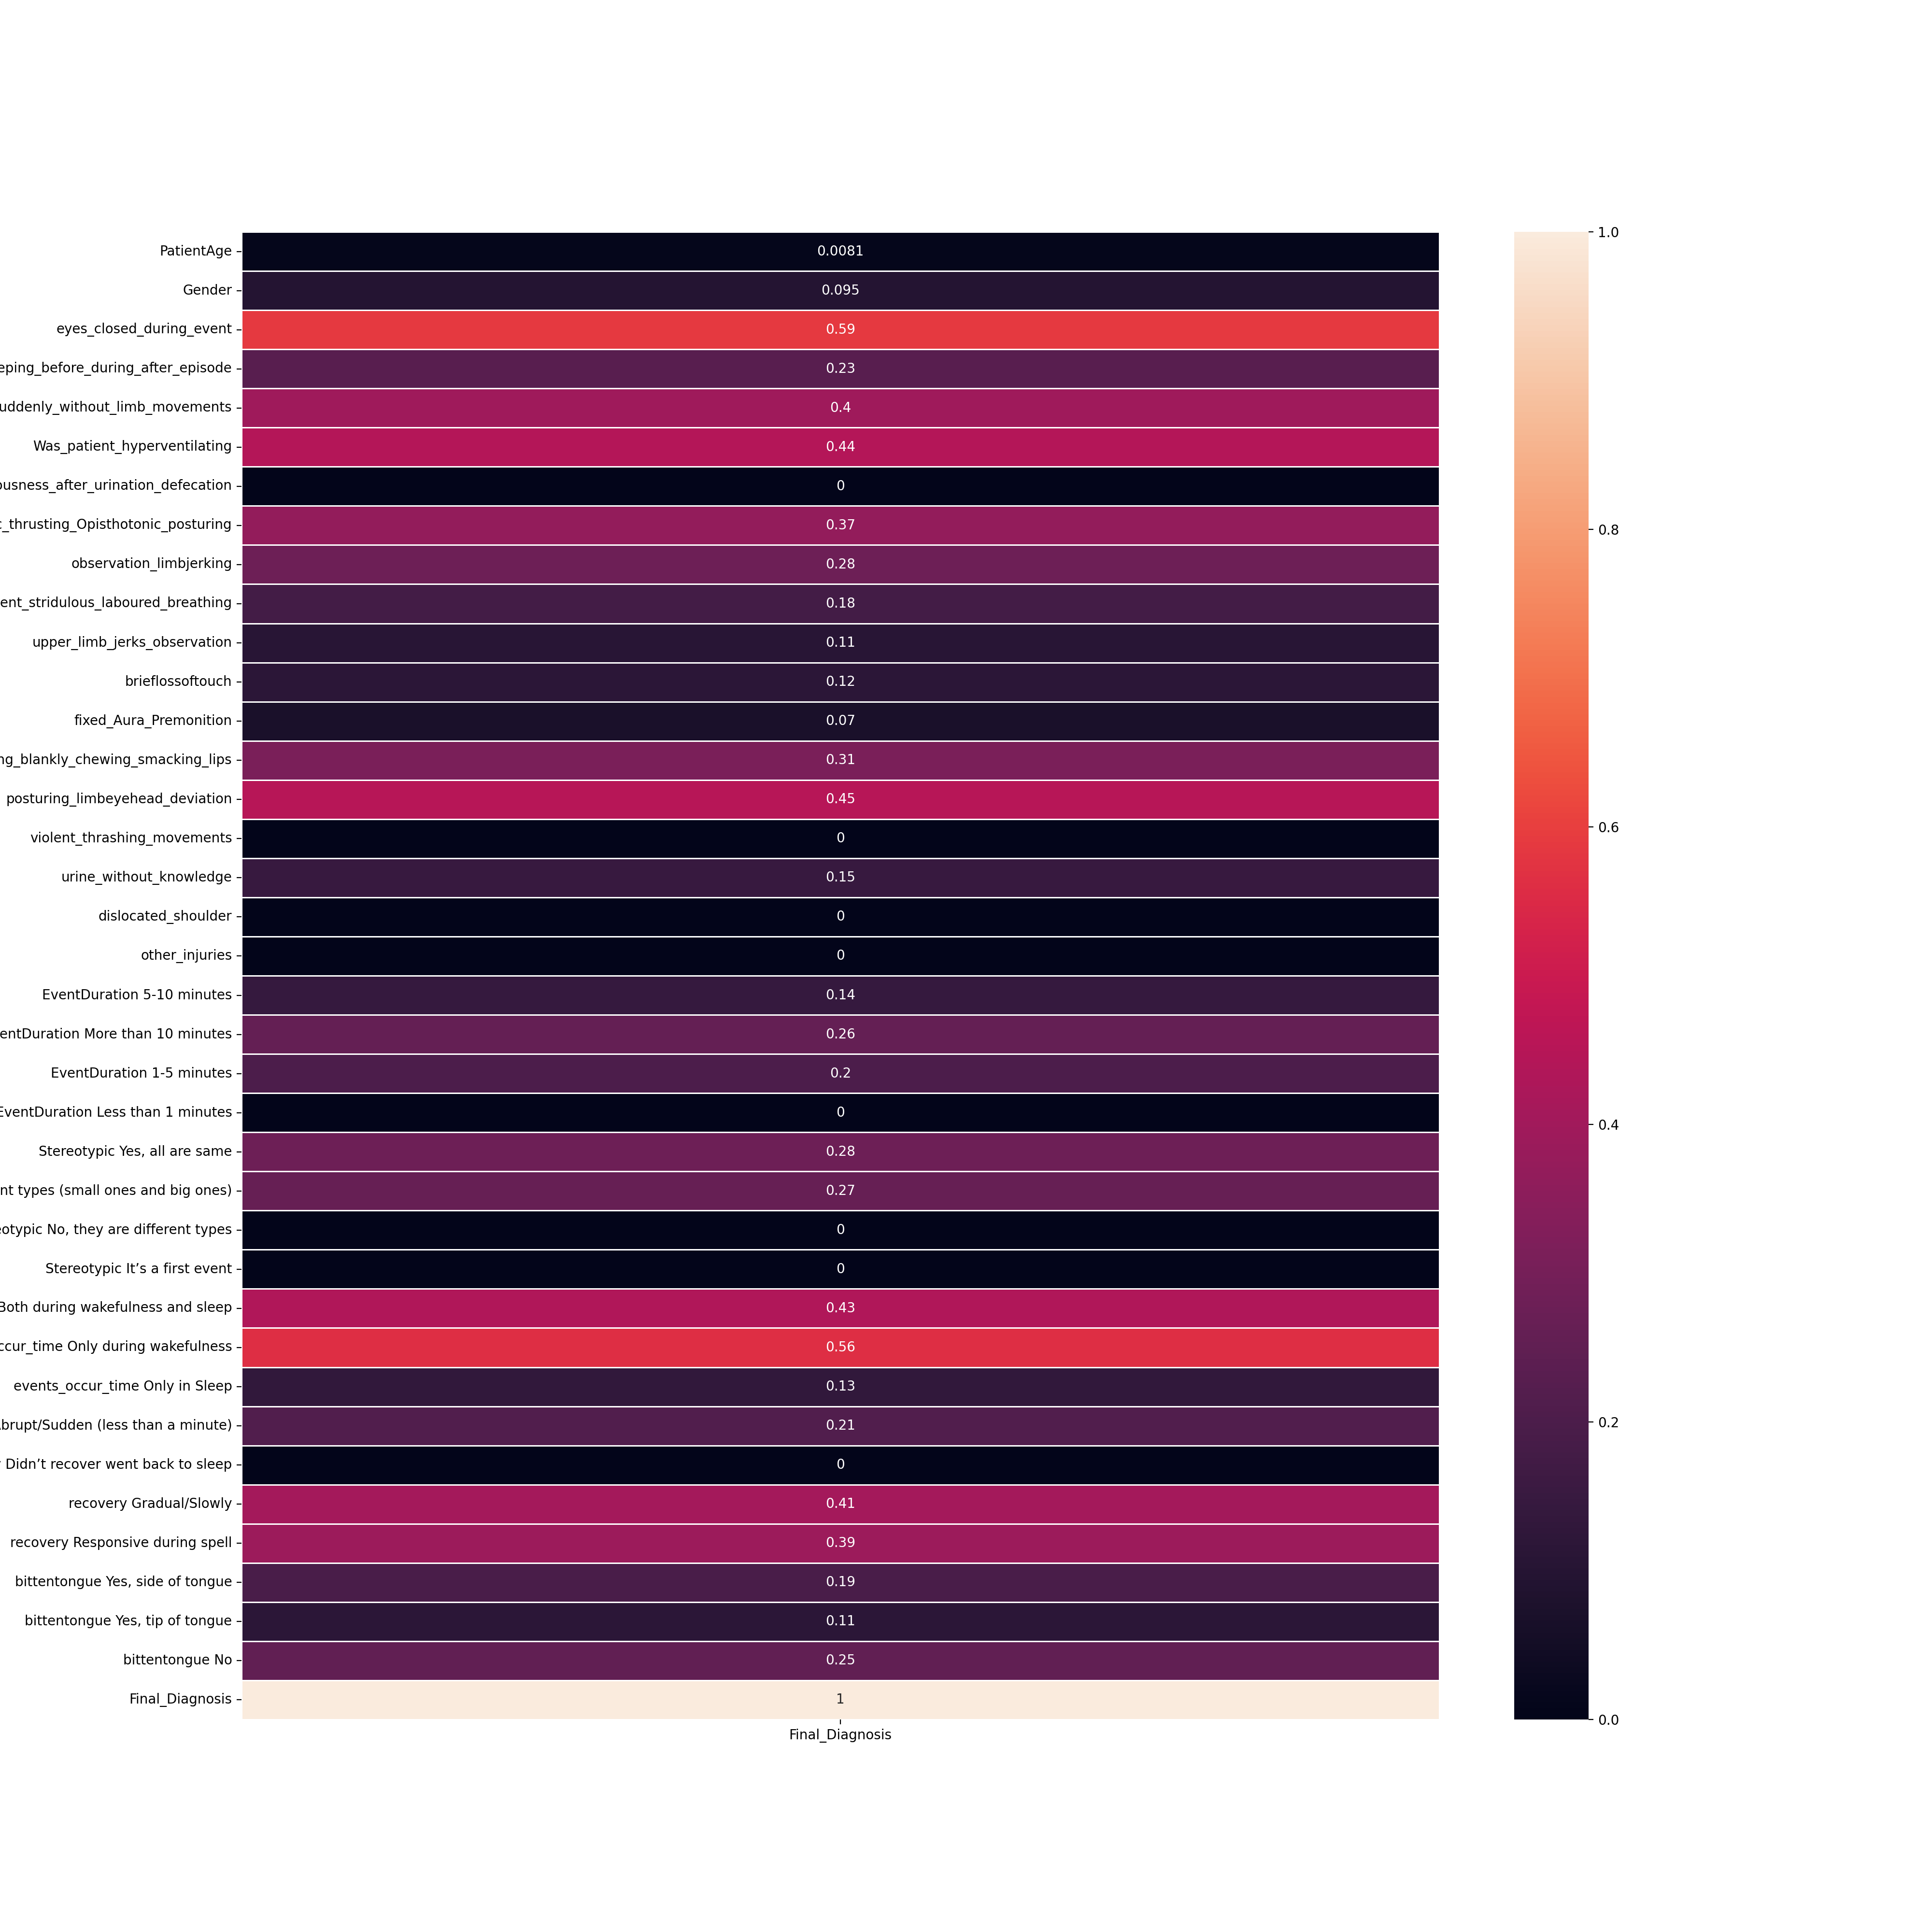

In [47]:
from pprint import pprint
# pprint(c_mat)
# c_mat['corr']

fig, ax = plt.subplots(figsize = (20,20))

columns = list(df)
result_cols = ['Final_Diagnosis']

for col in result_cols:
  columns.remove(col)

sns.heatmap(complete_correlation['corr'][result_cols], annot = True, linewidths = .5, ax = ax)
plt.show()

In [48]:
cor_mp = complete_correlation['corr']["Final_Diagnosis"].abs().sort_values(ascending=False)

Index(['Final_Diagnosis', 'eyes_closed_during_event',
       'events_occur_time Only during wakefulness',
       'posturing_limbeyehead_deviation', 'Was_patient_hyperventilating',
       'events_occur_time Both during wakefulness and sleep',
       'recovery Gradual/Slowly',
       'patient_fall_suddenly_without_limb_movements',
       'recovery Responsive during spell',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'staring_blankly_chewing_smacking_lips',
       'Stereotypic Yes, all are same', 'observation_limbjerking',
       'Stereotypic Two different types (small ones and big ones)',
       'EventDuration More than 10 minutes', 'bittentongue No',
       'weeping_before_during_after_episode',
       'recovery Abrupt/Sudden (less than a minute)',
       'EventDuration 1-5 minutes', 'bittentongue Yes, side of tongue',
       'observe_postevent_stridulous_laboured_breathing',
       'urine_without_knowledge', 'EventDuration 5-10 minutes',
       'e

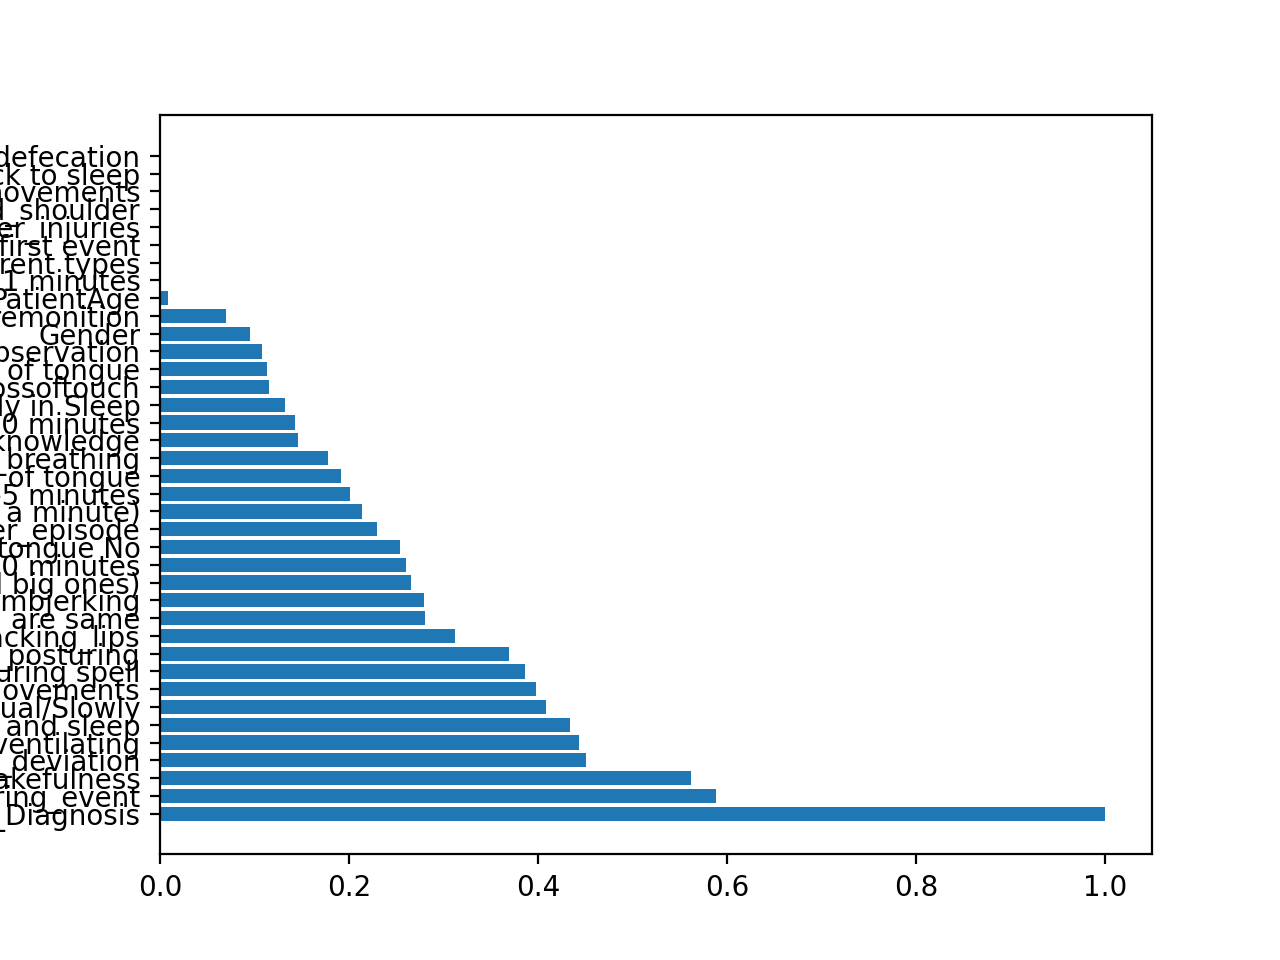

In [49]:
feature = cor_mp.keys()

print(feature)

plt.barh([feature[i] for i in range(len(feature))], cor_mp)
plt.rcParams['figure.figsize'] = [10, 11]
plt.show()

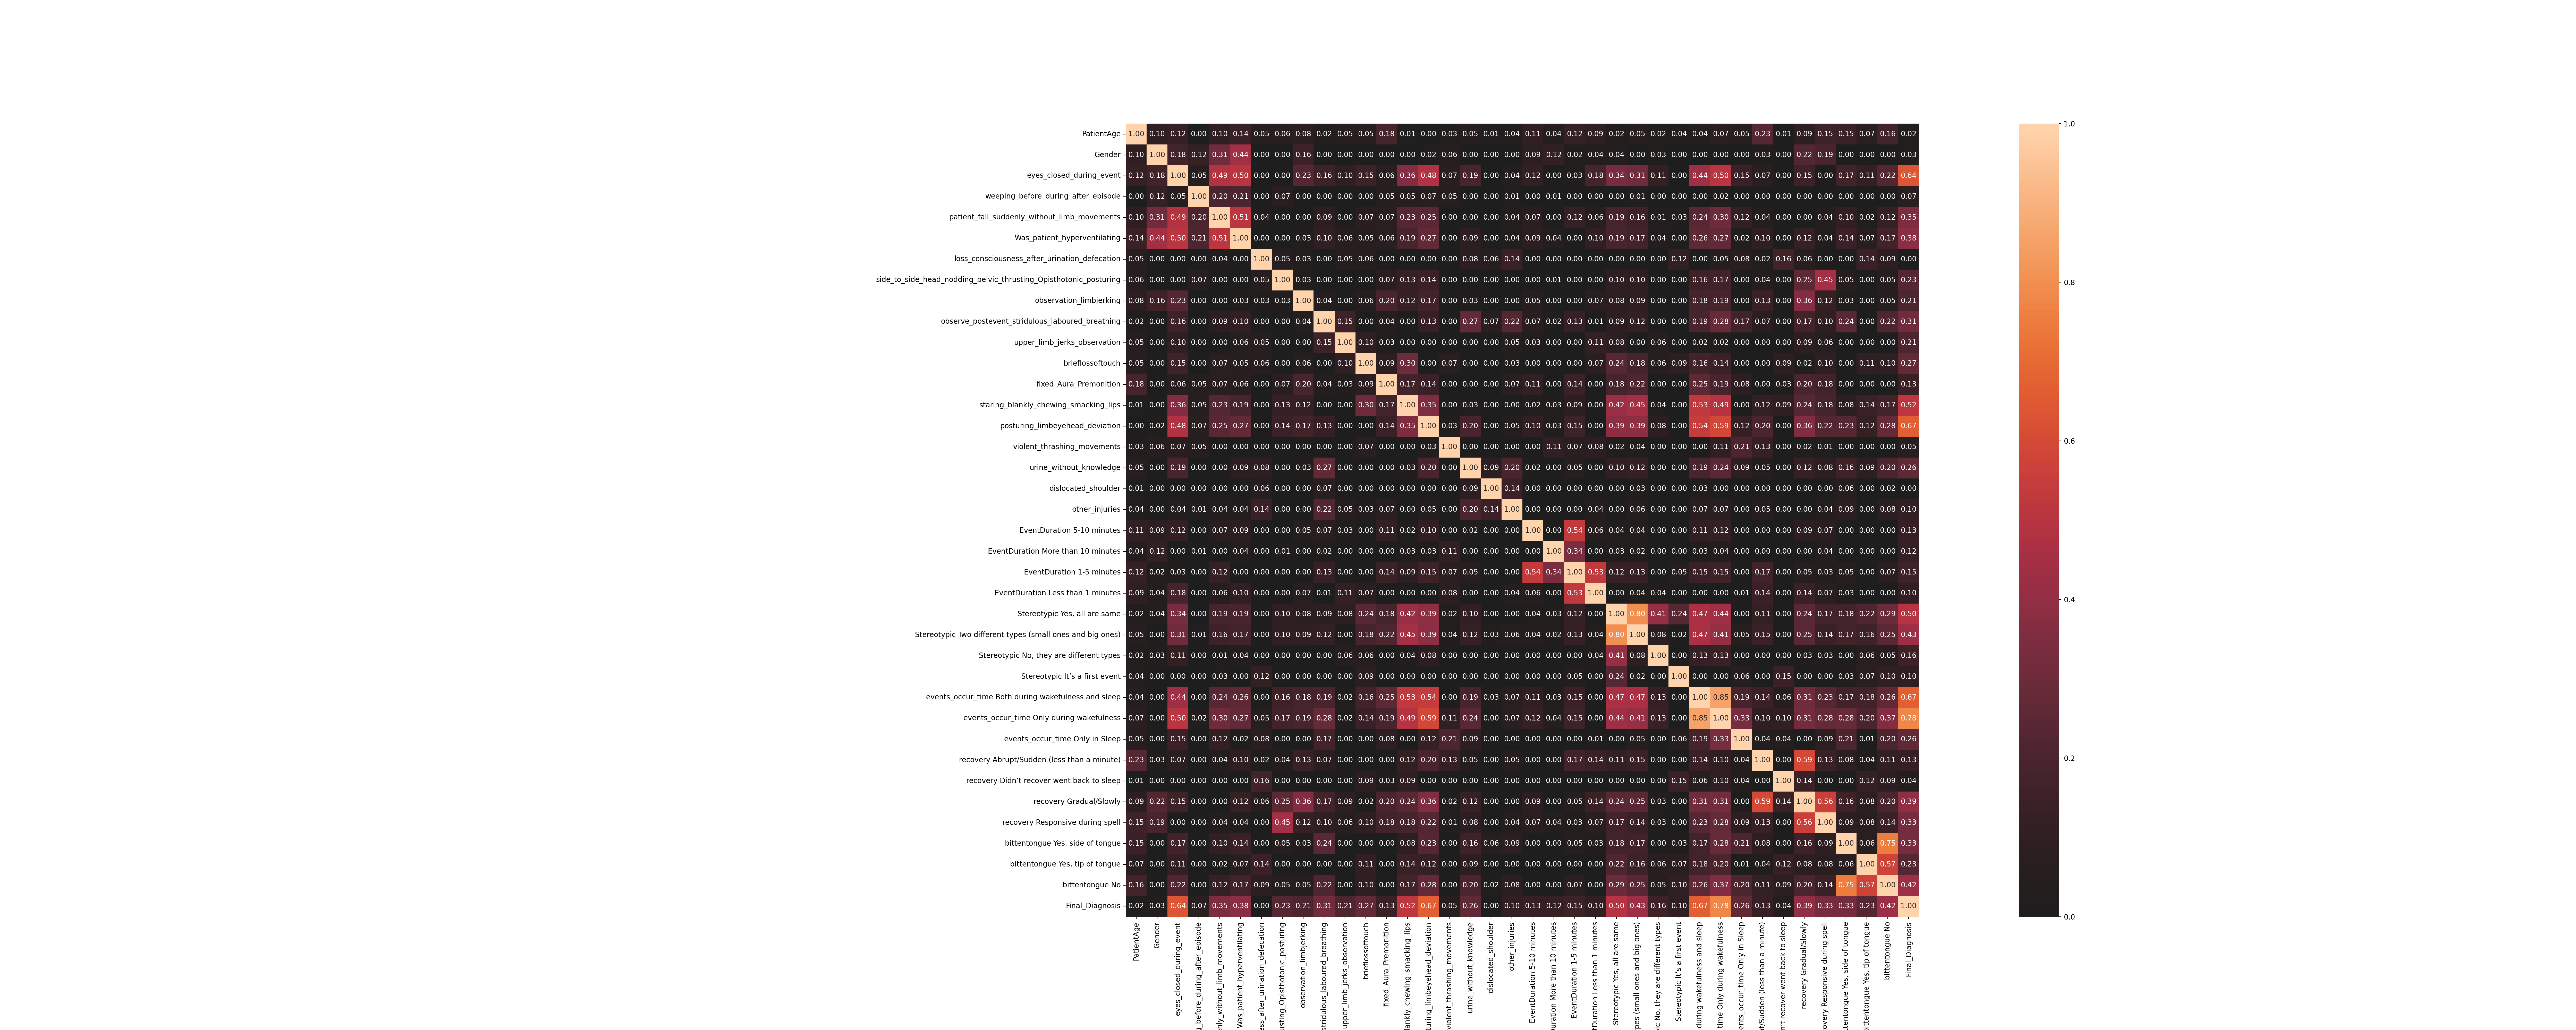

In [50]:
x_corr = x_train_smote.copy()
x_corr['Final_Diagnosis'] = y_train_smote.tolist()

complete_correlation= associations(x_corr, filename= 'complete_correlation.png', figsize=(50,20))
correlations['smote'] =(complete_correlation['corr']["Final_Diagnosis"].abs().copy())

In [51]:
cor_mp = complete_correlation['corr']["Final_Diagnosis"].abs().sort_values(ascending=False)

In [52]:
cor_mp

Final_Diagnosis                                                      1.000000
events_occur_time Only during wakefulness                            0.780582
posturing_limbeyehead_deviation                                      0.669646
events_occur_time Both during wakefulness and sleep                  0.666420
eyes_closed_during_event                                             0.638315
staring_blankly_chewing_smacking_lips                                0.518644
Stereotypic Yes, all are same                                        0.498987
Stereotypic Two different types (small ones and big ones)            0.428256
bittentongue No                                                      0.424907
recovery Gradual/Slowly                                              0.394504
Was_patient_hyperventilating                                         0.382601
patient_fall_suddenly_without_limb_movements                         0.350469
recovery Responsive during spell                                

Index(['Final_Diagnosis', 'events_occur_time Only during wakefulness',
       'posturing_limbeyehead_deviation',
       'events_occur_time Both during wakefulness and sleep',
       'eyes_closed_during_event', 'staring_blankly_chewing_smacking_lips',
       'Stereotypic Yes, all are same',
       'Stereotypic Two different types (small ones and big ones)',
       'bittentongue No', 'recovery Gradual/Slowly',
       'Was_patient_hyperventilating',
       'patient_fall_suddenly_without_limb_movements',
       'recovery Responsive during spell', 'bittentongue Yes, side of tongue',
       'observe_postevent_stridulous_laboured_breathing', 'brieflossoftouch',
       'urine_without_knowledge', 'events_occur_time Only in Sleep',
       'bittentongue Yes, tip of tongue',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'observation_limbjerking', 'upper_limb_jerks_observation',
       'Stereotypic No, they are different types', 'EventDuration 1-5 minutes',
    

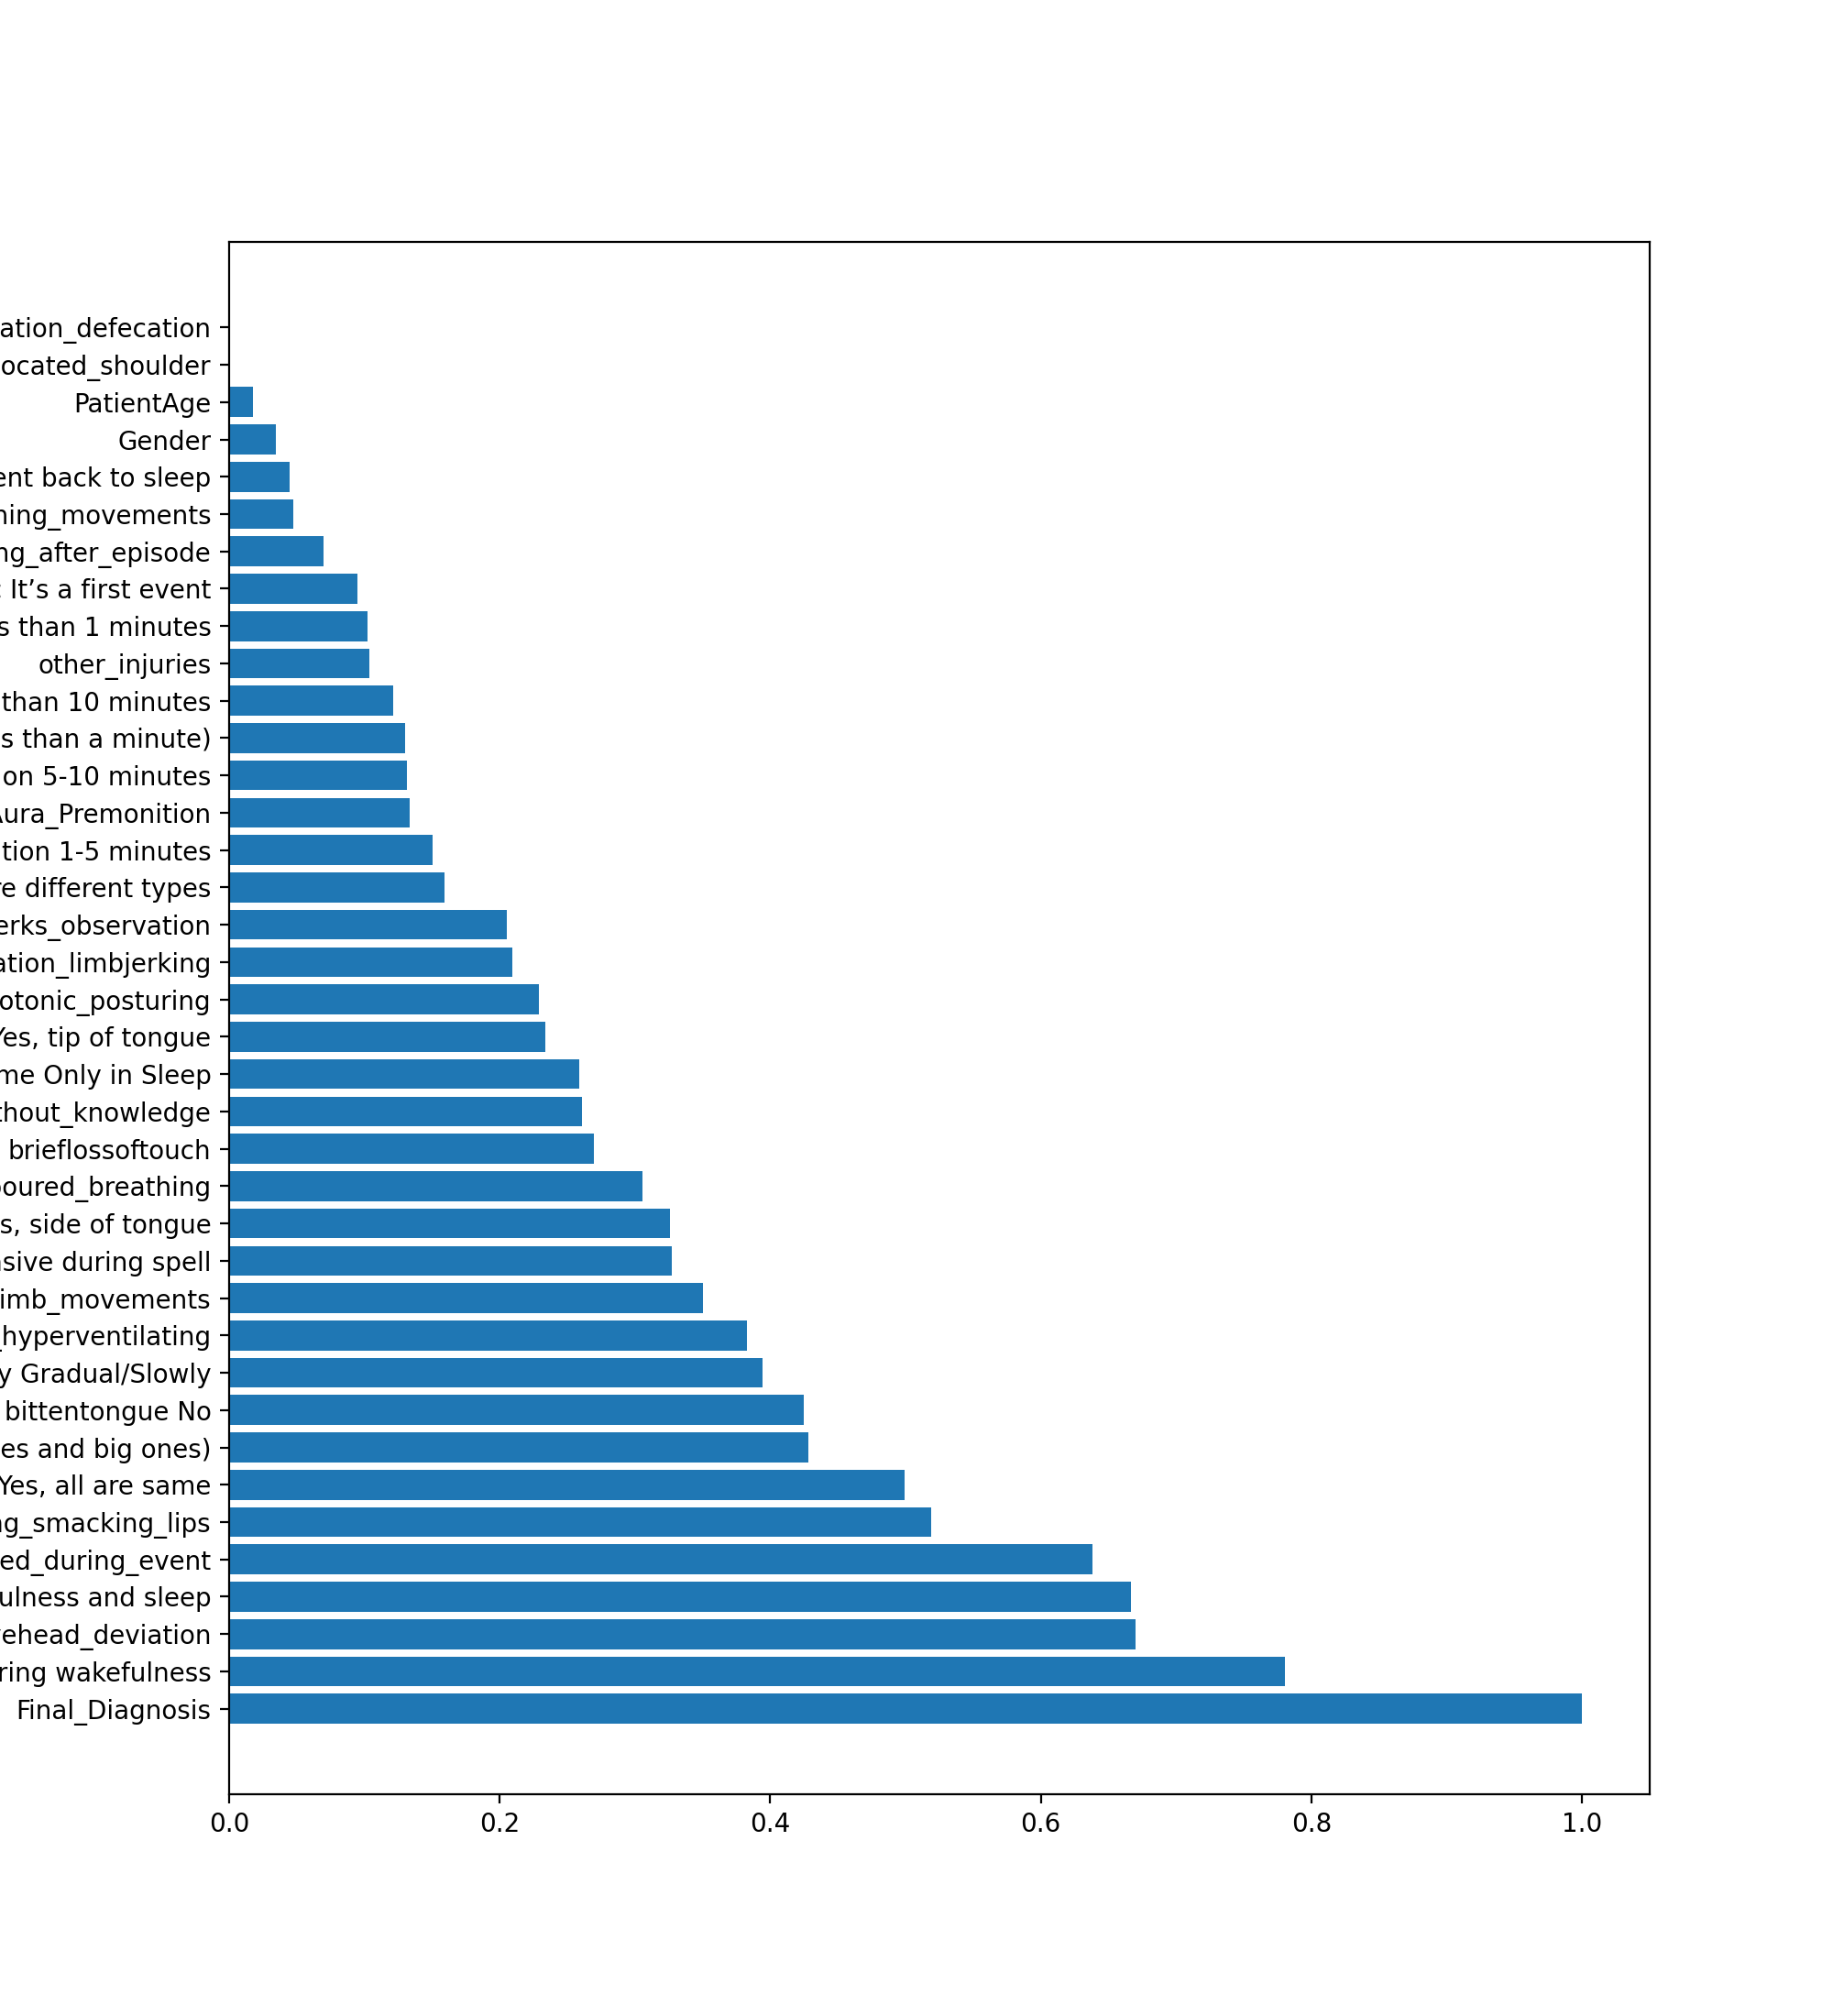

In [53]:
feature = cor_mp.keys()

print(feature)

plt.barh([feature[i] for i in range(len(feature))], cor_mp)
plt.rcParams['figure.figsize'] = [10, 11]
plt.show()

In [54]:
compare_original_smote = dict()

for k in correlations['original'].keys():
  compare_original_smote[k] = [correlations['original'][k]]

for k in correlations['smote'].keys():
  compare_original_smote[k].append(correlations['smote'][k])


In [55]:
# ask if age is relevant

In [56]:
less_correlation = []

for k in correlations['smote'].keys():
  if correlations['smote'][k] < 0.05:
    less_correlation.append(k)

print(less_correlation)

['PatientAge', 'Gender', 'loss_consciousness_after_urination_defecation', 'violent_thrashing_movements', 'dislocated_shoulder', 'recovery Didn’t recover went back to sleep']


In [ ]:
# x_corr = x_train_smote.copy()
# x_corr['Final_Diagnosis'] = y_train_smote

# complete_correlation= associations(x_corr, filename= 'complete_correlation.png', figsize=(50,20))
# correlations['smote'] =(complete_correlation['corr']["Final_Diagnosis"].abs())

<Axes: title={'center': 'patient_fall_suddenly_without_limb_movements'}>

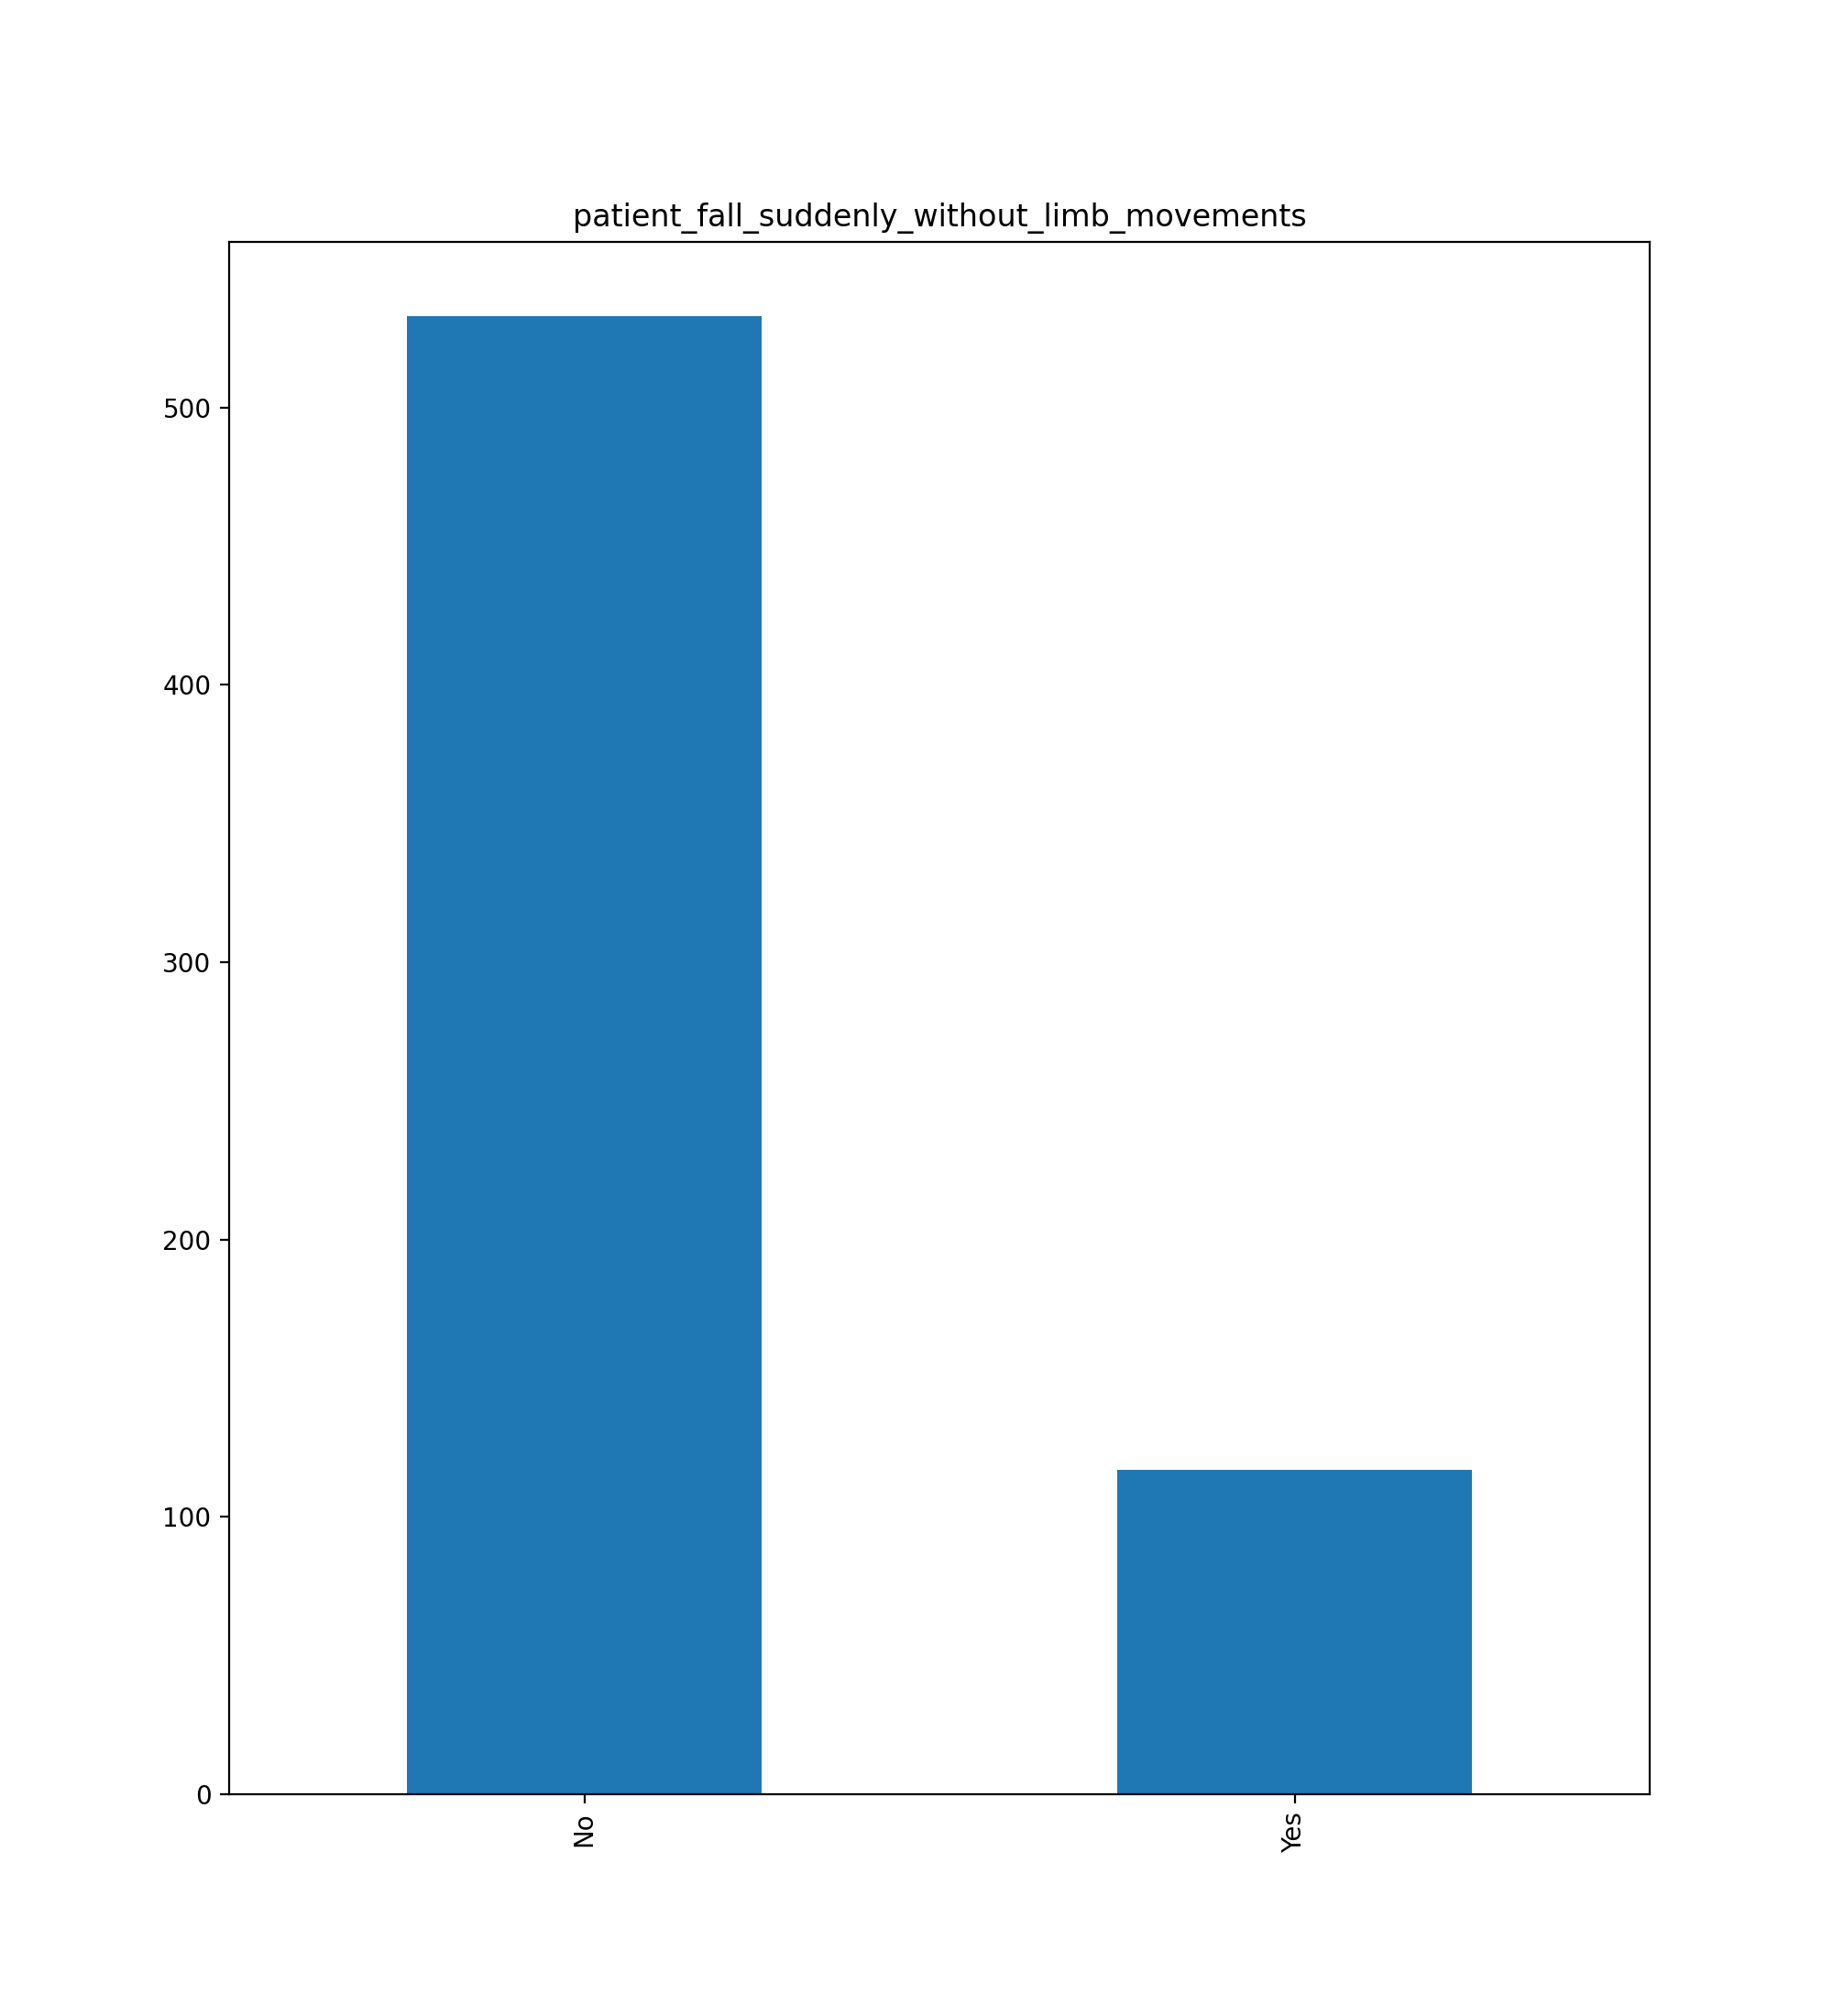

In [57]:
x_corr['patient_fall_suddenly_without_limb_movements'].value_counts().plot(kind='bar',title="patient_fall_suddenly_without_limb_movements")


<Axes: title={'center': 'weeping_before_during_after_episode'}>

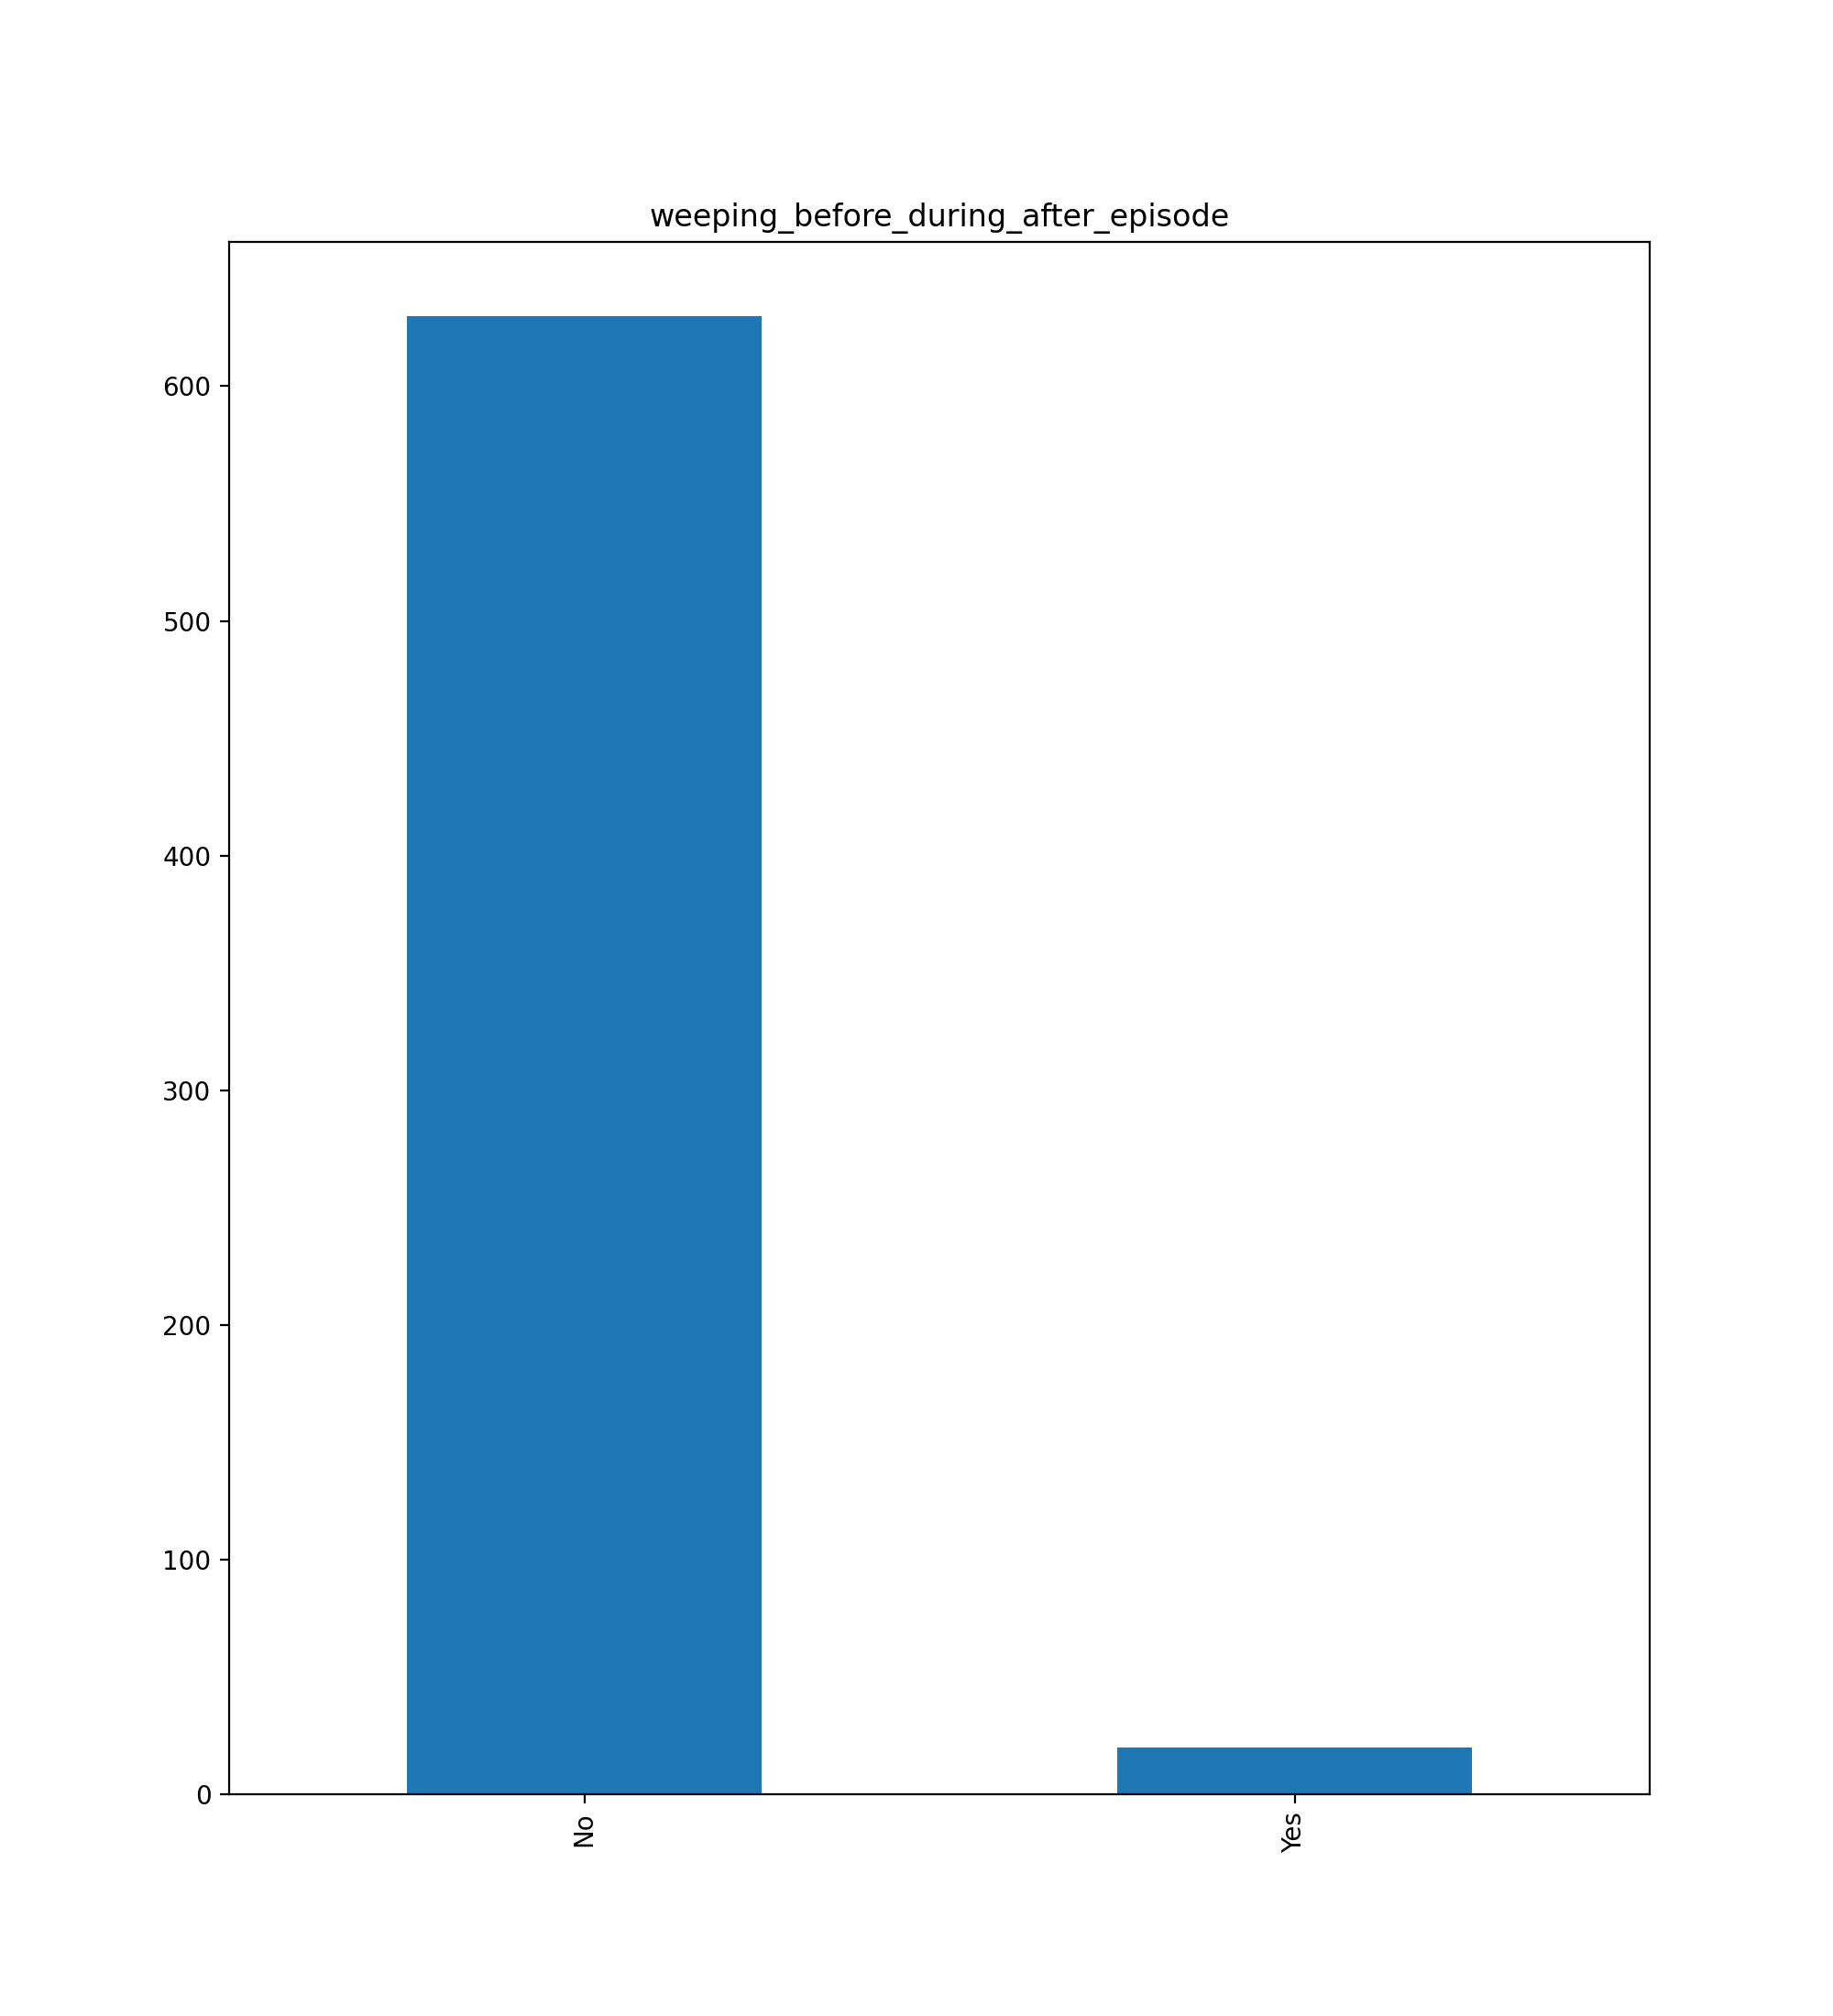

In [58]:
x_corr['weeping_before_during_after_episode'].value_counts().plot(kind='bar',title="weeping_before_during_after_episode")


In [ ]:
#x_corr['wandering_headbanging_observation'].value_counts().plot(kind='bar',title="wandering movements or headbanging observation",color = "#4CAF50")


<Axes: title={'center': 'eyes closed during occurance of event'}>

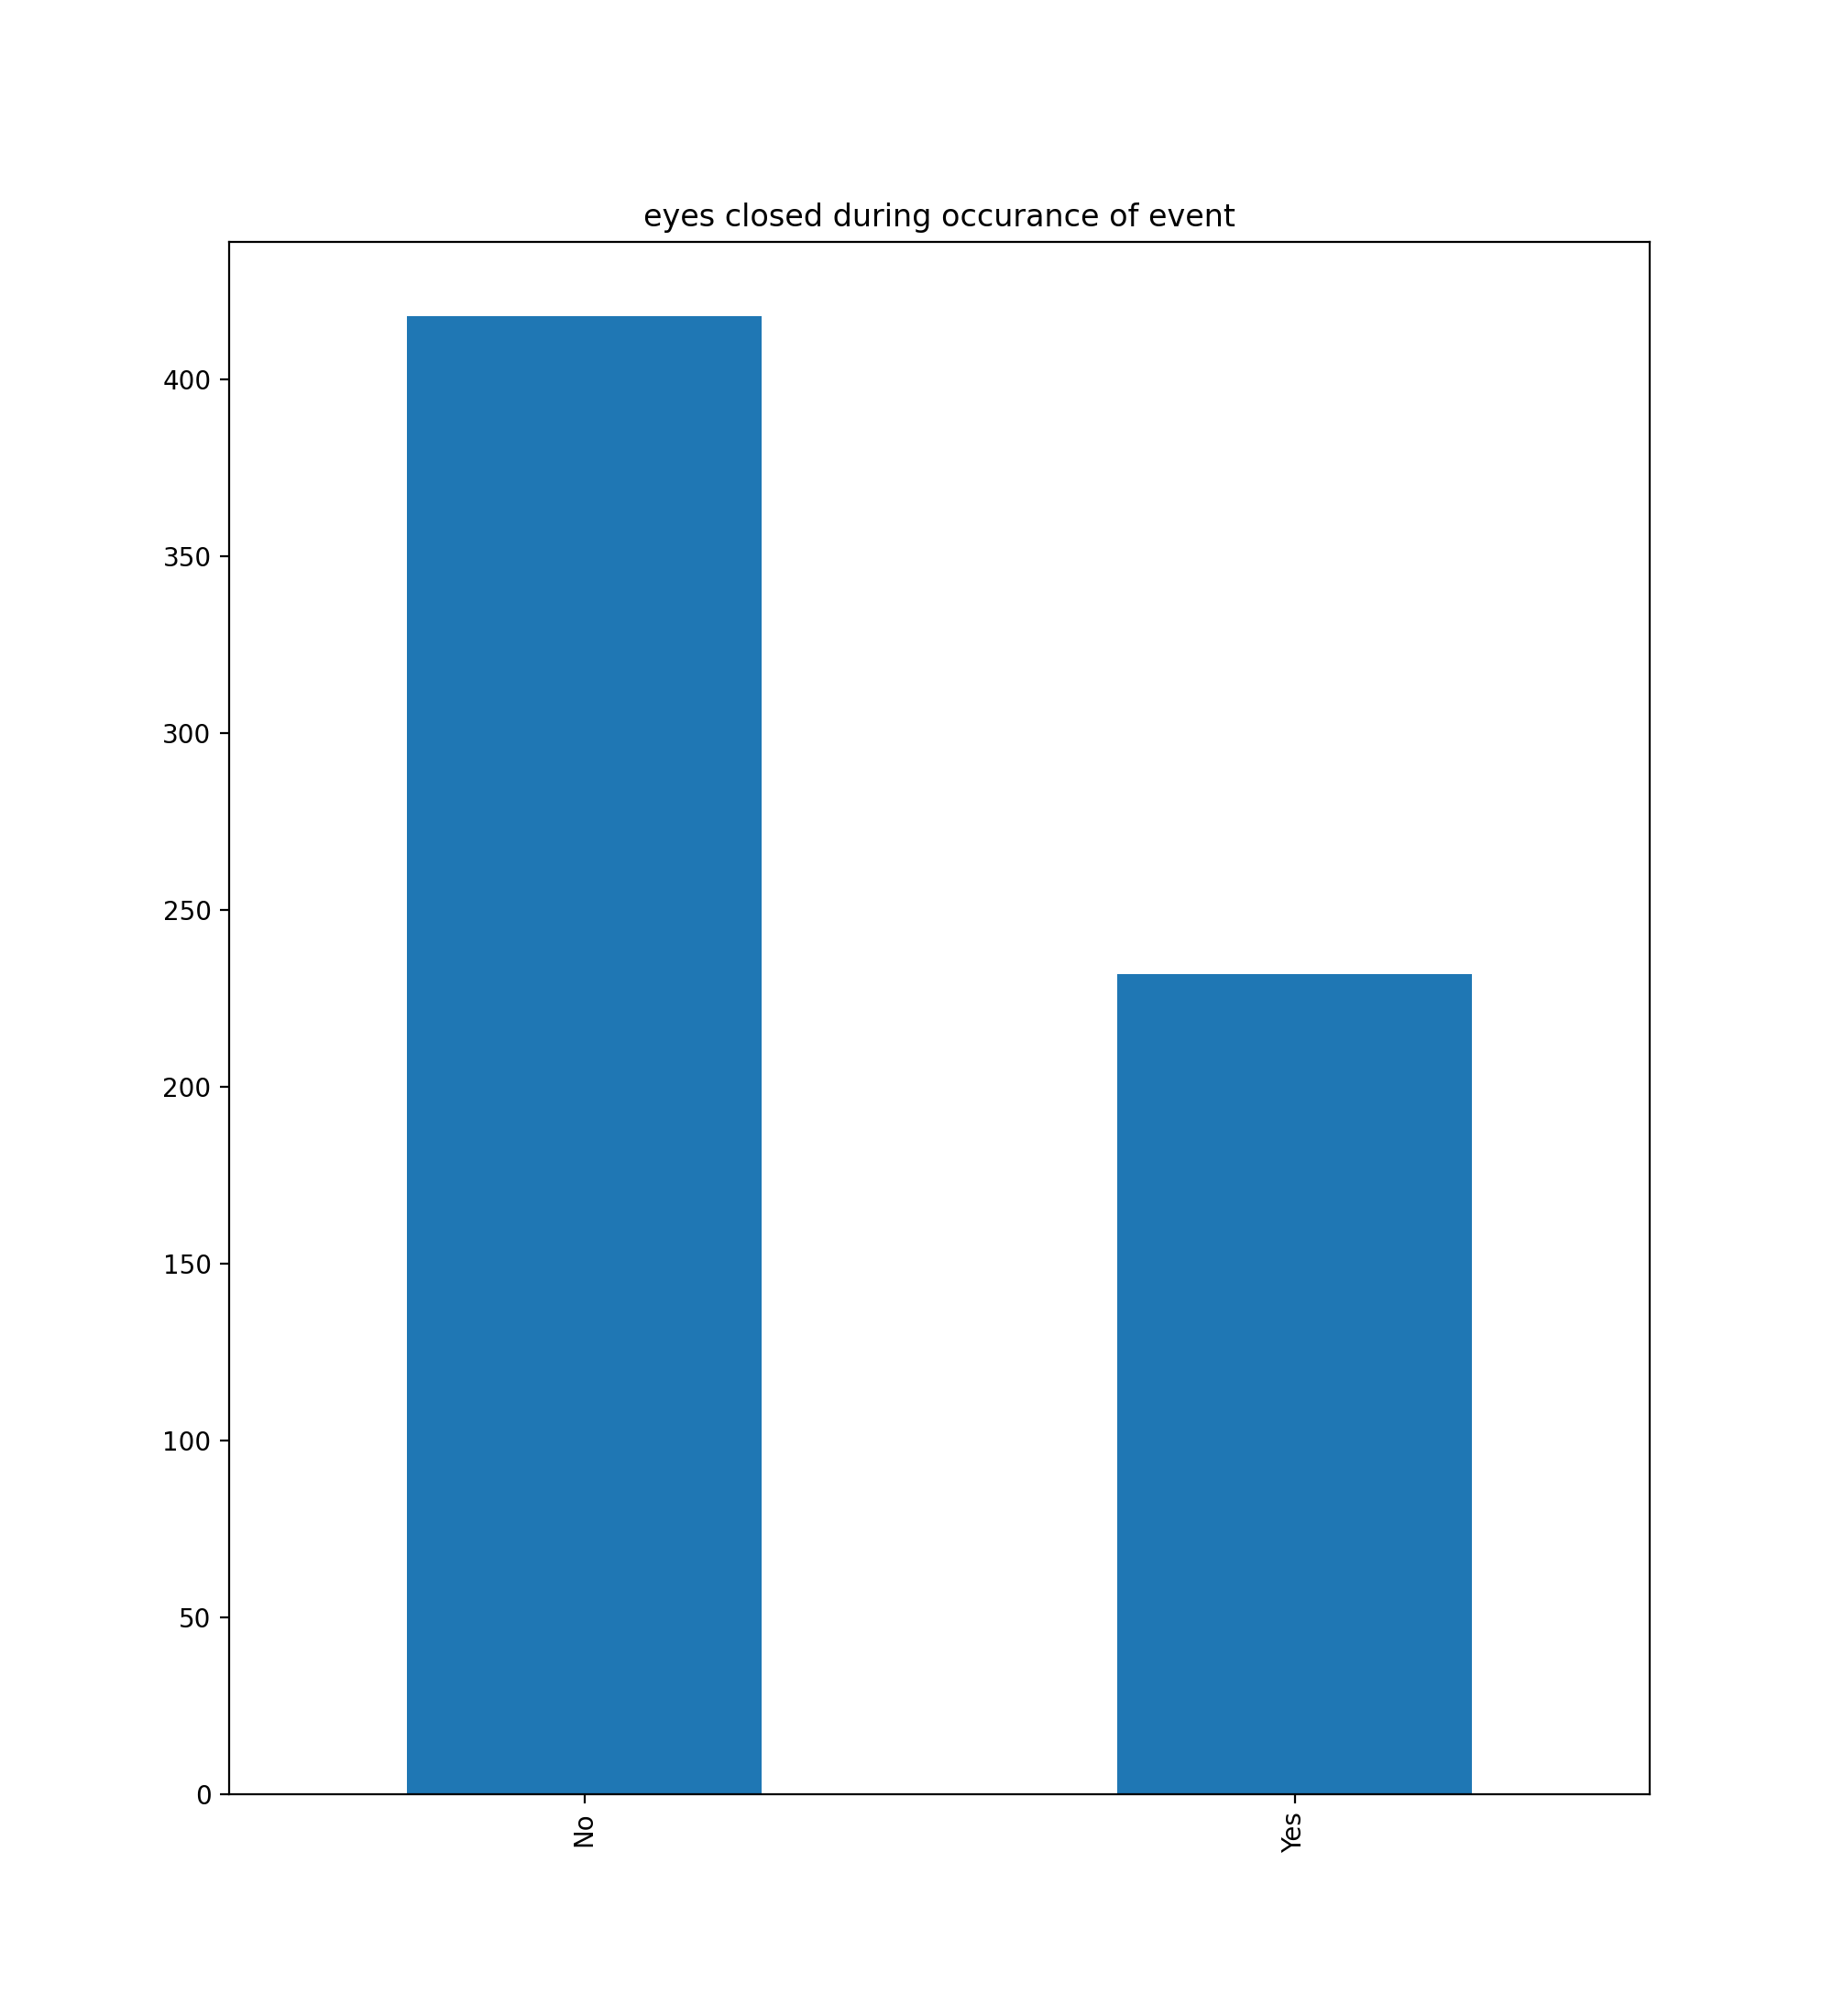

In [59]:
x_corr['eyes_closed_during_event'].value_counts().plot(kind='bar',title="eyes closed during occurance of event")


<Axes: title={'center': 'bitter tongue status of the patients'}>

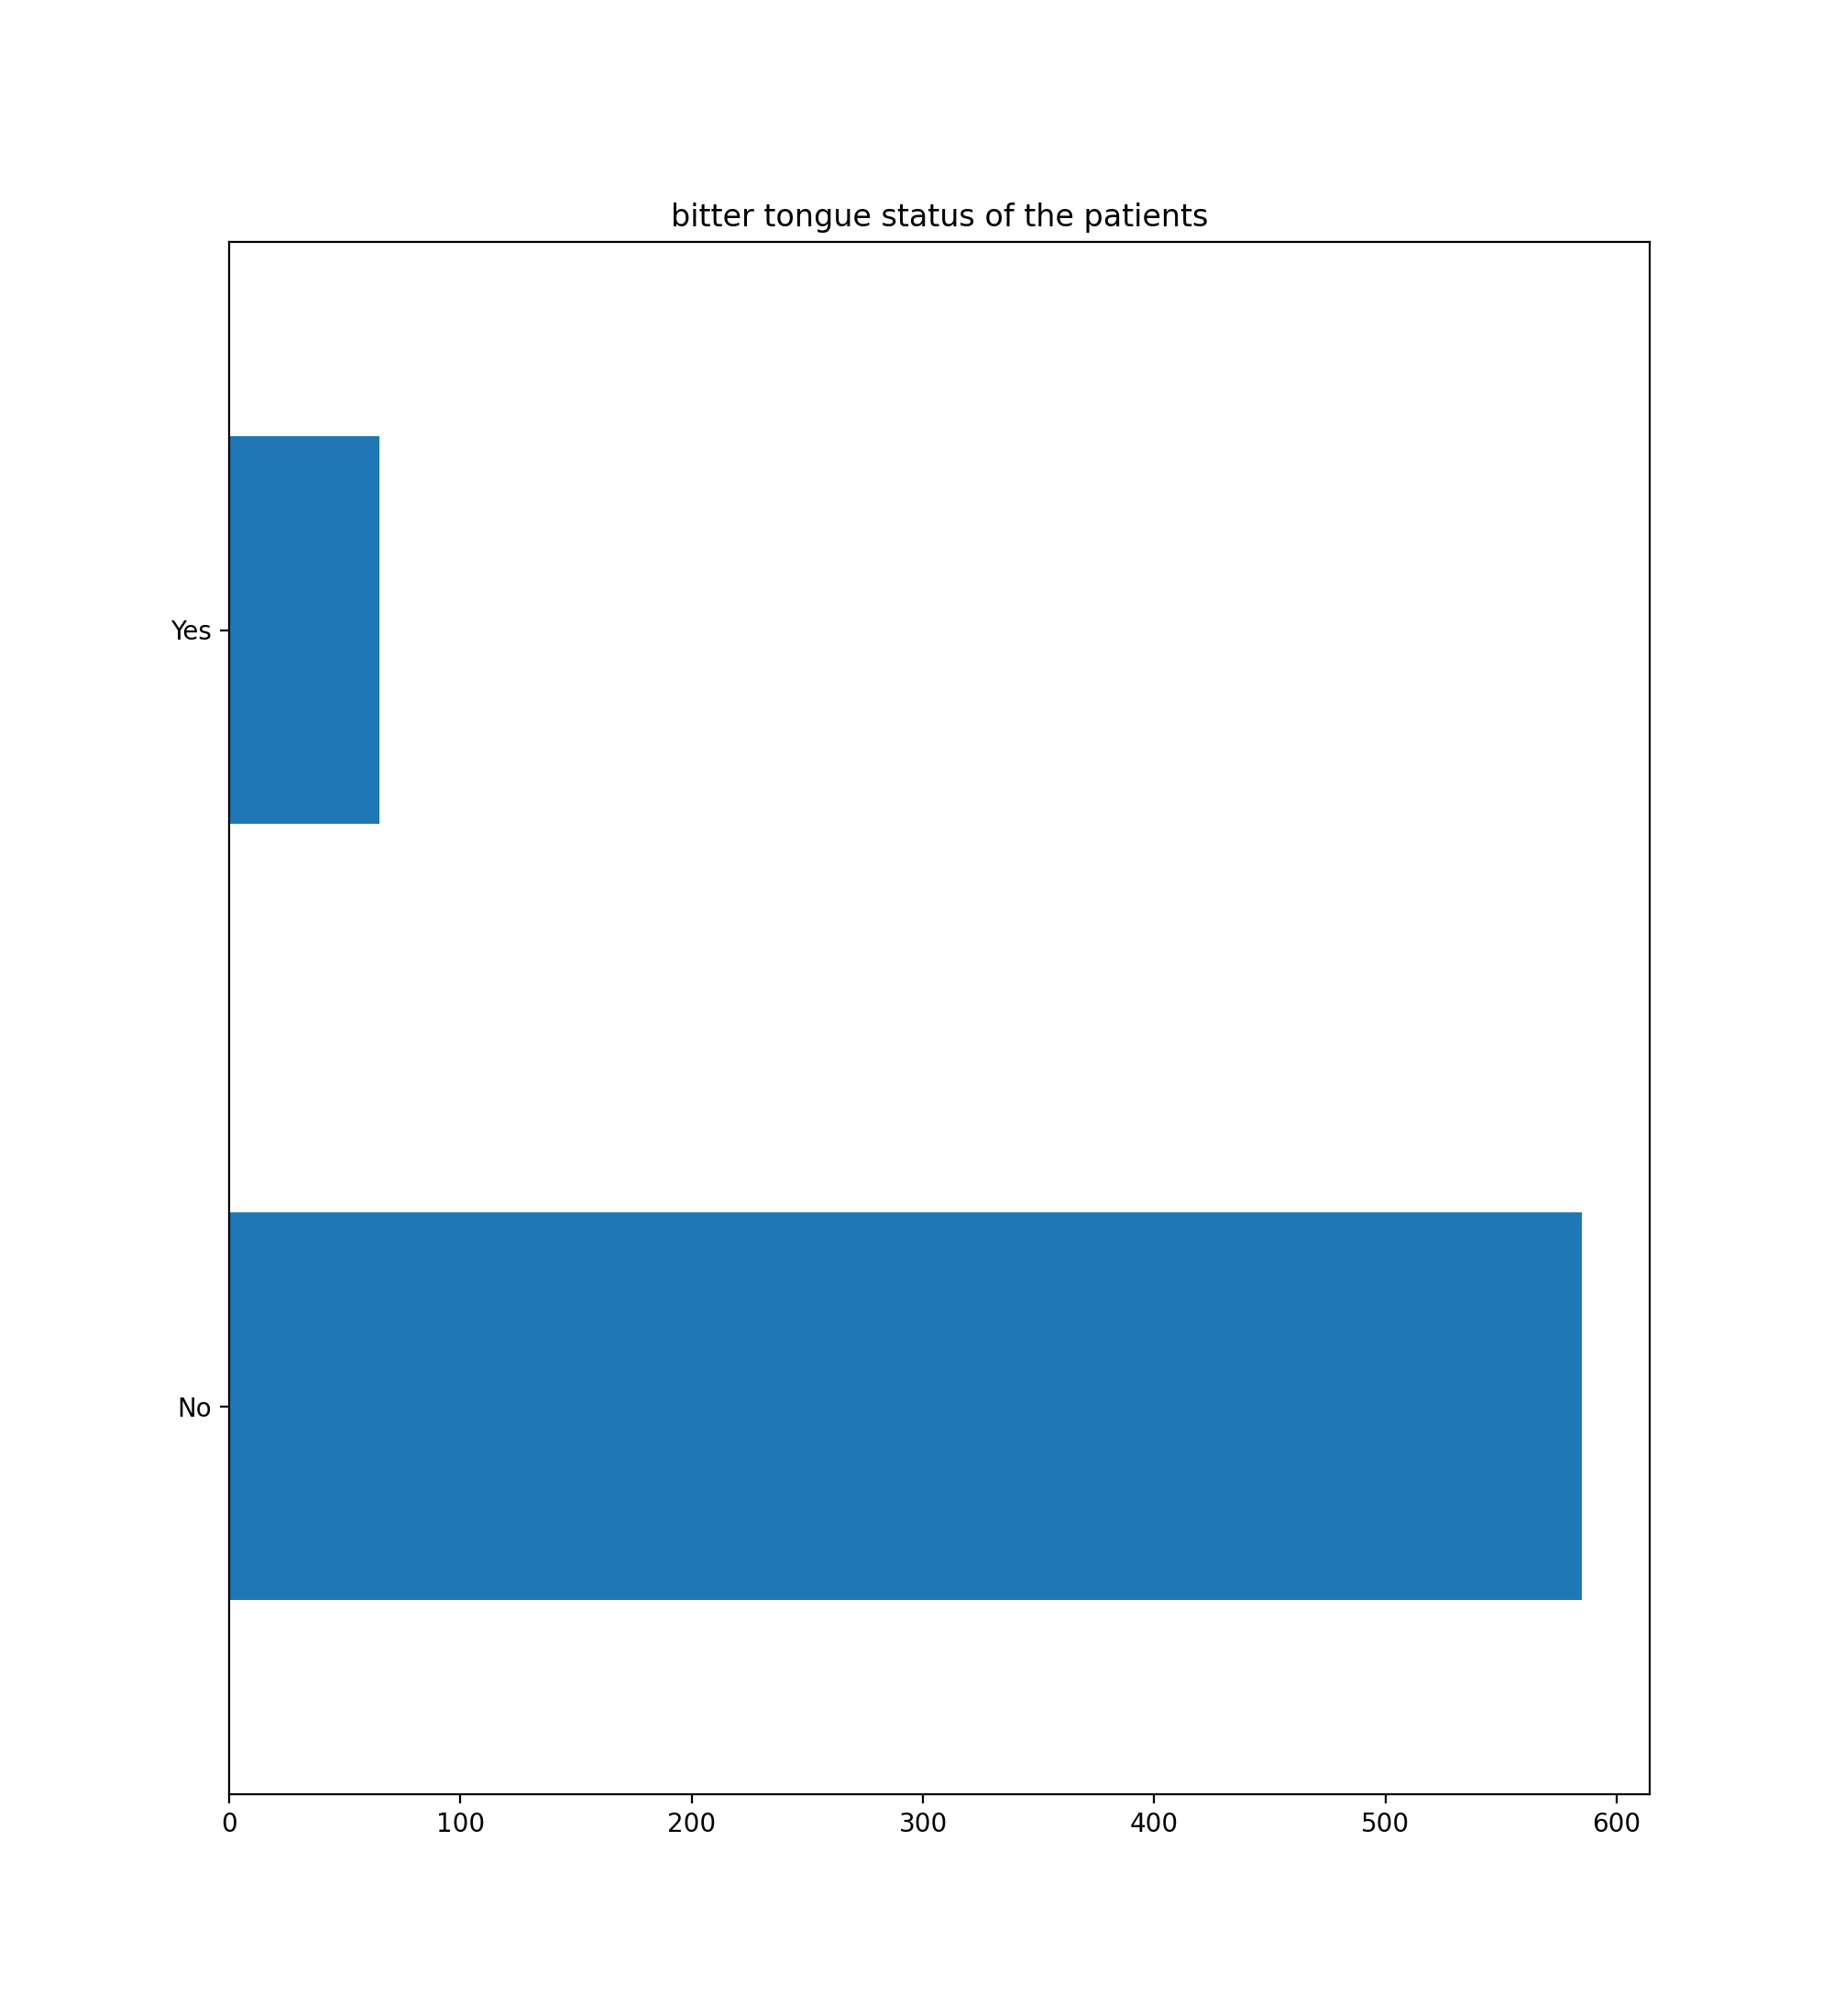

In [60]:
x_corr['bittentongue Yes, side of tongue'].value_counts().plot(kind='barh',title="bitter tongue status of the patients")


<Axes: title={'center': 'Recovery of the patients'}>

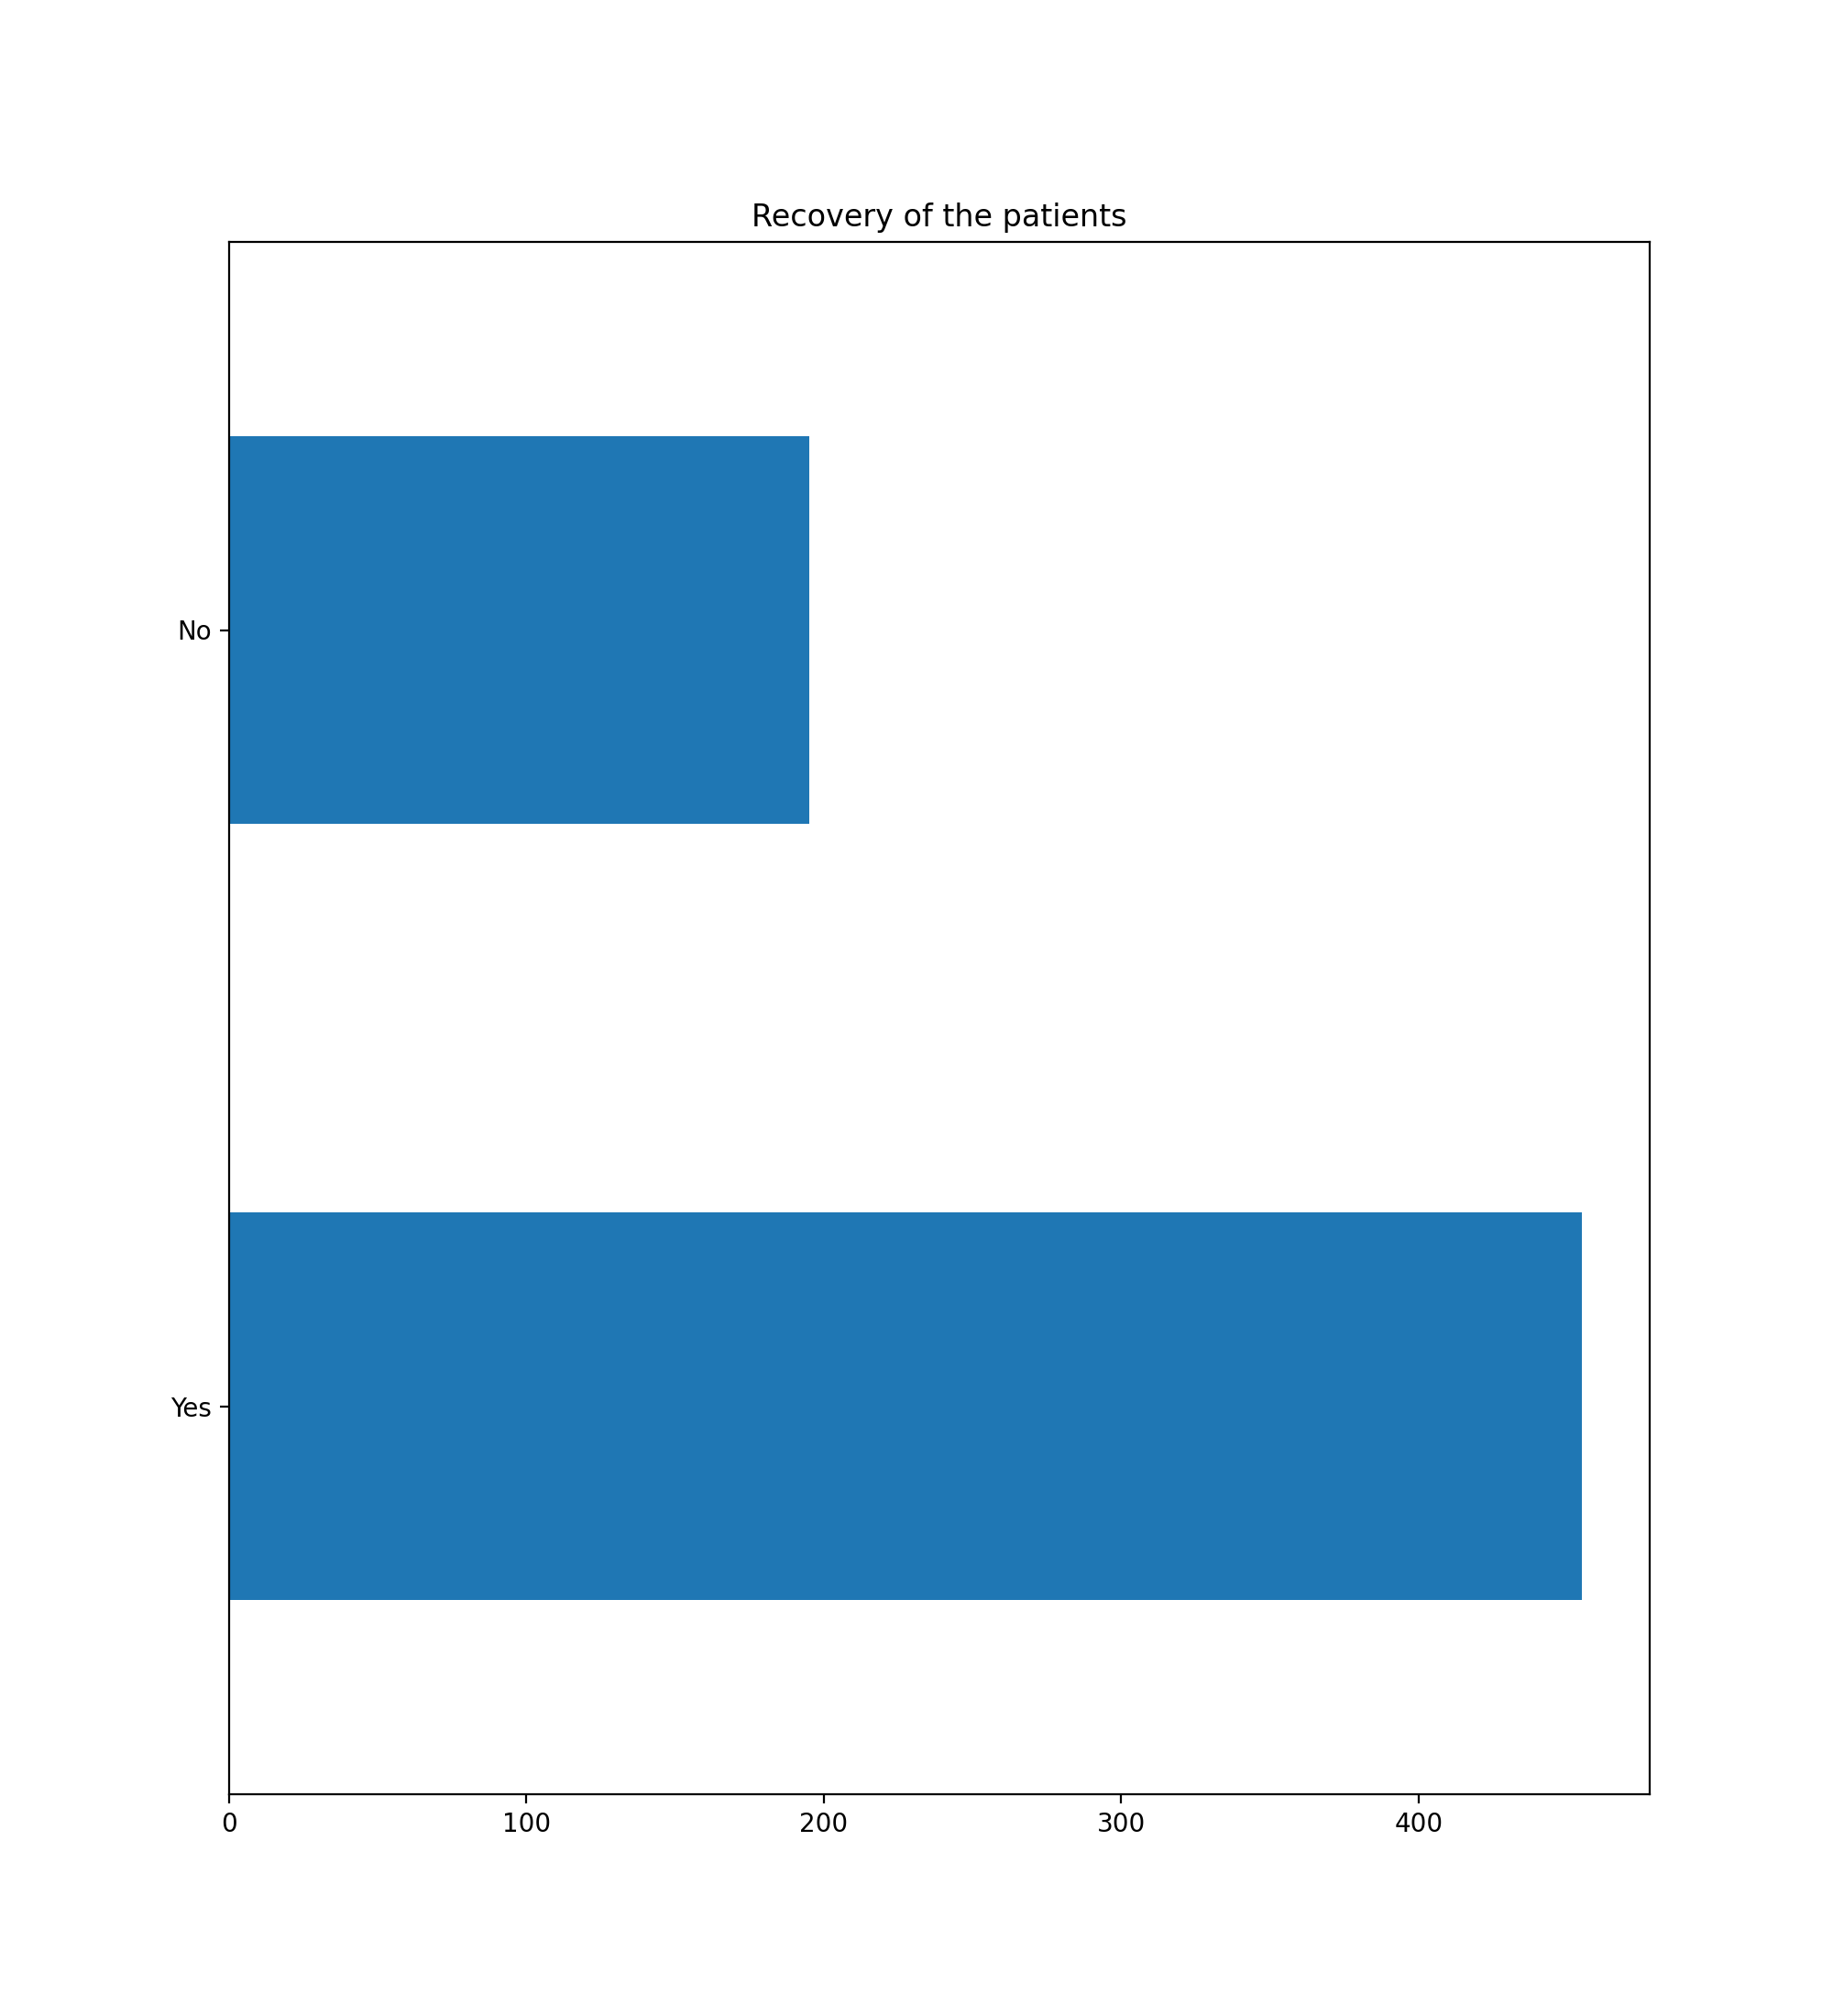

In [61]:
x_corr['recovery Gradual/Slowly'].value_counts().plot(kind='barh',title="Recovery of the patients")

<Axes: title={'center': 'Final Diagnosis'}>

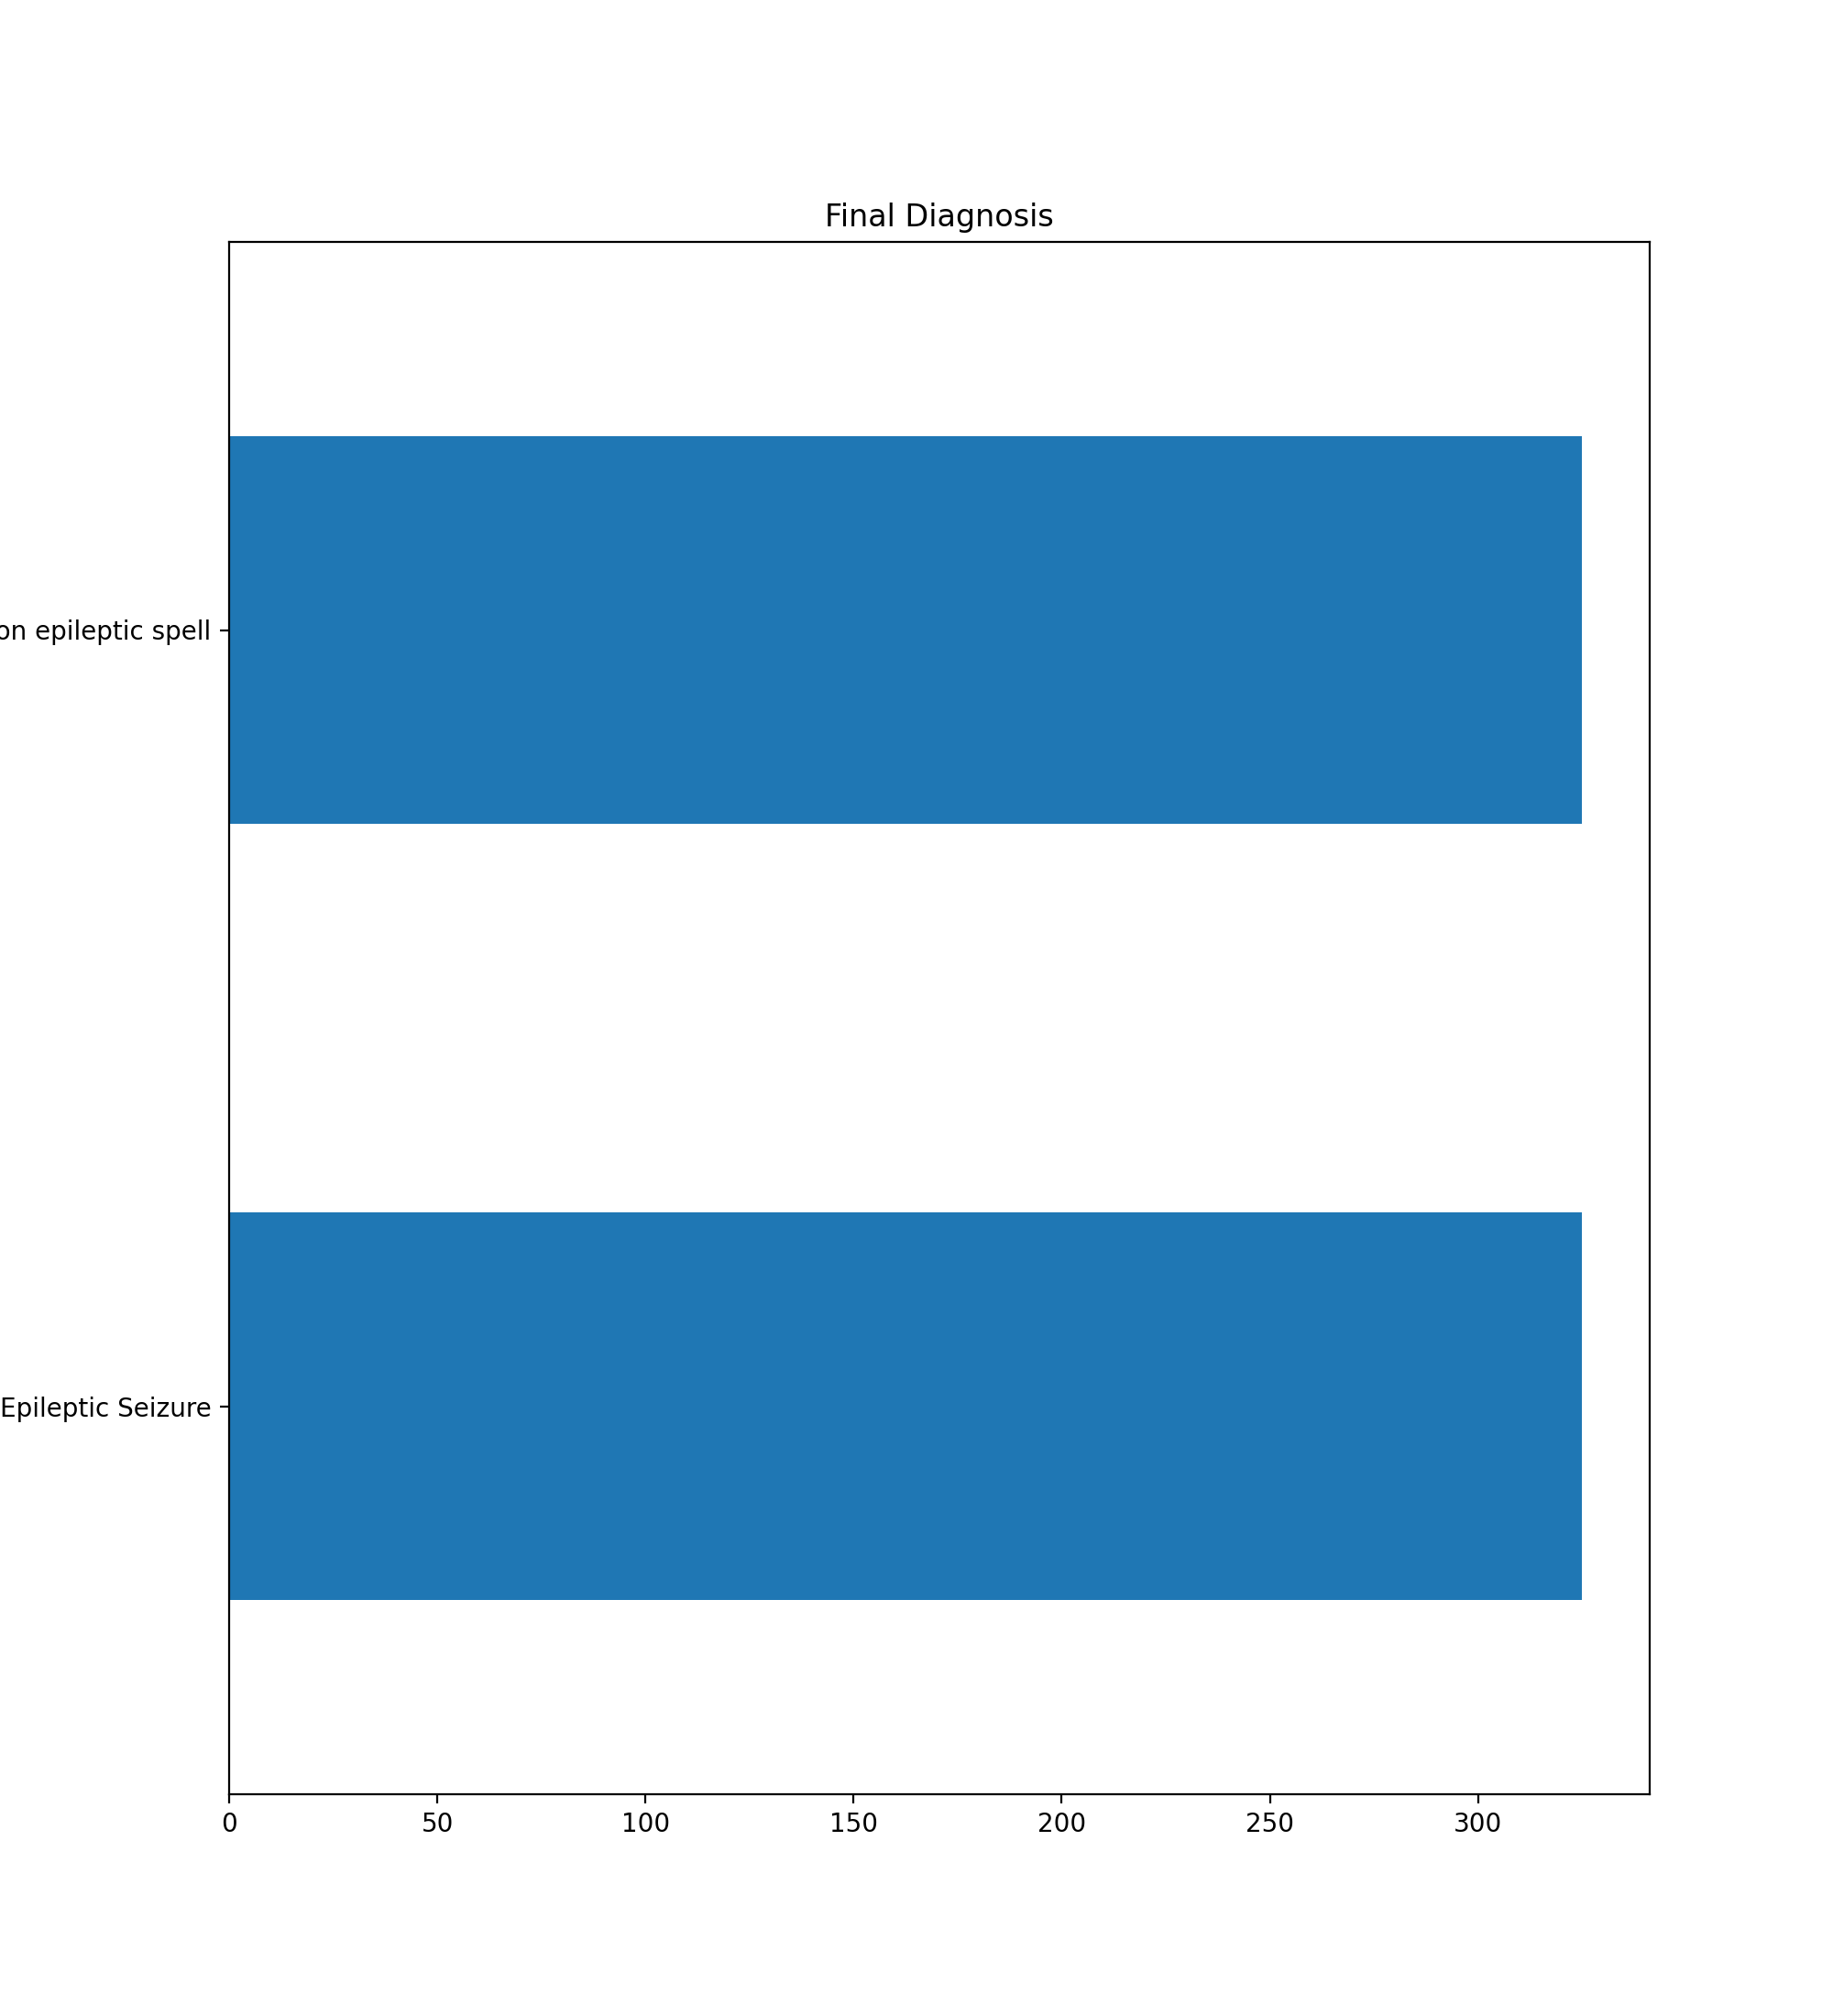

In [62]:
x_corr['Final_Diagnosis'].value_counts().plot(kind='barh',title="Final Diagnosis")

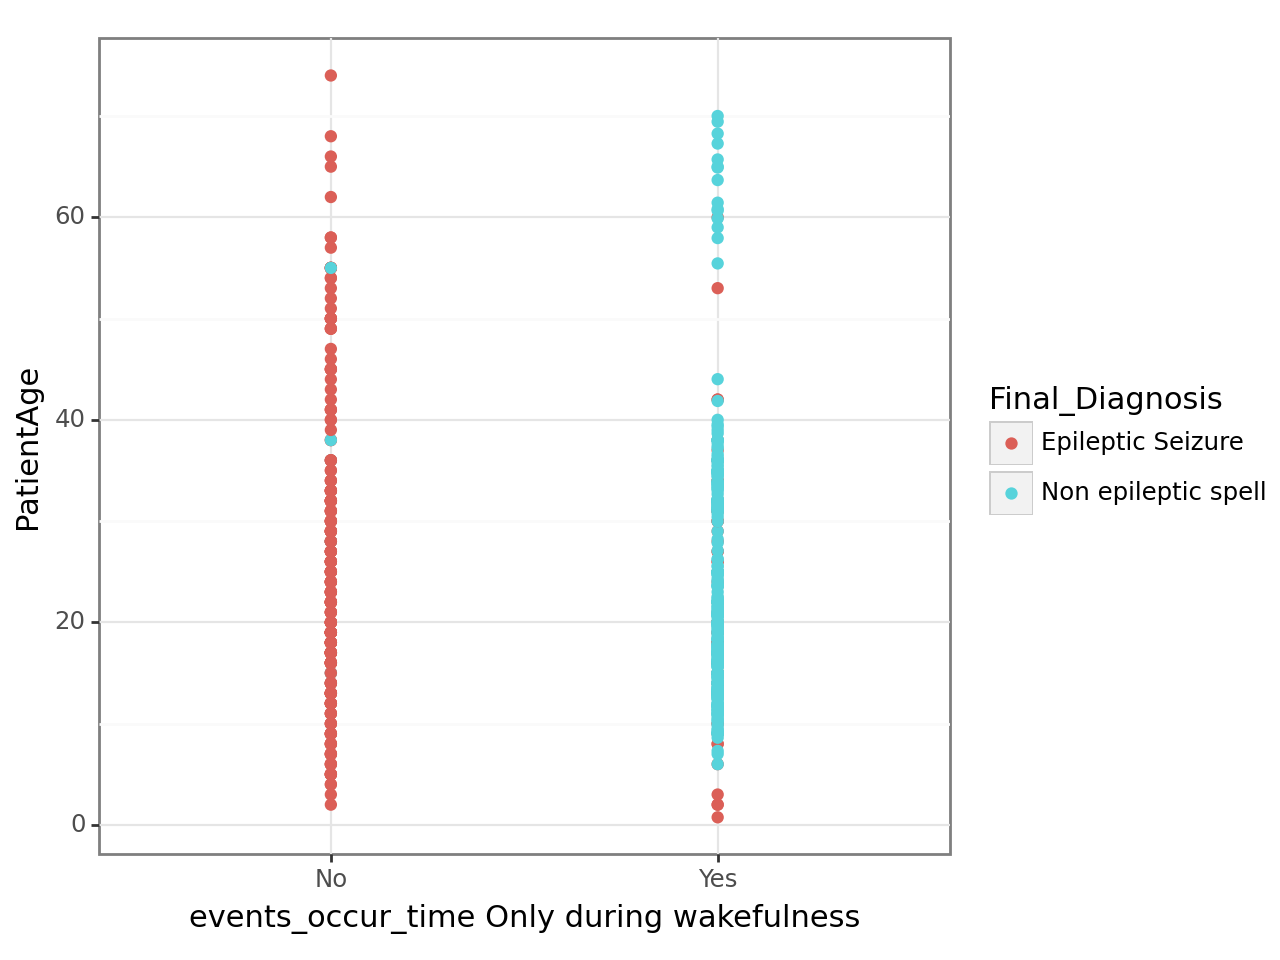

In [63]:
print(
    p9.ggplot(x_corr, p9.aes(x='events_occur_time Only during wakefulness', y='PatientAge')) +
    p9.geom_point(p9.aes(color='Final_Diagnosis')) +
    p9.theme_bw())

In [64]:
#mapping xtraining data
import string

numeric_col=['PatientAge']

numeric_mappings = {}
columns = list(x_train)

#print(columns)
for c in numeric_col:
  if c in columns:
    columns.remove(c)

for col in columns:
  rowval=set()
  for j in x_train[col]:
    rowval.add(j)

  enumval=[k for k in range(len(rowval))]
  x_train[col].replace(list(rowval),enumval,inplace =True)
  x_train_smote[col].replace(list(rowval),enumval,inplace =True)
  x_test[col].replace(list(rowval),enumval,inplace =True)

  ind = 0
  for rowvals in rowval:
    numeric_mappings[rowvals] = enumval[ind]
    ind+=1



In [65]:
x_train_smote

PatientAge  Gender  eyes_closed_during_event  \
0     24.000000       1                         1   
1     21.000000       0                         1   
2     27.000000       0                         1   
3      5.000000       1                         1   
4     54.000000       1                         1   
..          ...     ...                       ...   
645   15.065012       0                         0   
646   25.497780       1                         0   
647   33.716058       0                         0   
648   36.012949       1                         0   
649   39.548147       0                         1   

     weeping_before_during_after_episode  \
0                                      1   
1                                      0   
2                                      1   
3                                      1   
4                                      1   
..                                   ...   
645                                    1   
646                                    1   
647                                    1   
648                                    1   
649                                    1   

     patient_fall_suddenly_without_limb_movements  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   
..                                            ...   
645                                             0   
646                                             1   
647                                             1   
648                                             1   
649                                             1   

     Was_patient_hyperventilating  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   
..                            ...   
645                             0   
646                             1   
647                             1   
648                             1   
649                             1   

     loss_consciousness_after_urination_defecation  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                1   
..                                             ...   
645                                              1   
646                                              1   
647                                              1   
648                                              1   
649                                              1   

     side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                                    1                   
1                                                    1                   
2                                                    1                   
3                                                    1                   
4                                                    1                   
..                                                 ...                   
645                                                  1                   
646                                                  1                   
647                                                  0                   
648                                                  1                   
649                                                  1                   

     observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                          1                                                0   
1                          1                             

In [66]:
#numeric mapping y column
# mapping to numerical value
numeric_mappings = {}

for col in y_train:
  rowval=set()
  for j in y_train:
    rowval.add(j)

  enumval=[k for k in range(len(rowval))]
  ind = 0
  for rowvals in rowval:
    numeric_mappings[rowvals] = enumval[ind]
    ind+=1
  y_train = [numeric_mappings[v] for v in y_train]
  y_train_smote = [numeric_mappings[v] for v in y_train_smote]
  y_test = [numeric_mappings[v] for v in y_test]


In [ ]:
# accuracy_dict={
#     'Random Forest':list(),
#     'Logistic Regression':list(),
#     'SVC':list(),
#     'Decision Tree':list(),
#     'KNN':list()}

In [67]:
x_test_df = x_test.copy()
# x_test_df['Final_Diagnosis'] = y_train
x_test_df.to_excel("/content/Testing_data.xlsx")

In [68]:
x_train_df = x_train_smote.copy()
#x_train_df['Final_Diagnosis'] = y_train
x_train_df.to_excel("/content/Training data.xlsx")

In [ ]:
#xgb after balanced
# plot feature importance using built-in function
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot

# model = XGBClassifier()
# model.fit(x_train_smote, y_train_smote)
# # plot feature importance
# correlations['fscore']=model.feature_importances_
# plot_importance(model)
# pyplot.rcParams['figure.figsize'] = [10, 10]
# pyplot.show()

In [ ]:
# xbg before balacing
# model = XGBClassifier()
# model.fit(x_train, y_train)

# correlations['fscore']=model.feature_importances_
# plot_importance(model)
# pyplot.rcParams['figure.figsize'] = [10, 10]
# pyplot.show()

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train, y_train)


SelectKBest(k='all', score_func=<function chi2 at 0x7f1701058280>)

In [70]:
fs.scores_

array([1.98479845e-01, 2.42222071e+00, 2.11977998e+01, 9.53301883e-01,
       6.76737264e+00, 7.32427031e+00, 2.56523277e-02, 4.14393330e+00,
       3.04817436e+00, 2.17427401e+00, 5.00616223e-01, 1.04492929e+00,
       1.14409534e+00, 1.54733738e+01, 4.45660388e+01, 3.06385375e-02,
       1.20153846e+00, 1.38678223e-03, 5.60831050e-05, 6.29132651e-01,
       1.04363612e+00, 1.47588499e+01, 5.39875498e-03, 2.10850006e+01,
       7.91009714e+00, 5.63551725e-02, 2.34669556e-02, 4.22574059e+01,
       4.35491760e+01, 1.07404607e+00, 2.53522920e+00, 1.13645289e-03,
       5.60231481e+01, 3.58982347e+00, 2.78851964e+00, 7.27127710e-01,
       2.05662616e+01])

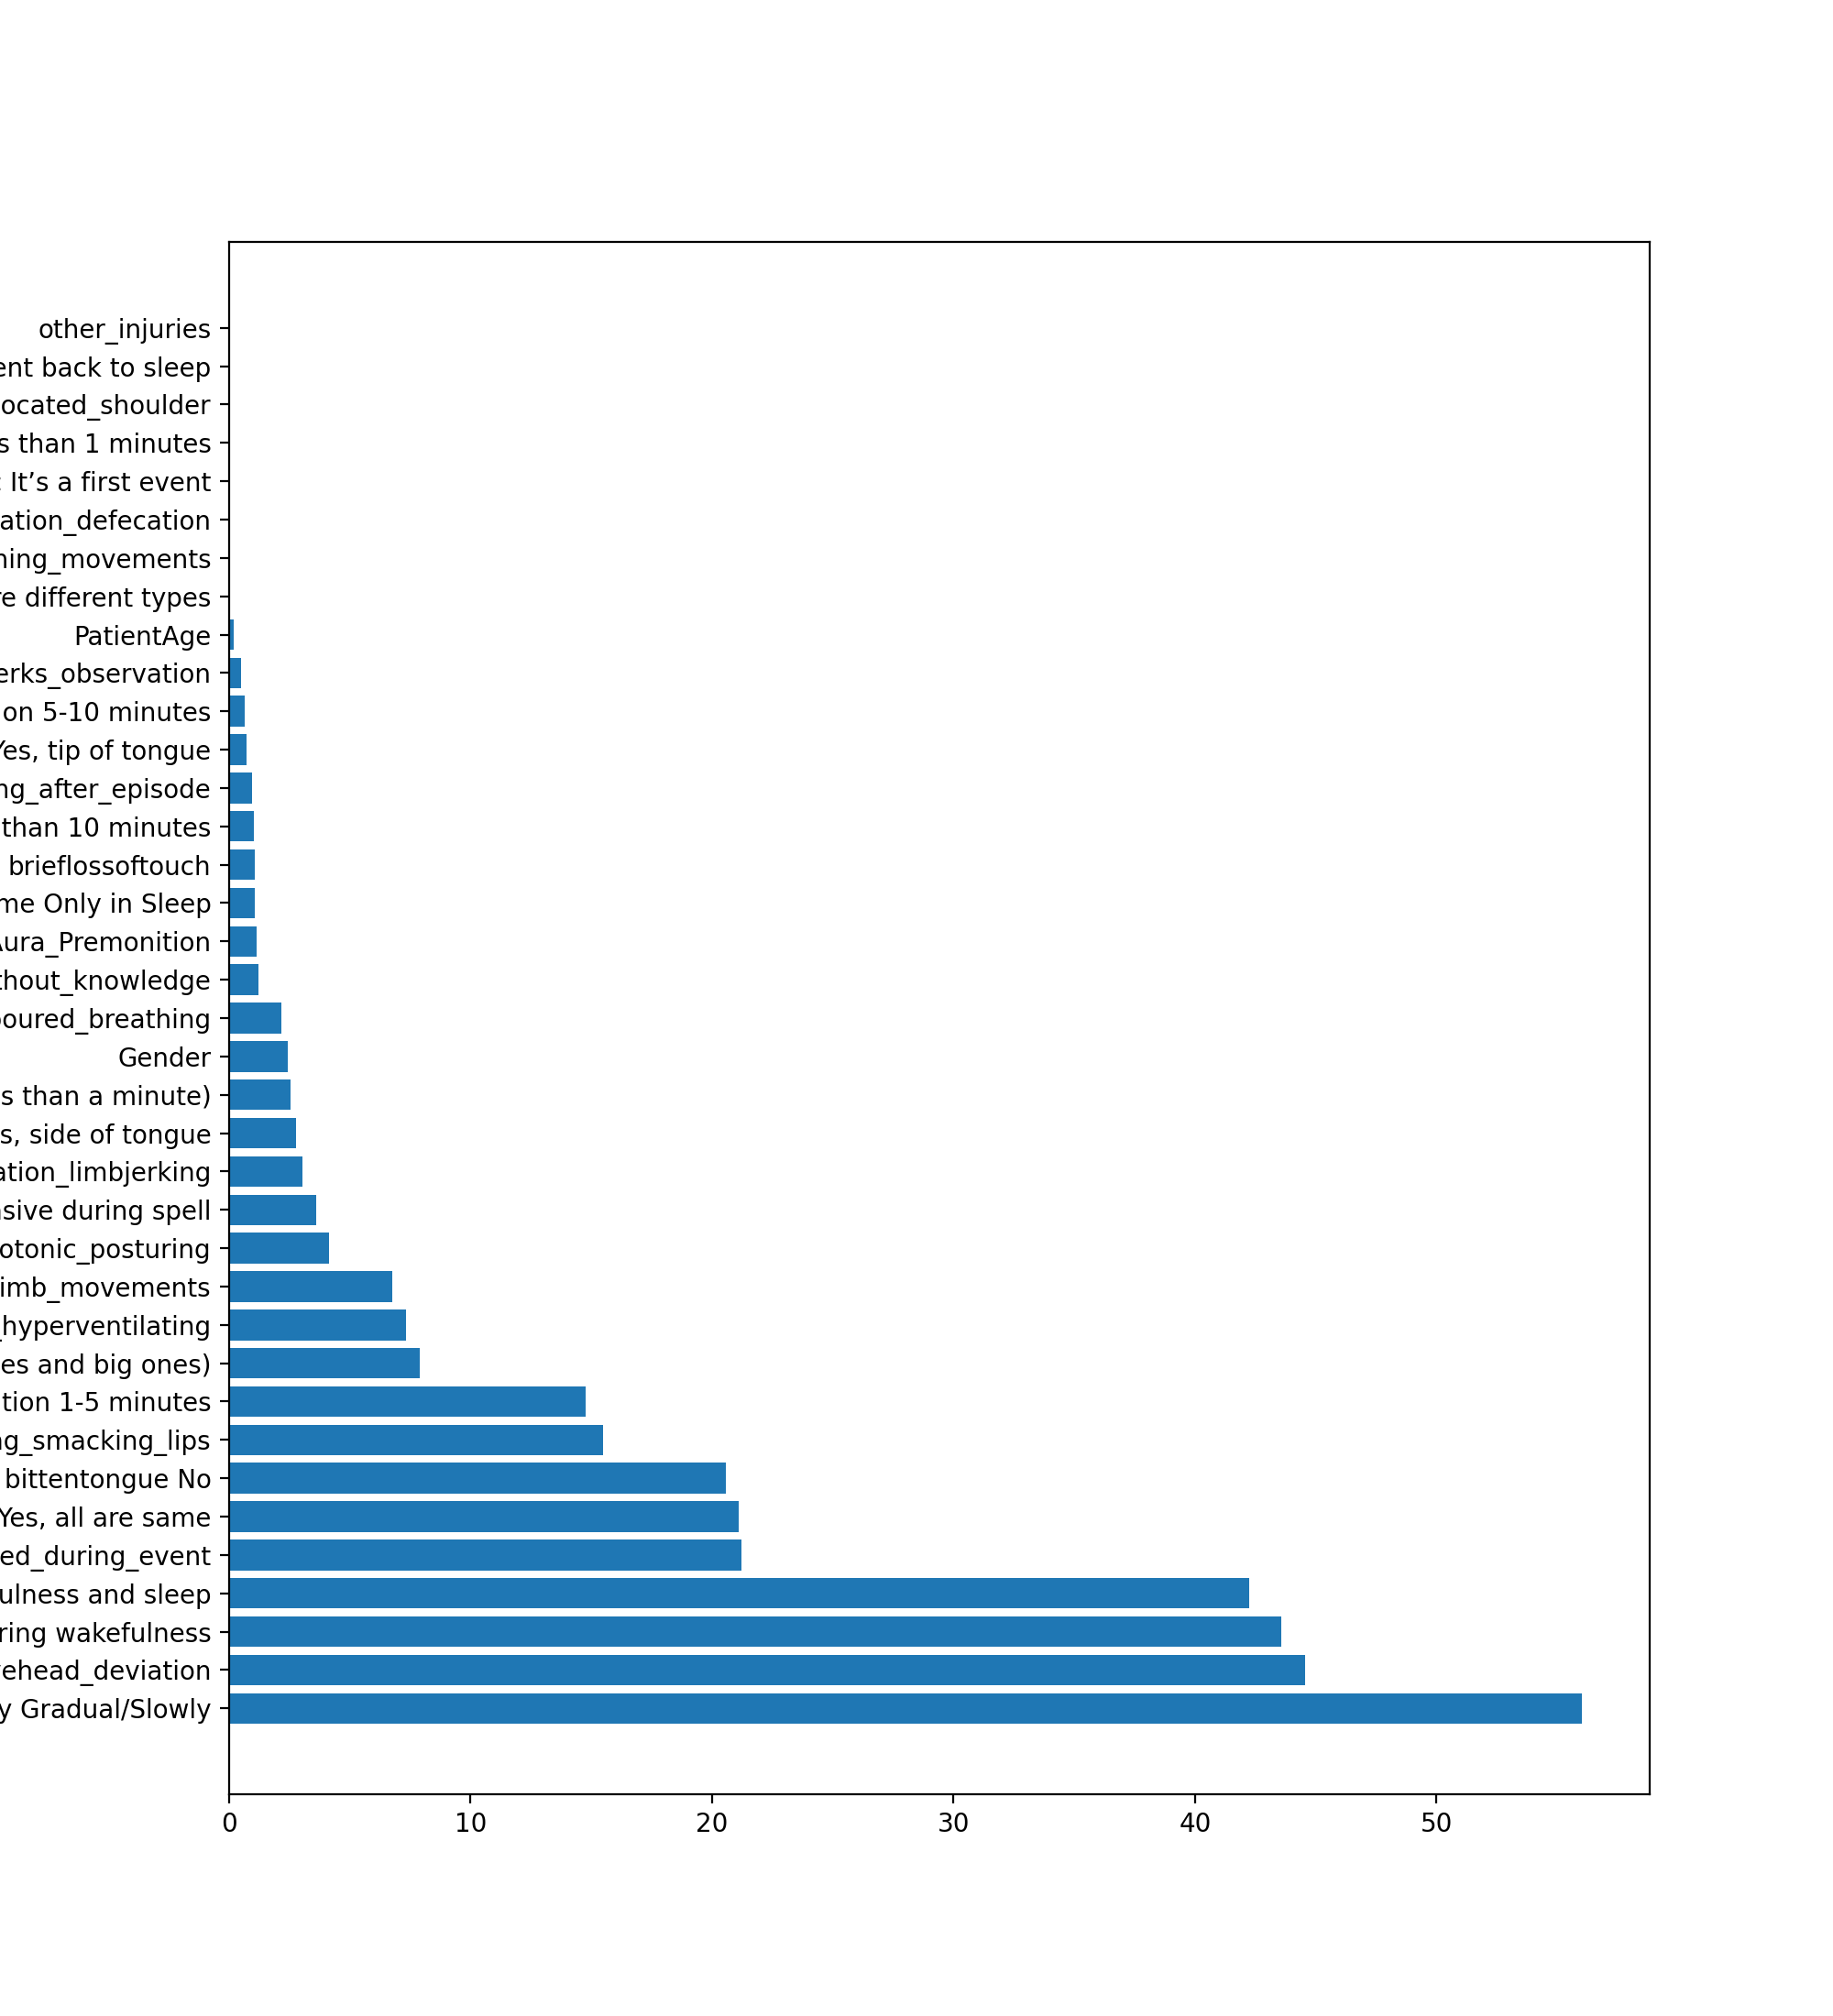

In [71]:
from matplotlib import pyplot
feature = []
for f in x_train.keys():
  feature.append(f)

f_mp = pd.Series()

for i in range(len(feature)):
  f_mp[feature[i]] = fs.scores_[i]

f_mp = f_mp.sort_values(ascending = False)

sc = []
feature = []

for k in f_mp.keys():
  feature.append(k)
  sc.append(f_mp[k])

pyplot.barh([feature[i] for i in range(len(fs.scores_))], sc)
pyplot.rcParams['figure.figsize'] = [10, 10]
pyplot.show()

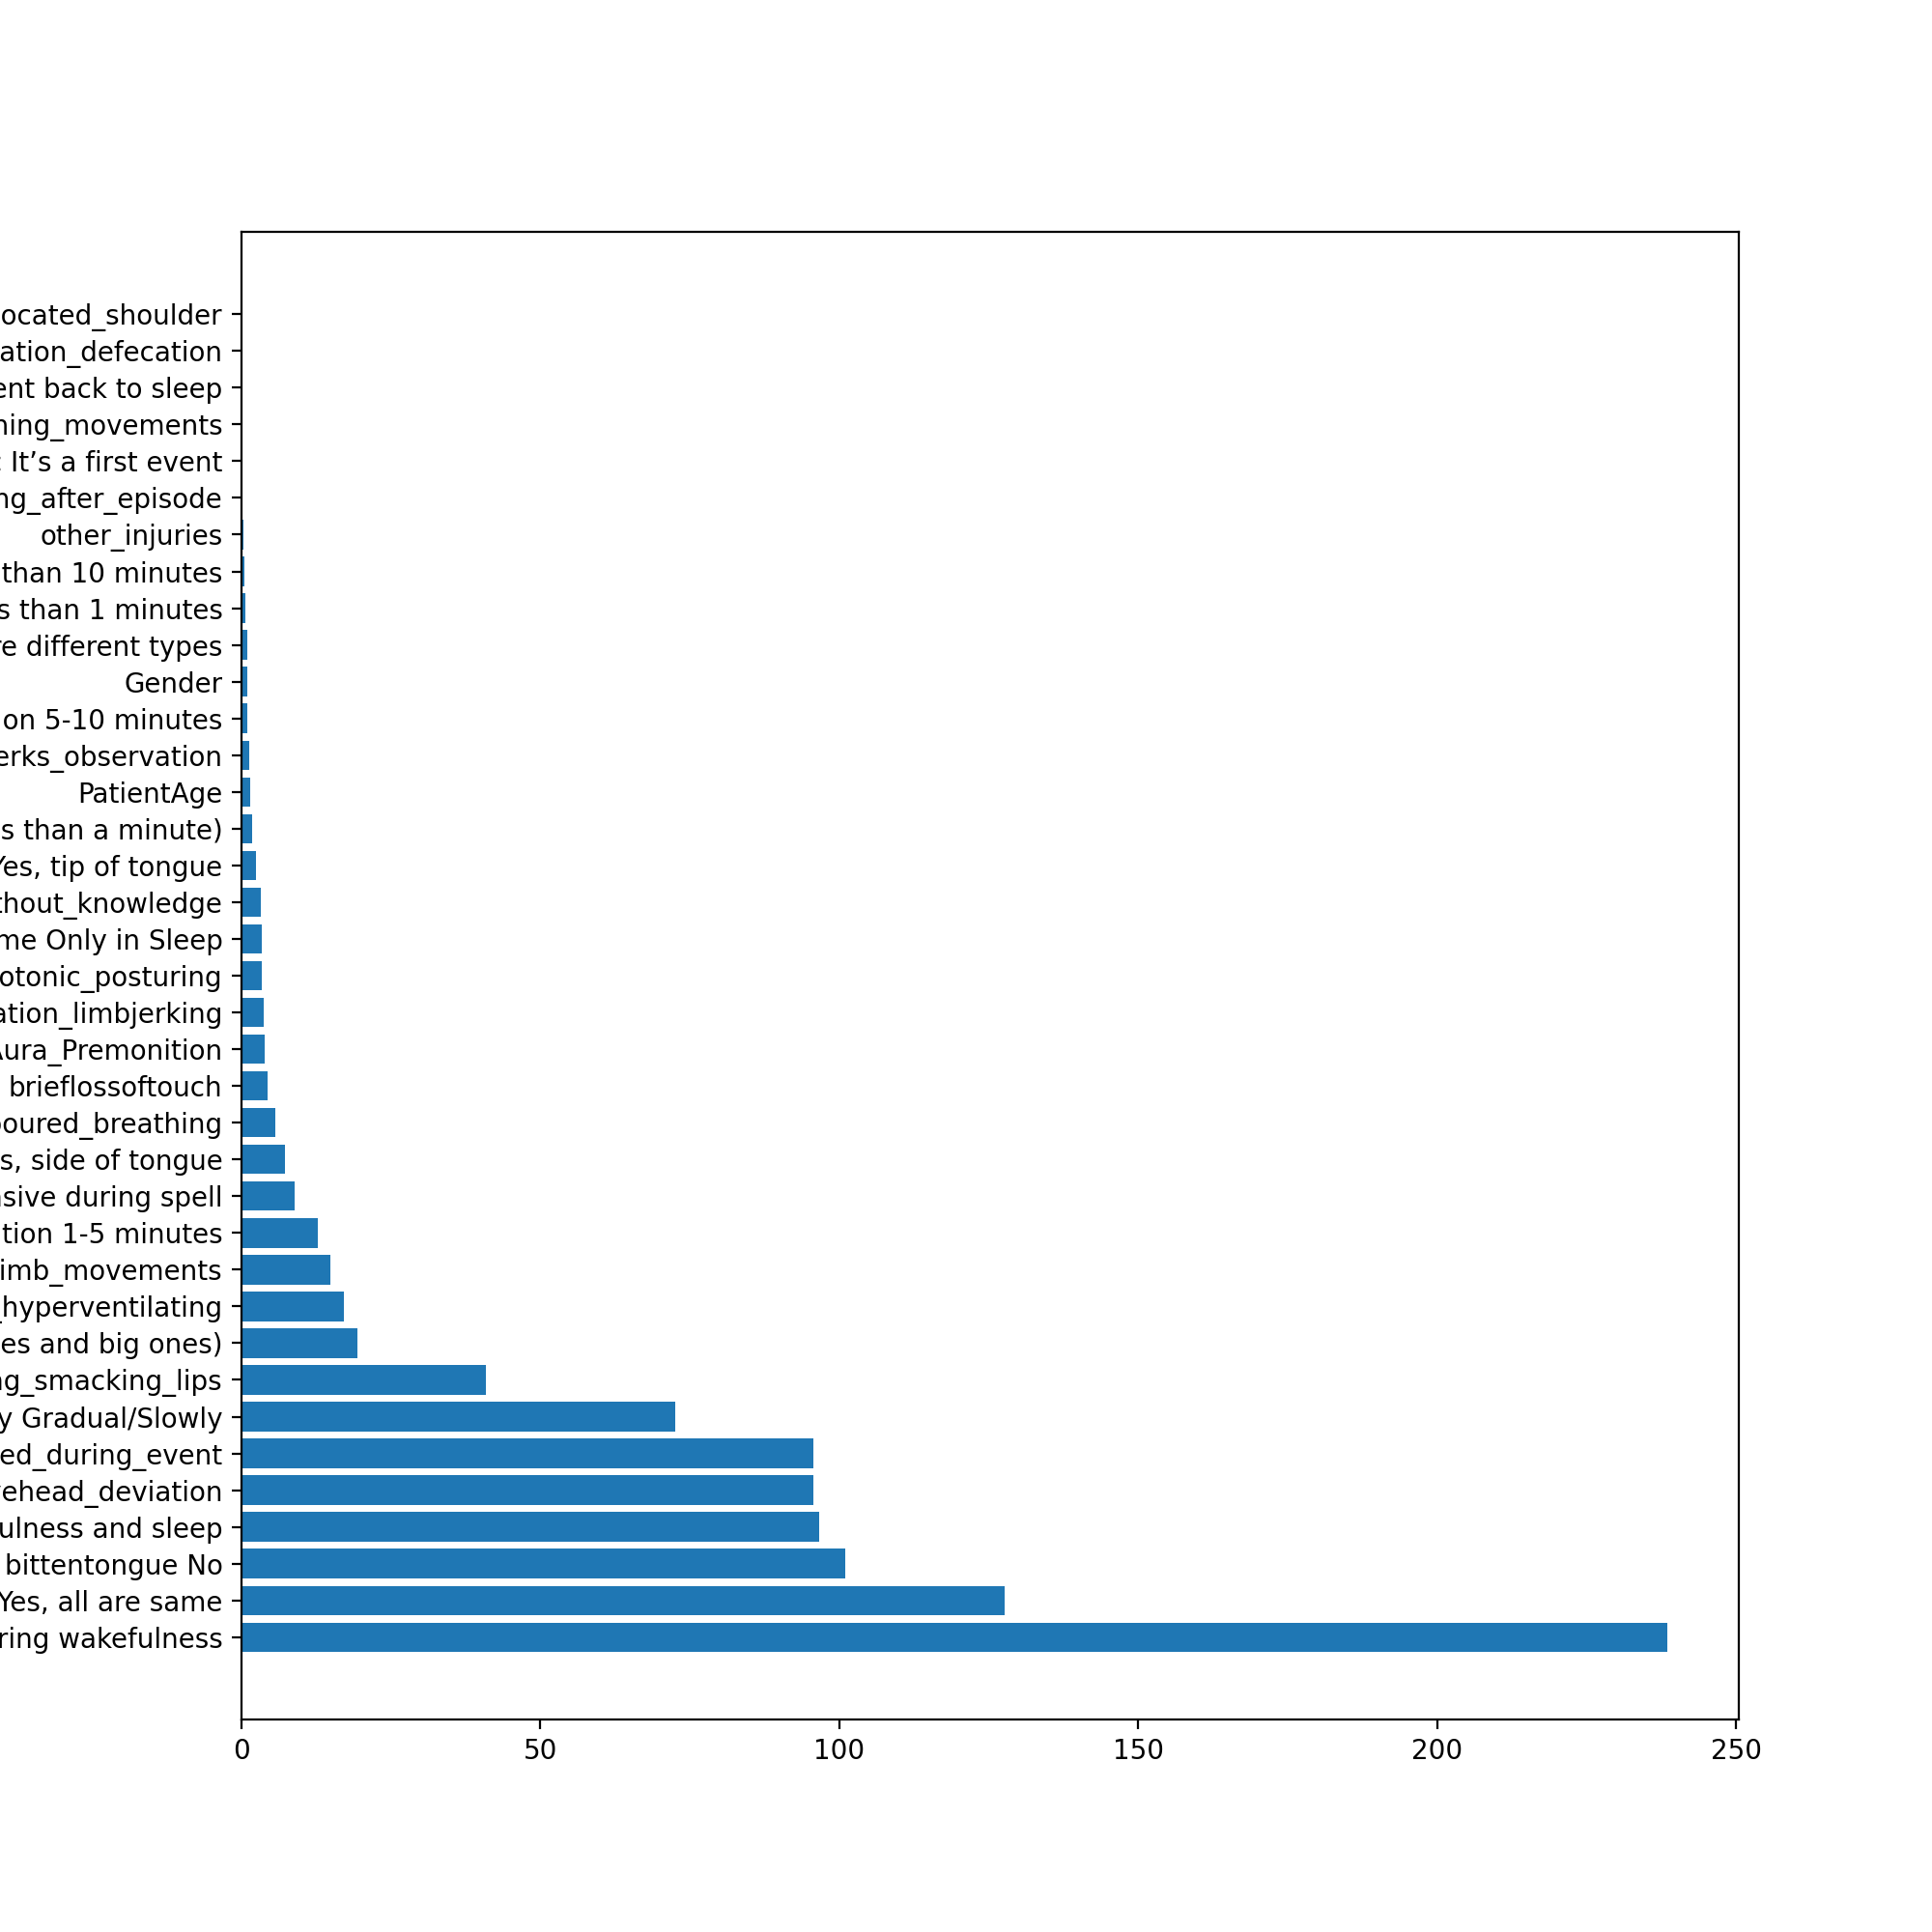

In [72]:
correlations['fscore'] = []

fs.fit(x_train_smote, y_train_smote)

for i in range(len(fs.scores_)):
	correlations['fscore'].append(fs.scores_[i])

feature = []
for f in x_train.keys():
  feature.append(f)

f_mp = pd.Series()

for i in range(len(feature)):
  f_mp[feature[i]] = fs.scores_[i]

f_mp = f_mp.sort_values(ascending = False)

sc = []
feature = []

for k in f_mp.keys():
  feature.append(k)
  sc.append(f_mp[k])

pyplot.barh([feature[i] for i in range(len(fs.scores_))], sc)
pyplot.rcParams['figure.figsize'] = [10, 10]
pyplot.show()

In [73]:
# correlation_df=[]
# correlation_df.append(pd.DataFrame(correlations['original']))
# correlation_df.append(pd.DataFrame(correlations['smote']))
# correlation_df.append(pd.DataFrame(correlations['fscore']))

len(compare_original_smote)

38

In [74]:
len(correlations['fscore'])

37

In [75]:
del compare_original_smote['Final_Diagnosis']
# correlations['smote'].drop('Final_Diagnosis', inplace = True)

len(compare_original_smote)

37

In [76]:
# after this snippet,
# 0 - f
# 1 - smote corr
# 2 - train corr

ind = 0

for k in compare_original_smote.keys():
  compare_original_smote[k].append(correlations['fscore'][ind])
  ind+=1

for array in compare_original_smote.values():
  array[0], array[2] = array[2], array[0]

sorted_value_index = np.argsort(compare_original_smote.values())
dictionary_keys = list(compare_original_smote.keys())
sorted_dict = {dictionary_keys[i]: sorted(
    compare_original_smote.values())[i] for i in range(len(dictionary_keys))}

print(sorted_dict)

{'PatientAge': [0.006191950464396285, 0.0, 0.0], 'Gender': [0.025, 0.0, 0.0], 'eyes_closed_during_event': [0.038880248833592534, 0.04491148495089029, 0.0], 'weeping_before_during_after_episode': [0.07716535433070866, 0.047351349365880896, 0.0], 'patient_fall_suddenly_without_limb_movements': [0.15673981191222572, 0.09514754064752744, 0.0], 'Was_patient_hyperventilating': [0.15873015873015872, 0.06996629322001313, 0.22969402035317446], 'loss_consciousness_after_urination_defecation': [0.31210191082802546, 0.10347879746085344, 0.0], 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing': [0.40764331210191085, 0.12152114277712071, 0.26037107328321385], 'observation_limbjerking': [0.6666666666666666, 0.10251191840775326, 0.0], 'observe_postevent_stridulous_laboured_breathing': [0.9320388349514563, 0.15889514099755897, 0.0], 'upper_limb_jerks_observation': [0.9418604651162791, 0.034734780961649364, 0.09514310407148238], 'brieflossoftouch': [1.0434056761268782, 0.131684629364504

In [77]:
sorted_pd = pd.DataFrame(sorted_dict)
sorted_pd

PatientAge  Gender  eyes_closed_during_event  \
0    0.006192   0.025                  0.038880   
1    0.000000   0.000                  0.044911   
2    0.000000   0.000                  0.000000   

   weeping_before_during_after_episode  \
0                             0.077165   
1                             0.047351   
2                             0.000000   

   patient_fall_suddenly_without_limb_movements  Was_patient_hyperventilating  \
0                                      0.156740                      0.158730   
1                                      0.095148                      0.069966   
2                                      0.000000                      0.229694   

   loss_consciousness_after_urination_defecation  \
0                                       0.312102   
1                                       0.103479   
2                                       0.000000   

   side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                           0.407643                   
1                                           0.121521                   
2                                           0.260371                   

   observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                 0.666667                                         0.932039   
1                 0.102512                                         0.158895   
2                 0.000000                                         0.000000   

   ...  events_occur_time Both during wakefulness and sleep  \
0  ...                                          17.194030     
1  ...                                           0.382601     
2  ...                                           0.443572     

   events_occur_time Only during wakefulness  events_occur_time Only in Sleep  \
0                                  19.394881                        40.816367   
1                                   0.428256                         0.518644   
2                                   0.265219                         0.311817   

   recovery Abrupt/Sudden (less than a minute)  \
0                                    72.620513   
1                                     0.394504   
2                                     0.408179   

   recovery Didn’t recover went back to sleep  recovery Gradual/Slowly  \
0                                   95.693780                95.728929   
1                                    0.638315                 0.669646   
2                                    0.588757                 0.450750   

   recovery Responsive during spell  bittentongue Yes, side of tongue  \
0                         96.609195                        101.038095   
1                          0.666420                          0.424907   
2                          0.434370                          0.253765   

   bittentongue Yes, tip of tongue  bittentongue No  
0                       127.680272       238.549618  
1                         0.498987         0.780582  
2                         0.280048         0.561585  

[3 rows x 37 columns]

In [78]:
less_f = []
for col in sorted_pd:
  if sorted_pd[col][0]<0.05:
    less_f.append(col)


In [79]:
intersection_f_cor = []
for ele in less_correlation:
  if ele in less_f:
    intersection_f_cor.append(ele)

In [80]:
sorted_pd.drop(intersection_f_cor, axis = 1, inplace = True)
sorted_pd

eyes_closed_during_event  weeping_before_during_after_episode  \
0                  0.038880                             0.077165   
1                  0.044911                             0.047351   
2                  0.000000                             0.000000   

   patient_fall_suddenly_without_limb_movements  Was_patient_hyperventilating  \
0                                      0.156740                      0.158730   
1                                      0.095148                      0.069966   
2                                      0.000000                      0.229694   

   loss_consciousness_after_urination_defecation  \
0                                       0.312102   
1                                       0.103479   
2                                       0.000000   

   side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                           0.407643                   
1                                           0.121521                   
2                                           0.260371                   

   observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                 0.666667                                         0.932039   
1                 0.102512                                         0.158895   
2                 0.000000                                         0.000000   

   upper_limb_jerks_observation  brieflossoftouch  ...  \
0                      0.941860          1.043406  ...   
1                      0.034735          0.131685  ...   
2                      0.095143          0.142887  ...   

   events_occur_time Both during wakefulness and sleep  \
0                                          17.194030     
1                                           0.382601     
2                                           0.443572     

   events_occur_time Only during wakefulness  events_occur_time Only in Sleep  \
0                                  19.394881                        40.816367   
1                                   0.428256                         0.518644   
2                                   0.265219                         0.311817   

   recovery Abrupt/Sudden (less than a minute)  \
0                                    72.620513   
1                                     0.394504   
2                                     0.408179   

   recovery Didn’t recover went back to sleep  recovery Gradual/Slowly  \
0                                   95.693780                95.728929   
1                                    0.638315                 0.669646   
2                                    0.588757                 0.450750   

   recovery Responsive during spell  bittentongue Yes, side of tongue  \
0                         96.609195                        101.038095   
1                          0.666420                          0.424907   
2                          0.434370                          0.253765   

   bittentongue Yes, tip of tongue  bittentongue No  
0                       127.680272       238.549618  
1                         0.498987         0.780582  
2                         0.280048         0.561585  

[3 rows x 35 columns]

In [81]:
print(less_f)
print(less_correlation)
print(intersection_f_cor)

['PatientAge', 'Gender', 'eyes_closed_during_event']
['PatientAge', 'Gender', 'loss_consciousness_after_urination_defecation', 'violent_thrashing_movements', 'dislocated_shoulder', 'recovery Didn’t recover went back to sleep']
['PatientAge', 'Gender']


In [82]:
sorted_pd

eyes_closed_during_event  weeping_before_during_after_episode  \
0                  0.038880                             0.077165   
1                  0.044911                             0.047351   
2                  0.000000                             0.000000   

   patient_fall_suddenly_without_limb_movements  Was_patient_hyperventilating  \
0                                      0.156740                      0.158730   
1                                      0.095148                      0.069966   
2                                      0.000000                      0.229694   

   loss_consciousness_after_urination_defecation  \
0                                       0.312102   
1                                       0.103479   
2                                       0.000000   

   side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                           0.407643                   
1                                           0.121521                   
2                                           0.260371                   

   observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                 0.666667                                         0.932039   
1                 0.102512                                         0.158895   
2                 0.000000                                         0.000000   

   upper_limb_jerks_observation  brieflossoftouch  ...  \
0                      0.941860          1.043406  ...   
1                      0.034735          0.131685  ...   
2                      0.095143          0.142887  ...   

   events_occur_time Both during wakefulness and sleep  \
0                                          17.194030     
1                                           0.382601     
2                                           0.443572     

   events_occur_time Only during wakefulness  events_occur_time Only in Sleep  \
0                                  19.394881                        40.816367   
1                                   0.428256                         0.518644   
2                                   0.265219                         0.311817   

   recovery Abrupt/Sudden (less than a minute)  \
0                                    72.620513   
1                                     0.394504   
2                                     0.408179   

   recovery Didn’t recover went back to sleep  recovery Gradual/Slowly  \
0                                   95.693780                95.728929   
1                                    0.638315                 0.669646   
2                                    0.588757                 0.450750   

   recovery Responsive during spell  bittentongue Yes, side of tongue  \
0                         96.609195                        101.038095   
1                          0.666420                          0.424907   
2                          0.434370                          0.253765   

   bittentongue Yes, tip of tongue  bittentongue No  
0                       127.680272       238.549618  
1                         0.498987         0.780582  
2                         0.280048         0.561585  

[3 rows x 35 columns]

In [83]:
x_train.drop(intersection_f_cor, axis=1,inplace=True)
x_test.drop(intersection_f_cor, axis=1,inplace=True)
x_train_smote.drop(intersection_f_cor, axis=1,inplace=True)

In [84]:
x_test

eyes_closed_during_event  weeping_before_during_after_episode  \
462                         1                                    1   
73                          1                                    1   
231                         1                                    1   
175                         1                                    1   
237                         1                                    1   
..                        ...                                  ...   
247                         1                                    1   
383                         1                                    1   
19                          1                                    1   
320                         1                                    1   
489                         1                                    1   

     patient_fall_suddenly_without_limb_movements  \
462                                             1   
73                                              1   
231                                             1   
175                                             0   
237                                             1   
..                                            ...   
247                                             1   
383                                             1   
19                                              1   
320                                             1   
489                                             1   

     Was_patient_hyperventilating  \
462                             1   
73                              1   
231                             1   
175                             1   
237                             1   
..                            ...   
247                             1   
383                             1   
19                              1   
320                             1   
489                             1   

     loss_consciousness_after_urination_defecation  \
462                                              1   
73                                               1   
231                                              1   
175                                              1   
237                                              1   
..                                             ...   
247                                              1   
383                                              1   
19                                               1   
320                                              1   
489                                              1   

     side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
462                                                  1                   
73                                                   1                   
231                                                  1                   
175                                                  1                   
237                                                  1                   
..                                                 ...                   
247                                                  1                   
383                                                  1                   
19                                                   1                   
320                                                  1                   
489                                                  1                   

     observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
462                        1                                                1   
73                         1                                                0   
231                        1                                                1   
175                        1                                                1   
237                        1                                                1   
..                       ...                              

In [85]:
x_test = x_test.replace('Yes', 1)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


accuracy_df = pd.DataFrame(columns=['Model','Before Smote','K fold before smote','confusion matrix before','Sensitivity before smote','Specificity before smote','After Smote','K fold after smote','Sensitivity after smote','Specificity after smote','confusion matrix after'])
dict_classifiers = {'Random Forest': RandomForestClassifier(),
                    'Logistic Regression': LogisticRegression(),
                    'SVC': SVC(),
                    'Decision Tree': DecisionTreeClassifier(),
                    'KNN': KNeighborsClassifier()
                    }
for clf_name, clf in dict_classifiers.items():
  #for validation
  cv = KFold(n_splits=10, random_state=42, shuffle=True)

  #before smote
  clf.fit(x_train, y_train)
  prediction1 = clf.predict(x_test)
  score1=accuracy_score(prediction1, y_test)
  fold_score1 = cross_val_score(clf, x_train, y_train, cv=cv)

  #confusion matrix
  cm1 = metrics.confusion_matrix(y_test, prediction1)
  cm_df1 = pd.DataFrame(cm1,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

  TP = cm1[1][1]
  TN = cm1[0][0]
  FP = cm1[0][1]
  FN = cm1[1][0]
  conf_sensitivity1 = (TP / float(TP + FN))
  conf_specificity1 = (TN / float(TN + FP))


  #after smote
  clf.fit(x_train_smote, y_train_smote)
  prediction2 = clf.predict(x_test)
  score2=accuracy_score(prediction2, y_test)
  fold_score2 = cross_val_score(clf, x_train_smote, y_train_smote, cv=cv)
  cm2 = metrics.confusion_matrix(y_test, prediction2)
  cm_df2 = pd.DataFrame(cm2,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

  TP = cm2[1][1]
  TN = cm2[0][0]
  FP = cm2[0][1]
  FN = cm2[1][0]

  conf_sensitivity2 = (TP / float(TP + FN))
  conf_specificity2 = (TN / float(TN + FP))

  # print(clf_name)
  # print("Before smote ",fold_score1,'\n',fold_score1.mean())
  # print("After smote ",fold_score2,'\n',fold_score2.mean(),'\n')

  new_row={
      'Model':clf_name,
       'Before Smote':score1,
       'K fold before smote':fold_score1.mean(),
       'confusion matrix before':cm_df1,
       'Sensitivity before smote':conf_sensitivity1,
       'Specificity before smote': conf_specificity1,
       'After Smote':score2 ,
       'K fold after smote': fold_score2.mean(),
       'Sensitivity after smote':conf_sensitivity2,
       'Specificity after smote': conf_specificity2,
       'confusion matrix after':cm_df2
  }
  accuracy_df=accuracy_df.append(new_row, ignore_index=True)

  # accuracy_dict[clf_name].append(score1)
  #print(clf_name,score1)
  # score2=accuracy_score(prediction2, y_test)
  # accuracy_dict[clf_name].append(score2)
  #print(clf_name,score2)


accuracy_df

Model  Before Smote  K fold before smote  \
0        Random Forest          0.93             0.962244   
1  Logistic Regression          0.95             0.967308   
2                  SVC          0.94             0.964615   
3        Decision Tree          0.90             0.936859   
4                  KNN          0.93             0.959551   

                             confusion matrix before  \
0                   Predicted Negative  Predicted...   
1                   Predicted Negative  Predicted...   
2                   Predicted Negative  Predicted...   
3                   Predicted Negative  Predicted...   
4                   Predicted Negative  Predicted...   

   Sensitivity before smote  Specificity before smote  After Smote  \
0                  0.818182                  0.961538         0.93   
1                  0.818182                  0.987179         0.97   
2                  0.818182                  0.974359         0.95   
3                  0.818182                  0.923077         0.93   
4                  0.818182                  0.961538         0.88   

   K fold after smote  Sensitivity after smote  Specificity after smote  \
0            0.973846                 0.863636                 0.948718   
1            0.975385                 0.909091                 0.987179   
2            0.973846                 0.818182                 0.987179   
3            0.961538                 0.772727                 0.974359   
4            0.967692                 0.909091                 0.871795   

                              confusion matrix after  
0                   Predicted Negative  Predicted...  
1                   Predicted Negative  Predicted...  
2                   Predicted Negative  Predicted...  
3                   Predicted Negative  Predicted...  
4                   Predicted Negative  Predicted...

In [87]:
accuracy_df.to_excel("/content/Results.xlsx")

Calculating Confidence Score on x_test and training data used x_train and y_train

In [88]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def calculate_k_fold_score_and_confidence(clf, x_train, y_train, x_test):
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    fold_scores = cross_val_score(clf, x_train, y_train, cv=cv)

    clf.fit(x_train, y_train)

    if hasattr(clf, 'predict_proba'):
        confidence_scores = clf.predict_proba(x_test)
    elif hasattr(clf, 'decision_function'):
        decision_scores = clf.decision_function(x_test)
        confidence_scores = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    else:
        raise ValueError("Classifier does not support either predict_proba or decision_function.")

    return fold_scores, confidence_scores

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Data', 'K-Fold Value', 'Confidence Score'])

for clf_name, clf in dict_classifiers.items():
    # Calculate k-fold scores and confidence scores for testing data
    fold_scores, confidence_scores = calculate_k_fold_score_and_confidence(clf, x_train, y_train, x_test)

    # Add results to the DataFrame
    for fold_num, (k_fold_score, confidence_score) in enumerate(zip(fold_scores, confidence_scores), start=1):
        result_row = {
            'Model': clf_name,
            'Data': 'Test',
            'K-Fold Value': k_fold_score,
            'Confidence Score': confidence_score
        }
        results_df = results_df.append(result_row, ignore_index=True)

# Display the combined results
print(results_df)
# Calculate the average values for each model
average_results = results_df.groupby('Model').mean().reset_index()

# Calculate the average Confidence Score for each model
average_confidence_scores = results_df.groupby('Model')['Confidence Score'].mean().reset_index()

# Merge the two DataFrames to include the average Confidence Score
average_results = pd.merge(average_results, average_confidence_scores, on='Model')

# Display the average results
print(average_results)



                  Model  Data  K-Fold Value  \
0         Random Forest  Test      0.950000   
1         Random Forest  Test      0.950000   
2         Random Forest  Test      0.975000   
3         Random Forest  Test      1.000000   
4         Random Forest  Test      0.875000   
5         Random Forest  Test      0.950000   
6         Random Forest  Test      1.000000   
7         Random Forest  Test      0.923077   
8         Random Forest  Test      0.923077   
9         Random Forest  Test      1.000000   
10  Logistic Regression  Test      0.950000   
11  Logistic Regression  Test      0.950000   
12  Logistic Regression  Test      0.975000   
13  Logistic Regression  Test      1.000000   
14  Logistic Regression  Test      0.925000   
15  Logistic Regression  Test      0.950000   
16  Logistic Regression  Test      1.000000   
17  Logistic Regression  Test      0.974359   
18  Logistic Regression  Test      0.948718   
19  Logistic Regression  Test      1.000000   
20           

Calculating Confidence Score on new test data and training data used x_train and y_train

In [89]:
print(x_train.columns)

Index(['eyes_closed_during_event', 'weeping_before_during_after_episode',
       'patient_fall_suddenly_without_limb_movements',
       'Was_patient_hyperventilating',
       'loss_consciousness_after_urination_defecation',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'observation_limbjerking',
       'observe_postevent_stridulous_laboured_breathing',
       'upper_limb_jerks_observation', 'brieflossoftouch',
       'fixed_Aura_Premonition', 'staring_blankly_chewing_smacking_lips',
       'posturing_limbeyehead_deviation', 'violent_thrashing_movements',
       'urine_without_knowledge', 'dislocated_shoulder', 'other_injuries',
       'EventDuration 5-10 minutes', 'EventDuration More than 10 minutes',
       'EventDuration 1-5 minutes', 'EventDuration Less than 1 minutes',
       'Stereotypic Yes, all are same',
       'Stereotypic Two different types (small ones and big ones)',
       'Stereotypic No, they are different types',
       'Stereotypic 

In [93]:
# before smote
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

testing_data = pd.read_excel("/content/Copy of Testing_data(2).xlsx")
testing_data.drop(testing_data .columns[0], axis=1, inplace=True)
testing_data.rename(columns={'side-to-side_head_nodding_pelvic_thrusting_Opisthotonic_posturing': 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing'}, inplace=True)
# Get the column order from x_train
column_order = x_train.columns.tolist()

# Reorder the columns in testing_data to match the order in x_train
testing_data = testing_data[column_order]


def calculate_k_fold_score_and_confidence(clf, x_train, y_train, testing_data):
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    fold_scores = cross_val_score(clf, x_train, y_train, cv=cv)

    clf.fit(x_train, y_train)

    if hasattr(clf, 'predict_proba'):
        confidence_scores = clf.predict_proba(testing_data)
        max_confidence_scores = confidence_scores.max(axis=1)
    elif hasattr(clf, 'decision_function'):
        decision_scores = clf.decision_function(testing_data)
        max_confidence_scores = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    else:
        raise ValueError("Classifier does not support either predict_proba or decision_function.")

    return fold_scores, max_confidence_scores

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Data', 'K-Fold Value', 'Confidence Score'])

for clf_name, clf in dict_classifiers.items():
    # Calculate k-fold scores and confidence scores for testing data
    fold_scores, max_confidence_scores = calculate_k_fold_score_and_confidence(clf, x_train, y_train, testing_data)

    # Add results to the DataFrame
    for fold_num, (k_fold_score, max_confidence_score) in enumerate(zip(fold_scores, max_confidence_scores), start=1):
        result_row = {
            'Model': clf_name,
            'Data': 'Test',
            'K-Fold Value': k_fold_score,
            'Confidence Score': max_confidence_score
        }
        results_df = results_df.append(result_row, ignore_index=True)

# Display the combined results
print(results_df)
# Calculate the average values for each model
average_results = results_df.groupby('Model').mean().reset_index()

# Calculate the average Confidence Score for each model
average_confidence_scores = results_df.groupby('Model')['Confidence Score'].mean().reset_index()

# Merge the two DataFrames to include the average Confidence Score
average_results = pd.merge(average_results, average_confidence_scores, on='Model')

# Display the average results
print(average_results)



                  Model  Data  K-Fold Value  Confidence Score
0         Random Forest  Test      0.950000          0.940000
1         Random Forest  Test      0.950000          1.000000
2         Random Forest  Test      0.975000          1.000000
3         Random Forest  Test      0.975000          0.977500
4         Random Forest  Test      0.900000          0.990000
5         Random Forest  Test      0.925000          1.000000
6         Random Forest  Test      1.000000          0.760000
7         Random Forest  Test      0.948718          0.880667
8         Random Forest  Test      0.948718          1.000000
9         Random Forest  Test      1.000000          1.000000
10  Logistic Regression  Test      0.950000          0.824738
11  Logistic Regression  Test      0.950000          0.977808
12  Logistic Regression  Test      0.975000          0.967387
13  Logistic Regression  Test      1.000000          0.977493
14  Logistic Regression  Test      0.925000          0.805707
15  Logi

In [94]:
print(testing_data.columns)

Index(['eyes_closed_during_event', 'weeping_before_during_after_episode',
       'patient_fall_suddenly_without_limb_movements',
       'Was_patient_hyperventilating',
       'loss_consciousness_after_urination_defecation',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'observation_limbjerking',
       'observe_postevent_stridulous_laboured_breathing',
       'upper_limb_jerks_observation', 'brieflossoftouch',
       'fixed_Aura_Premonition', 'staring_blankly_chewing_smacking_lips',
       'posturing_limbeyehead_deviation', 'violent_thrashing_movements',
       'urine_without_knowledge', 'dislocated_shoulder', 'other_injuries',
       'EventDuration 5-10 minutes', 'EventDuration More than 10 minutes',
       'EventDuration 1-5 minutes', 'EventDuration Less than 1 minutes',
       'Stereotypic Yes, all are same',
       'Stereotypic Two different types (small ones and big ones)',
       'Stereotypic No, they are different types',
       'Stereotypic 

In [95]:
# before smote
from sklearn.model_selection import KFold, cross_val_predict
import pandas as pd

testing_data = pd.read_excel("/content/Copy of Testing_data(2).xlsx")
testing_data.drop(testing_data .columns[0], axis=1, inplace=True)
testing_data.rename(columns={'side-to-side_head_nodding_pelvic_thrusting_Opisthotonic_posturing': 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing'}, inplace=True)
# Get the column order from x_train
column_order = x_train.columns.tolist()

# Reorder the columns in testing_data to match the order in x_train
testing_data = testing_data[column_order]

def calculate_k_fold_score_and_confidence(clf, x_train, y_train, testing_data):
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    fold_scores = cross_val_predict(clf, x_train, y_train, cv=cv, method='predict_proba' if hasattr(clf, 'predict_proba') else 'decision_function')

    clf.fit(x_train, y_train)
    if hasattr(clf, 'predict_proba'):
        confidence_scores = clf.predict_proba(testing_data)
        max_confidence_scores = confidence_scores.max(axis=1)
    elif hasattr(clf, 'decision_function'):
        confidence_scores = clf.decision_function(testing_data)
        max_confidence_scores = (confidence_scores - confidence_scores.min()) / (confidence_scores.max() - confidence_scores.min())
    else:
        raise ValueError("Classifier does not support either predict_proba or decision_function.")

    return fold_scores, max_confidence_scores

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Data', 'K-Fold Value', 'Confidence Score'])


for clf_name, clf in dict_classifiers.items():
    # Calculate k-fold scores and confidence scores for testing data
    fold_scores, max_confidence_scores = calculate_k_fold_score_and_confidence(clf, x_train, y_train, testing_data)

    # Add results to the DataFrame
    for fold_num, (k_fold_score, max_confidence_score) in enumerate(zip(fold_scores, max_confidence_scores), start=1):
        result_row = {
            'Model': clf_name,
            'Data': 'Test',
            'K-Fold Value': k_fold_score,
            'Confidence Score': max_confidence_score
        }
        results_df = results_df.append(result_row, ignore_index=True)

# Display the combined results
print(results_df)
# Calculate the average values for each model
average_results = results_df.groupby('Model').mean().reset_index()

# Display the average results
print(average_results)



             Model  Data  K-Fold Value  Confidence Score
0    Random Forest  Test    [1.0, 0.0]          0.940000
1    Random Forest  Test  [0.71, 0.29]          1.000000
2    Random Forest  Test    [1.0, 0.0]          0.980000
3    Random Forest  Test    [1.0, 0.0]          0.940000
4    Random Forest  Test    [1.0, 0.0]          0.962667
..             ...   ...           ...               ...
490            KNN  Test    [1.0, 0.0]          0.800000
491            KNN  Test    [1.0, 0.0]          0.600000
492            KNN  Test    [0.8, 0.2]          1.000000
493            KNN  Test    [1.0, 0.0]          1.000000
494            KNN  Test    [0.8, 0.2]          1.000000

[495 rows x 4 columns]
                 Model  Confidence Score
0        Decision Tree          0.964646
1                  KNN          0.941414
2  Logistic Regression          0.944994
3        Random Forest          0.938310
4                  SVC          0.321930


In [ ]:
from openpyxl import *
from tkinter import *

def clear():
  for field_value in field_entry_boxes:
    field_value.delete(0, END)

def insert():

  df.loc[len(df.index)] = ['Amy', 89, 93]
  row = []

  for field_value in field_entry_boxes:
    row.append(field_value)
  for clf_name, clf in dict_classifiers.items():
    fold_scores, confidence_scores = calculate_k_fold_score_and_confidence(clf, x_train, y_train, x_test)

    print(f"{clf_name} K-Fold Scores:", fold_scores)
    print(f"{clf_name} Confidence Scores:", confidence_scores)


  df.loc[len(df.index)] = row
  field_entry_boxes[len(field_entry_boxes)-1].focus_set()
  clear()

if __name__ == "__main__":
    root = Tk()
    root.configure(background='light green')
    root.title("Symptoms Form")
    root.geometry("500x300")

    heading = Label(root, text="Form", bg="light green")

    labels = []
    field_entry_boxes = []

    for i, column in enumerate(columns):
      labels.append(Label(root, text=column, bg="light green"))
      field_entry_boxes.append(Entry(root))
      field_entry_boxes[i].grid(row=i, column=1, ipadx="100")

    for i in range(len(columns)-1):
      field_entry_boxes[i].bind("<Return>", field_entry_boxes[i+1].focus_set())

    heading.grid(row=0, column=1)
    submit = Button(root, text="Submit", fg="Black",
                            bg="Red", command=insert)
    submit.grid(row=8, column=1)

    # start the GUI
    root.mainloop()

TclError: ignored